# **1. Introduction**

# NetTrafficGuard EDA

*This notebook is designed to perform Exploratory Data Analysis (EDA) on network traffic datasets. The goal is to understand the structure of the data, identify patterns, and prepare the data for further analysis and modeling. We will follow a structured approach to EDA, including generating questions, applying visualization techniques, transforming and modeling data, and refining our analysis based on insights.*


# **2. Import Libraries**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting aesthetics
sns.set(style="whitegrid")


# **3. Load Data**



In [2]:
# Define paths to datasets
cicids_path = 'E:\\Hackatone Project\\NetTrafficGuard\\data\\raw\\CICIDS2017\\Darknet.csv'
kddcup_path = 'E:\\Hackatone Project\\NetTrafficGuard\\data\\raw\KDDCup1999\\kddcup.data_10_percent_corrected'
nsl_kdd_path = 'E:\\Hackatone Project\\NetTrafficGuard\\data\\raw\\NSL-KDD\KDDTest+.csv'

# Load datasets
cicids_data = pd.read_csv(cicids_path)
kddcup_data = pd.read_csv(kddcup_path, header=None)
nsl_kdd_data = pd.read_csv(nsl_kdd_path)

# Display the first few rows of each dataset
cicids_data.head(), kddcup_data.head(), nsl_kdd_data.head()


<>:3: SyntaxWarning: invalid escape sequence '\K'
<>:4: SyntaxWarning: invalid escape sequence '\K'
<>:3: SyntaxWarning: invalid escape sequence '\K'
<>:4: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Rahul\AppData\Local\Temp\ipykernel_15452\1326275642.py:3: SyntaxWarning: invalid escape sequence '\K'
  kddcup_path = 'E:\\Hackatone Project\\NetTrafficGuard\\data\\raw\KDDCup1999\\kddcup.data_10_percent_corrected'
C:\Users\Rahul\AppData\Local\Temp\ipykernel_15452\1326275642.py:4: SyntaxWarning: invalid escape sequence '\K'
  nsl_kdd_path = 'E:\\Hackatone Project\\NetTrafficGuard\\data\\raw\\NSL-KDD\KDDTest+.csv'


(                                      Flow ID         Src IP  Src Port  \
 0     10.152.152.11-216.58.220.99-57158-443-6  10.152.152.11     57158   
 1     10.152.152.11-216.58.220.99-57159-443-6  10.152.152.11     57159   
 2     10.152.152.11-216.58.220.99-57160-443-6  10.152.152.11     57160   
 3    10.152.152.11-74.125.136.120-49134-443-6  10.152.152.11     49134   
 4  10.152.152.11-173.194.65.127-34697-19305-6  10.152.152.11     34697   
 
            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
 0   216.58.220.99       443         6  24/07/2015 04:09:48 PM            229   
 1   216.58.220.99       443         6  24/07/2015 04:09:48 PM            407   
 2   216.58.220.99       443         6  24/07/2015 04:09:48 PM            431   
 3  74.125.136.120       443         6  24/07/2015 04:09:48 PM            359   
 4  173.194.65.127     19305         6  24/07/2015 04:09:45 PM       10778451   
 
    Total Fwd Packet  Total Bwd packets  ...  Active Mean  A

# **4. Generate Questions**


## 4. Generate Questions

Generating questions is a crucial step in exploratory data analysis (EDA). It involves formulating specific queries that guide the analysis and help uncover insights from the data. Below are some fundamental questions that guide our EDA for the NetTrafficGuard project:

### 4.1 What are the basic statistics and structure of each dataset?

Understanding the basic statistics and structure of each dataset provides a foundation for further analysis. This includes:

- **Descriptive Statistics:** Mean, median, mode, standard deviation, minimum, and maximum values for numerical features.
- **Data Types:** Identifying the type of each feature (e.g., numerical, categorical, date/time).
- **Shape and Size:** Number of rows and columns in the dataset.
- **Data Distribution:** Distribution of values in key columns to understand their range and skewness.

*Example Questions:*
- What is the distribution of numerical features in the dataset?
- How many features are there, and what types are they?
- Are there any unexpected data types or formats in the dataset?

### 4.2 Are there any missing values in the datasets?

Identifying missing values is essential to ensure the completeness of the dataset. This includes:

- **Missing Value Counts:** Number of missing values per column.
- **Patterns of Missing Data:** Are missing values randomly distributed, or do they follow a specific pattern?
- **Handling Strategies:** Methods to address missing values, such as imputation or removal.

*Example Questions:*
- Which columns have missing values, and what percentage of data is missing?
- Are there specific rows or columns with disproportionately high amounts of missing data?
- What strategies can be applied to handle missing data in different columns?

### 4.3 What are the key features in each dataset, and how do they correlate with each other?

Understanding the key features and their relationships helps to identify patterns and insights. This includes:

- **Feature Importance:** Determining which features are most relevant for the analysis or model.
- **Correlation Analysis:** Examining the correlation between numerical features to identify potential relationships.
- **Categorical Feature Analysis:** Analyzing distributions and relationships among categorical features.

*Example Questions:*
- Which features have the highest correlation with the target variable (if applicable)?
- Are there any multicollinearity issues among numerical features?
- How do categorical features impact numerical features, if at all?

### 4.4 Are there any patterns or anomalies in the data?

Identifying patterns and anomalies can reveal underlying trends or issues within the dataset. This includes:

- **Pattern Detection:** Recognizing regular patterns or trends within the data.
- **Anomaly Detection:** Identifying data points that deviate significantly from the norm, which could indicate errors or outliers.
- **Temporal Analysis:** For time-series data, analyzing trends over time.

*Example Questions:*
- Are there any seasonal or temporal patterns in the dataset?
- Are there outliers or anomalies in key features that need further investigation?
- How do patterns vary across different segments of the data?

### 4.5 How do different features impact the target variable (if applicable)?

Understanding the relationship between features and the target variable is critical for building predictive models. This includes:

- **Feature-Target Analysis:** Assessing how different features influence the target variable.
- **Feature Importance:** Using statistical methods to determine the importance of each feature in predicting the target variable.
- **Interaction Effects:** Exploring interactions between features and their combined impact on the target variable.

*Example Questions:*
- Which features have the most significant impact on the target variable?
- Are there any interaction effects between features that influence the target variable?
- How can feature selection improve the performance of predictive models?

By addressing these questions, you will gain a comprehensive understanding of the datasets and uncover valuable insights that inform subsequent analysis and model development.


# **5. Data Cleaning**
<hr>
<p>Data cleaning is a critical part of the data preprocessing pipeline, ensuring that our dataset is accurate, complete, and ready for analysis. Below, we perform a detailed data cleaning process on each dataset, addressing missing values, outliers, and other anomalies.</p>

## **5.1 CICIDS2017 Data Cleaning**

<strong> 5.1.1 Load and Inspect Data </strong>




In [3]:


# Display basic information and initial rows of the dataset
print("CICIDS2017 Data Overview:")
print(cicids_data.info())
print(cicids_data.head())


CICIDS2017 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158616 entries, 0 to 158615
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     158616 non-null  object 
 1   Src IP                      158616 non-null  object 
 2   Src Port                    158616 non-null  int64  
 3   Dst IP                      158616 non-null  object 
 4   Dst Port                    158616 non-null  int64  
 5   Protocol                    158616 non-null  int64  
 6   Timestamp                   158616 non-null  object 
 7   Flow Duration               158616 non-null  int64  
 8   Total Fwd Packet            158616 non-null  int64  
 9   Total Bwd packets           158616 non-null  int64  
 10  Total Length of Fwd Packet  158616 non-null  int64  
 11  Total Length of Bwd Packet  158616 non-null  int64  
 12  Fwd Packet Length Max       158616 non-null  i

In [4]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_values_cicids = cicids_data.isnull().sum()
missing_values_summary = missing_values_cicids[missing_values_cicids > 0]

print("Columns with Missing Values:")
print(missing_values_summary)



Missing Values Analysis:
Columns with Missing Values:
Flow Bytes/s    48
dtype: int64


# **5.1.3 Advanced Outlier Detection**

In [5]:
import numpy as np

# Detect outliers using Z-score method
from scipy import stats

print("\nOutlier Detection:")
z_scores = np.abs(stats.zscore(cicids_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers detected in columns:")
print(outliers[outliers > 0])



Outlier Detection:


c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Outliers detected in columns:
Total Fwd Packet                532
Total Bwd packets               472
Total Length of Fwd Packet      327
Total Length of Bwd Packet      259
Fwd Packet Length Max           136
Fwd Packet Length Min          1709
Fwd Packet Length Mean         2228
Fwd Packet Length Std          3050
Bwd Packet Length Max           278
Bwd Packet Length Min          7207
Bwd Packet Length Mean         4954
Bwd Packet Length Std          2543
Flow IAT Mean                  3154
Flow IAT Std                   3341
Flow IAT Max                   2956
Flow IAT Min                   1940
Fwd IAT Mean                   5123
Fwd IAT Std                    4019
Fwd IAT Max                    2991
Fwd IAT Min                    4536
Bwd IAT Mean                   4423
Bwd IAT Std                    4421
Bwd IAT Max                    3329
Bwd IAT Min                    3537
Fwd PSH Flags                 15084
Fwd Header Length               542
Bwd Header Length               46

# **5.1.4 Handle Missing Values and Outliers**


In [6]:
# Handle missing values: Drop columns with more than 50% missing values
print("\nDropping Columns with > 50% Missing Values:")
threshold = len(cicids_data) * 0.5
cicids_data_clean = cicids_data.dropna(thresh=threshold, axis=1)

# Handle outliers: Cap values at 99th percentile
print("\nHandling Outliers:")
for col in cicids_data_clean.select_dtypes(include=[np.number]).columns:
    cap_value = cicids_data_clean[col].quantile(0.99)
    cicids_data_clean[col] = np.where(cicids_data_clean[col] > cap_value, cap_value, cicids_data_clean[col])

# Remove duplicates
print("\nRemoving Duplicate Rows:")
cicids_data_clean = cicids_data_clean.drop_duplicates()

# Save cleaned data
print("\nSaving Cleaned CICIDS2017 Data:")
cicids_data_clean.to_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\processedCICIDS2017_Cleaned.csv', index=False)



Dropping Columns with > 50% Missing Values:

Handling Outliers:

Removing Duplicate Rows:

Saving Cleaned CICIDS2017 Data:


# **5.2 KDD Cup 1999 Data Cleaning**

# **5.2.1 Load and Inspect Data**

In [7]:


# Display basic information and initial rows of the dataset
print("KDD Cup 1999 Data Overview:")
print(kddcup_data.info())
print(kddcup_data.head())


KDD Cup 1999 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       494021 non-null  int64  
 1   1       494021 non-null  object 
 2   2       494021 non-null  object 
 3   3       494021 non-null  object 
 4   4       494021 non-null  int64  
 5   5       494021 non-null  int64  
 6   6       494021 non-null  int64  
 7   7       494021 non-null  int64  
 8   8       494021 non-null  int64  
 9   9       494021 non-null  int64  
 10  10      494021 non-null  int64  
 11  11      494021 non-null  int64  
 12  12      494021 non-null  int64  
 13  13      494021 non-null  int64  
 14  14      494021 non-null  int64  
 15  15      494021 non-null  int64  
 16  16      494021 non-null  int64  
 17  17      494021 non-null  int64  
 18  18      494021 non-null  int64  
 19  19      494021 non-null  int64  
 20  20      494021 non-n

# **5.2.2 Detailed Missing Value Analysis**

In [8]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_values_kddcup = kddcup_data.isnull().sum()
missing_values_summary = missing_values_kddcup[missing_values_kddcup > 0]

print("Columns with Missing Values:")
print(missing_values_summary)



Missing Values Analysis:
Columns with Missing Values:
Series([], dtype: int64)


# **5.2.3 Advanced Outlier Detection**

In [9]:
numeric_data = kddcup_data.select_dtypes(include=[np.number])

# Detect outliers using IQR method
print("\nOutlier Detection:")
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print("Outliers detected in columns:")
print(outliers[outliers > 0])


Outlier Detection:
Outliers detected in columns:
0      12350
4       4834
5      85763
6         22
7       1238
8          4
9       3192
10        63
11     73237
12      2224
13        55
14        12
15       585
16       265
17        51
18       454
21       685
24     89234
25     88335
26     29073
27     29701
28    111942
29    112000
30     34644
31     61192
34     11223
36     52132
37     94211
38     93076
39     35229
40     34216
dtype: int64


# **5.2.4 Handle Missing Values and Outliers**

In [14]:
# Separate numeric and non-numeric columns
numeric_cols = kddcup_data.select_dtypes(include=[np.number]).columns
non_numeric_cols = kddcup_data.select_dtypes(exclude=[np.number]).columns

# Handle missing values: Impute numeric columns with median and non-numeric columns with mode
print("\nImputing Missing Values:")
kddcup_data_clean = kddcup_data.copy()

# Impute numeric columns with median
kddcup_data_clean[numeric_cols] = kddcup_data[numeric_cols].fillna(kddcup_data[numeric_cols].median())

# Impute non-numeric columns with mode
for col in non_numeric_cols:
    kddcup_data_clean[col] = kddcup_data[col].fillna(kddcup_data[col].mode()[0])

# Handle outliers: Remove rows with outliers
print("\nRemoving Rows with Outliers:")
# Calculate IQR for numeric columns
Q1 = kddcup_data_clean[numeric_cols].quantile(0.25)
Q3 = kddcup_data_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (kddcup_data_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (kddcup_data_clean[numeric_cols] > (Q3 + 1.5 * IQR))
outliers = outlier_mask.any(axis=1)

# Remove outlier rows
kddcup_data_clean = kddcup_data_clean[~outliers]

# Remove duplicates
print("\nRemoving Duplicate Rows:")
kddcup_data_clean = kddcup_data_clean.drop_duplicates()

# Save cleaned data
print("\nSaving Cleaned KDD Cup 1999 Data:")
kddcup_data_clean.to_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\KDDCup1999_Cleaned.csv', index=False)


Imputing Missing Values:

Removing Rows with Outliers:

Removing Duplicate Rows:

Saving Cleaned KDD Cup 1999 Data:


# **5.3 NSL-KDD Data Cleaning**

###  **5.3.1 Load and Inspect Data**


In [16]:
# Display basic information and initial rows of the dataset
print("NSL-KDD Data Overview:")
print(nsl_kdd_data.info())
print(nsl_kdd_data.head())


NSL-KDD Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22542 entries, 0 to 22541
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22542 non-null  int64  
 1   tcp      22542 non-null  object 
 2   private  22542 non-null  object 
 3   REJ      22542 non-null  object 
 4   0.1      22542 non-null  int64  
 5   0.2      22542 non-null  int64  
 6   0.3      22542 non-null  int64  
 7   0.4      22542 non-null  int64  
 8   0.5      22542 non-null  int64  
 9   0.6      22542 non-null  int64  
 10  0.7      22542 non-null  int64  
 11  0.8      22542 non-null  int64  
 12  0.9      22542 non-null  int64  
 13  0.10     22542 non-null  int64  
 14  0.11     22542 non-null  int64  
 15  0.12     22542 non-null  int64  
 16  0.13     22542 non-null  int64  
 17  0.14     22542 non-null  int64  
 18  0.15     22542 non-null  int64  
 19  0.16     22542 non-null  int64  
 20  0.17     22542 non-null  in

### **5.3.2 Detailed Missing Value Analysis**

In [17]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_values_nsl_kdd = nsl_kdd_data.isnull().sum()
missing_values_summary = missing_values_nsl_kdd[missing_values_nsl_kdd > 0]

print("Columns with Missing Values:")
print(missing_values_summary)



Missing Values Analysis:
Columns with Missing Values:
Series([], dtype: int64)


#### **5.3.3 Advanced Outlier Detection**

In [18]:
# Detect outliers using Z-score method
print("\nOutlier Detection:")
z_scores = np.abs(stats.zscore(nsl_kdd_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers detected in columns:")
print(outliers[outliers > 0])



Outlier Detection:
Outliers detected in columns:
0          494
0.1          6
0.2         36
0.3          7
0.4        100
0.5         10
0.6         71
0.7        478
0.9         10
0.10        55
0.11         4
0.12         9
0.13        16
0.14        19
0.15        72
0.17        11
0.18       641
229        876
10         738
0.19      2104
0.20      2165
0.06      1481
0.21      1292
0.06.1    1106
0.23       313
0.24      1630
0.25      1728
21         585
dtype: int64


#### **5.3.4 Handle Missing Values and Outliers**

In [20]:
# Handle missing values: Drop rows with any missing values
print("\nDropping Rows with Missing Values:")
nsl_kdd_data_clean = nsl_kdd_data.dropna()

# Handle outliers: Cap values at 99th percentile
print("\nHandling Outliers:")
for col in nsl_kdd_data_clean.select_dtypes(include=[np.number]).columns:
    cap_value = nsl_kdd_data_clean[col].quantile(0.99)
    nsl_kdd_data_clean[col] = np.where(nsl_kdd_data_clean[col] > cap_value, cap_value, nsl_kdd_data_clean[col])

# Standardize column names
print("\nStandardizing Column Names:")
nsl_kdd_data_clean.columns = [col.strip().lower().replace(' ', '_') for col in nsl_kdd_data_clean.columns]

# Remove duplicates
print("\nRemoving Duplicate Rows:")
nsl_kdd_data_clean = nsl_kdd_data_clean.drop_duplicates()

# Save cleaned data
print("\nSaving Cleaned NSL-KDD Data:")
nsl_kdd_data_clean.to_csv('E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\NSL-KDD_Cleaned.csv', index=False)



Dropping Rows with Missing Values:

Handling Outliers:

Standardizing Column Names:

Removing Duplicate Rows:

Saving Cleaned NSL-KDD Data:


#### 5.5 Identifying and Treating Outliers



Detecting Outliers:


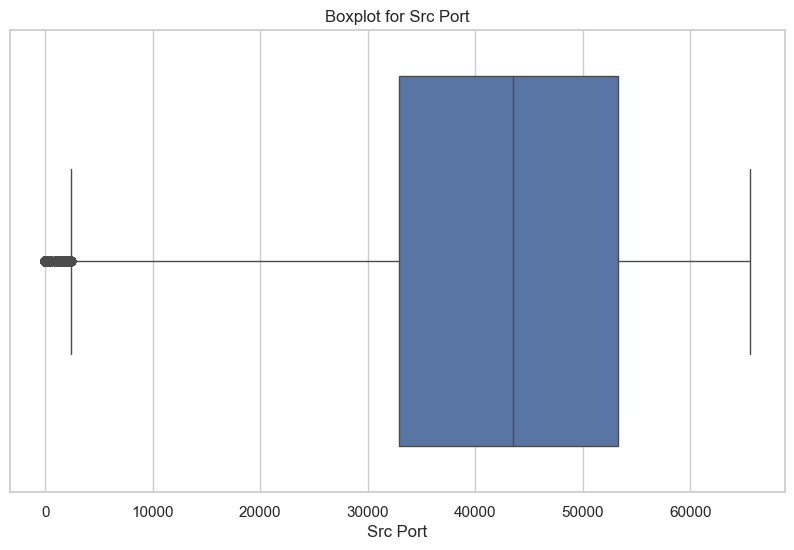

Number of outliers in Src Port: 0


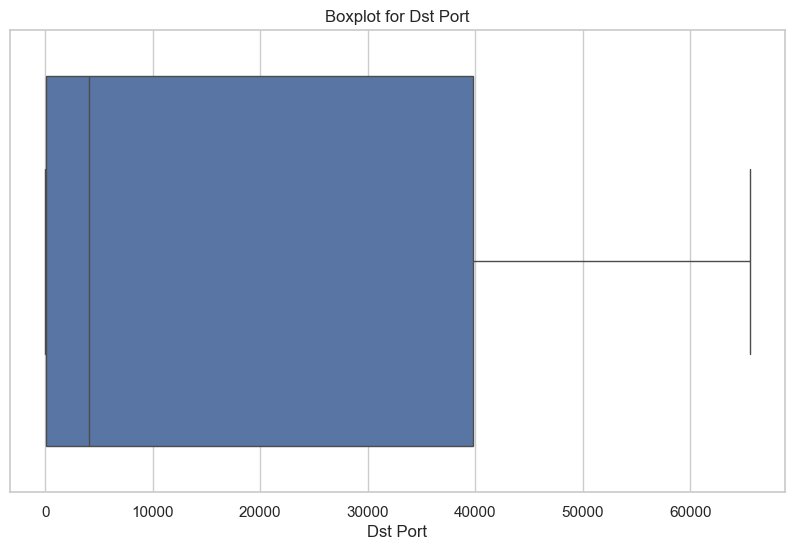

Number of outliers in Dst Port: 0


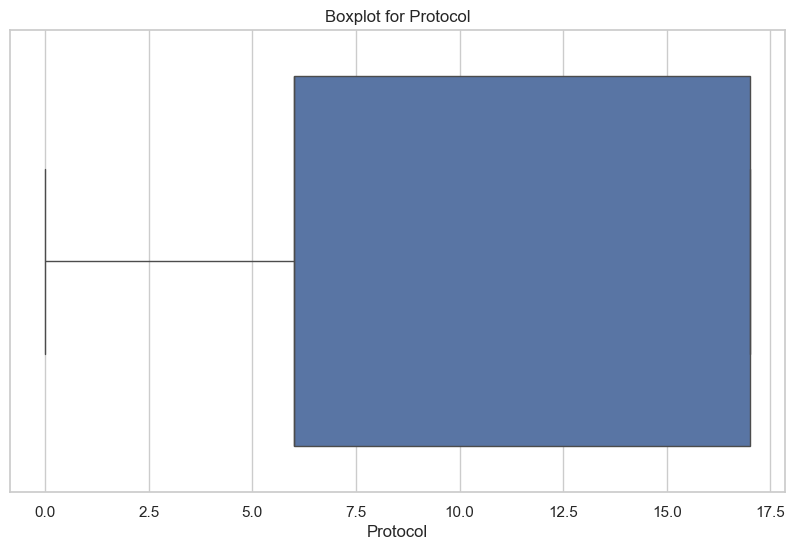

Number of outliers in Protocol: 0


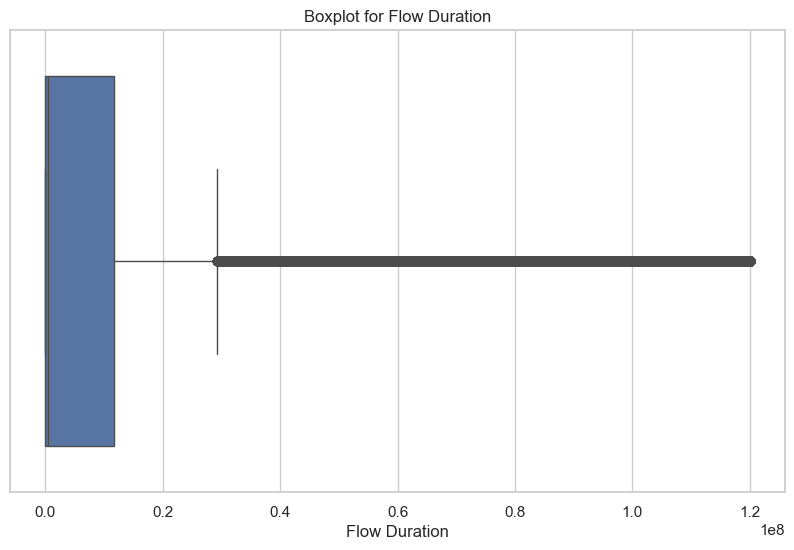

Number of outliers in Flow Duration: 0


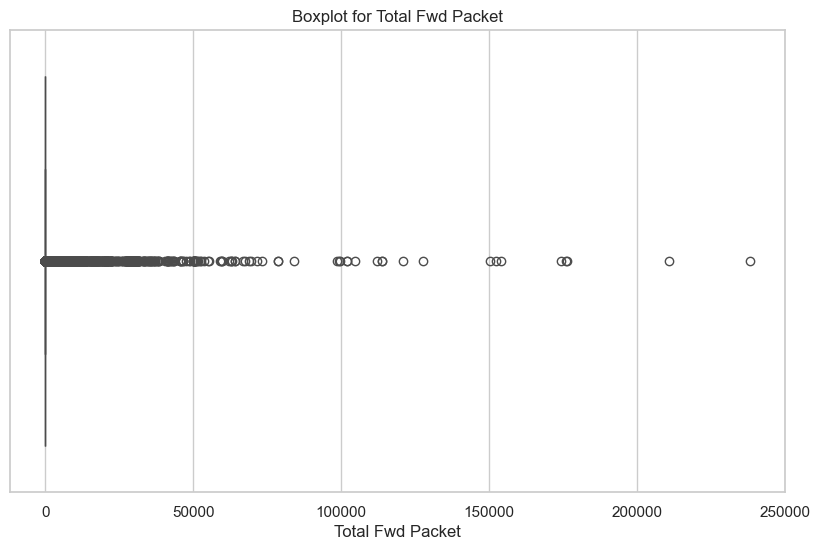

Number of outliers in Total Fwd Packet: 532


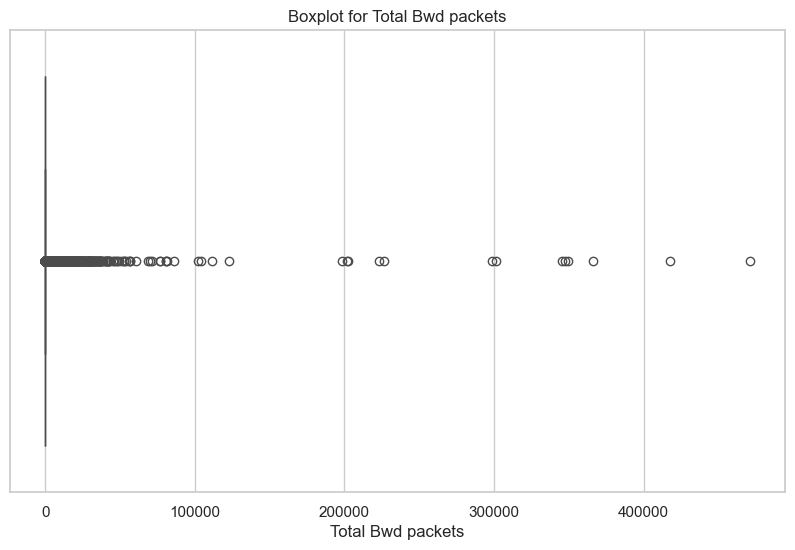

Number of outliers in Total Bwd packets: 472


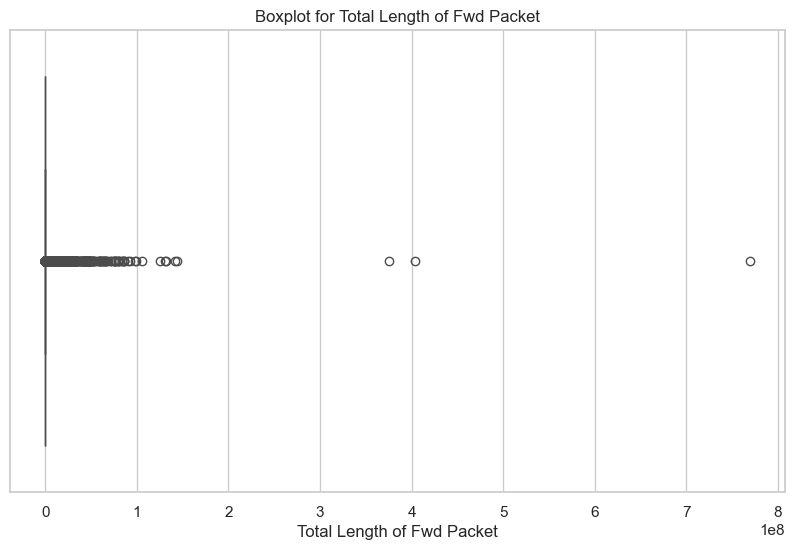

Number of outliers in Total Length of Fwd Packet: 327


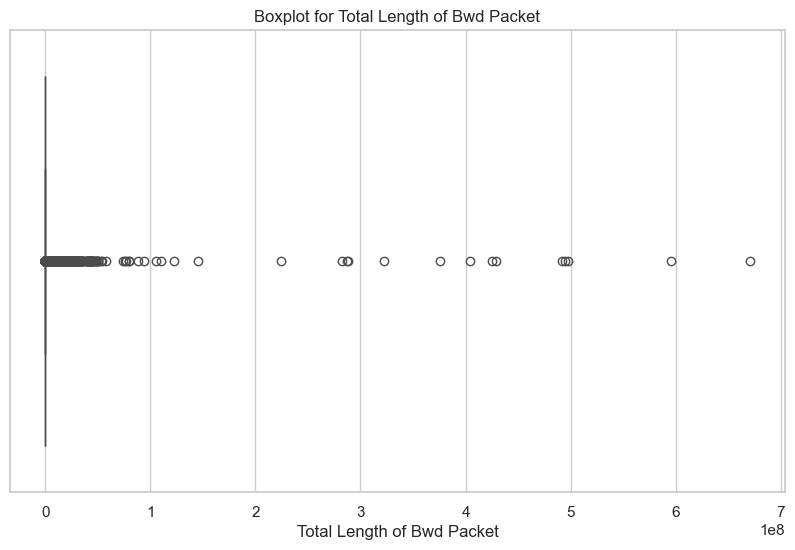

Number of outliers in Total Length of Bwd Packet: 259


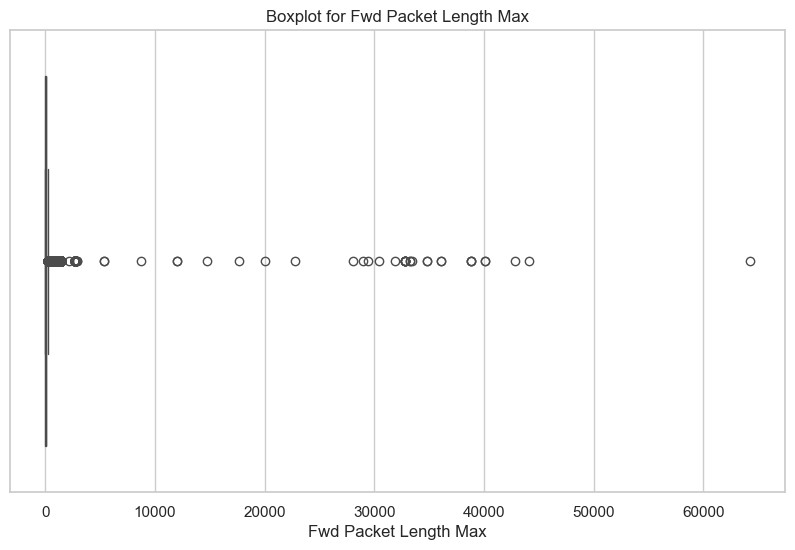

Number of outliers in Fwd Packet Length Max: 136


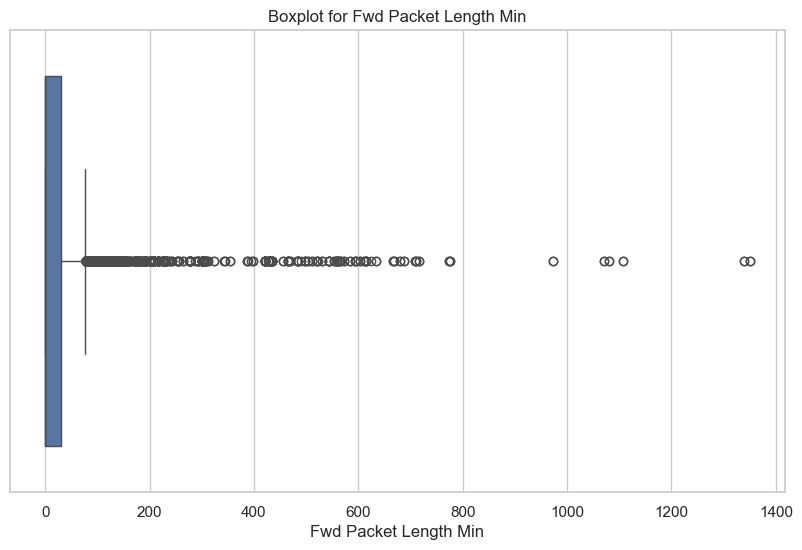

Number of outliers in Fwd Packet Length Min: 1709


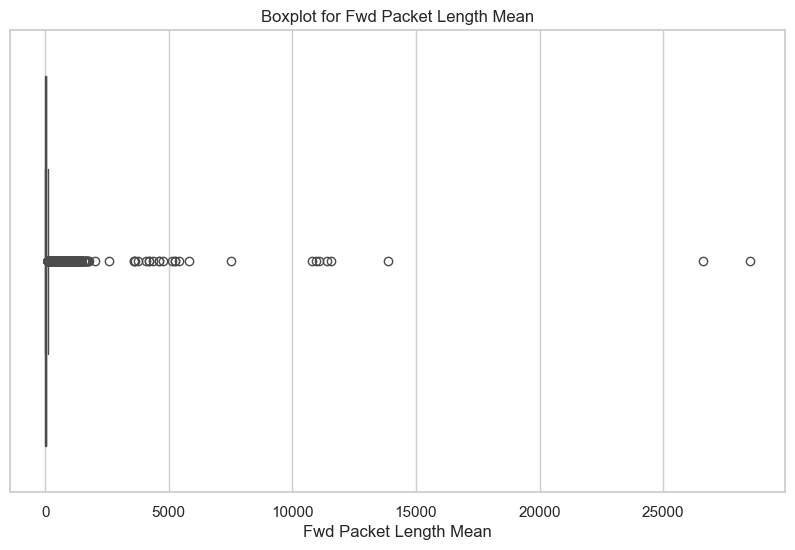

Number of outliers in Fwd Packet Length Mean: 2228


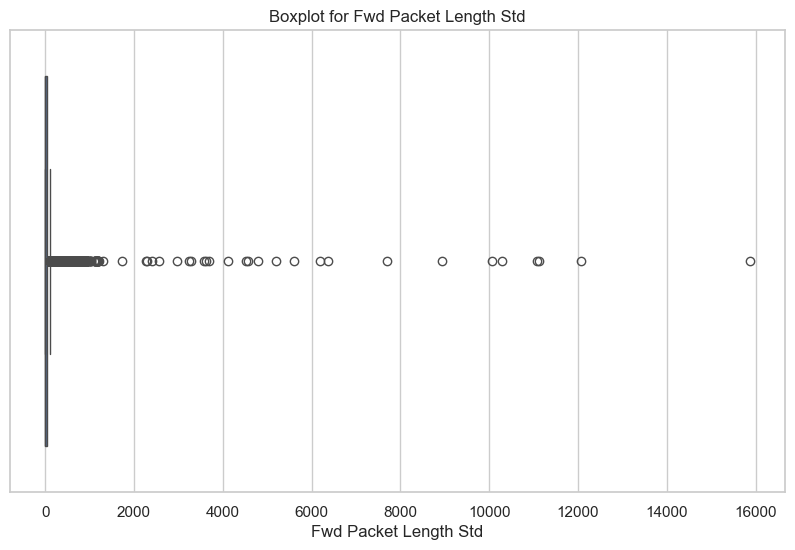

Number of outliers in Fwd Packet Length Std: 3050


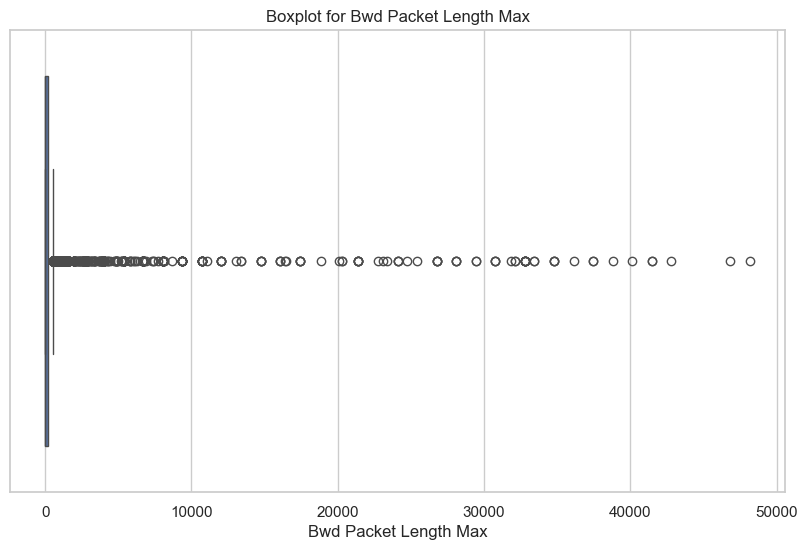

Number of outliers in Bwd Packet Length Max: 278


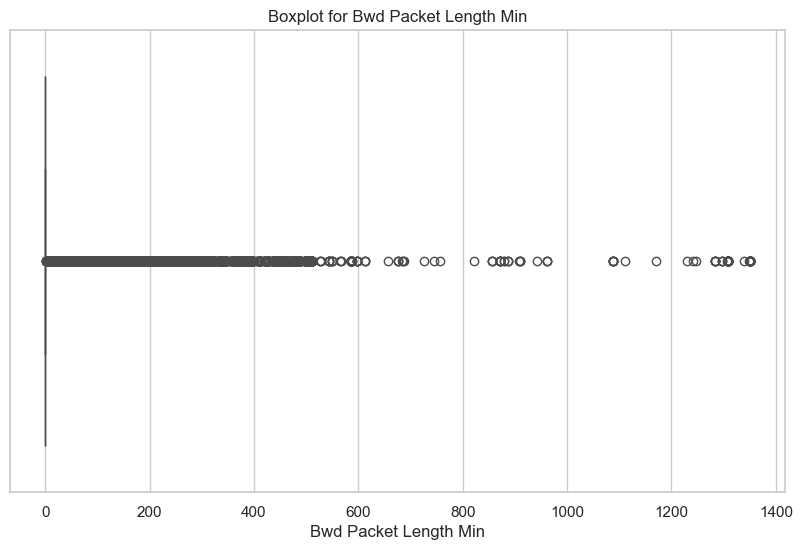

Number of outliers in Bwd Packet Length Min: 7207


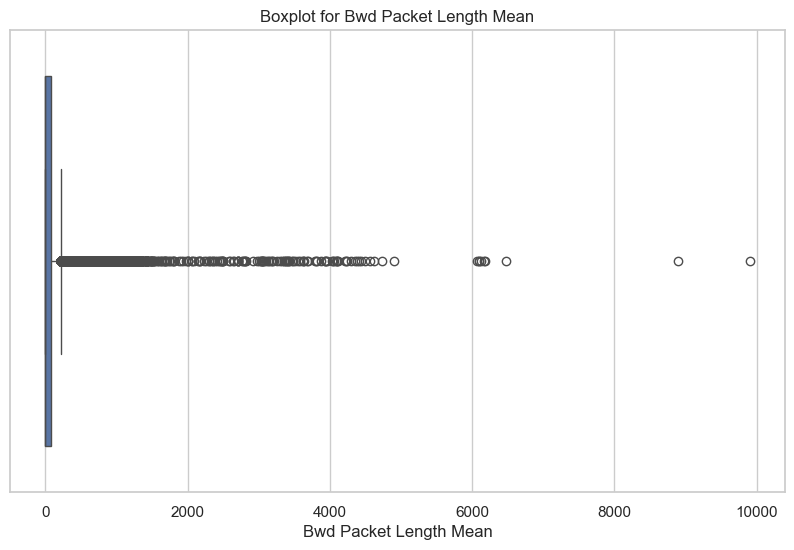

Number of outliers in Bwd Packet Length Mean: 4954


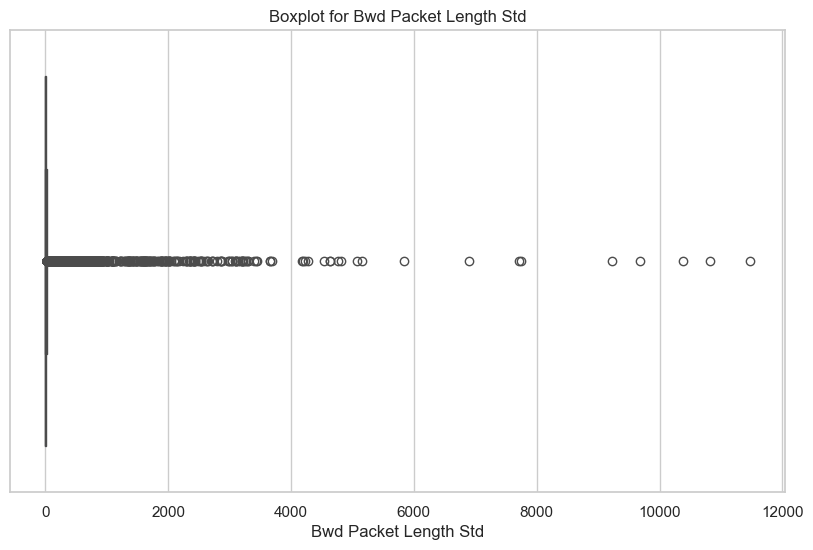

Number of outliers in Bwd Packet Length Std: 2543


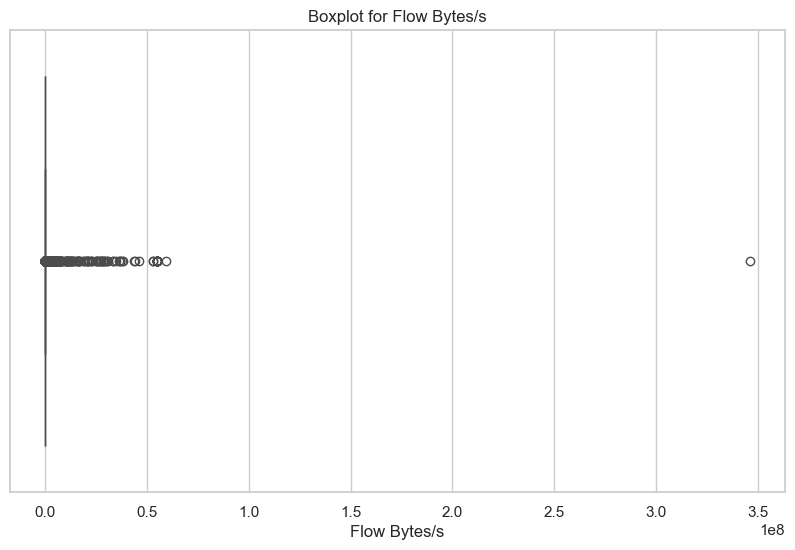

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Number of outliers in Flow Bytes/s: 0


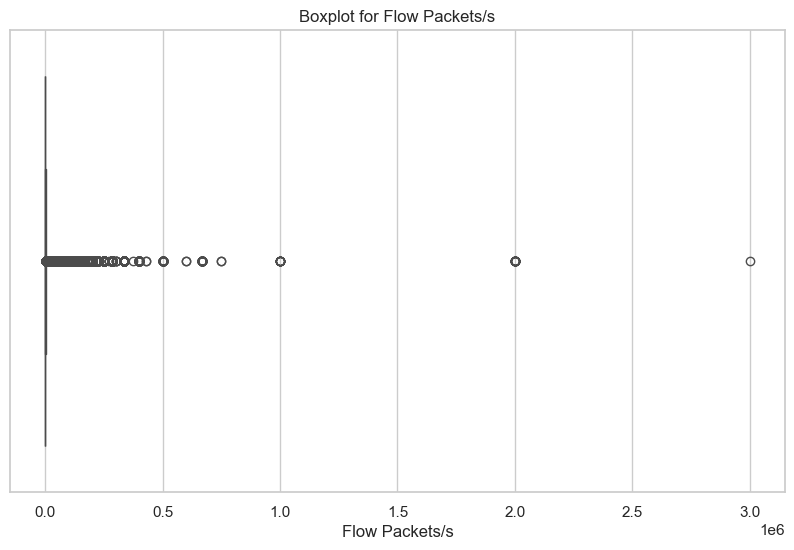

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Number of outliers in Flow Packets/s: 0


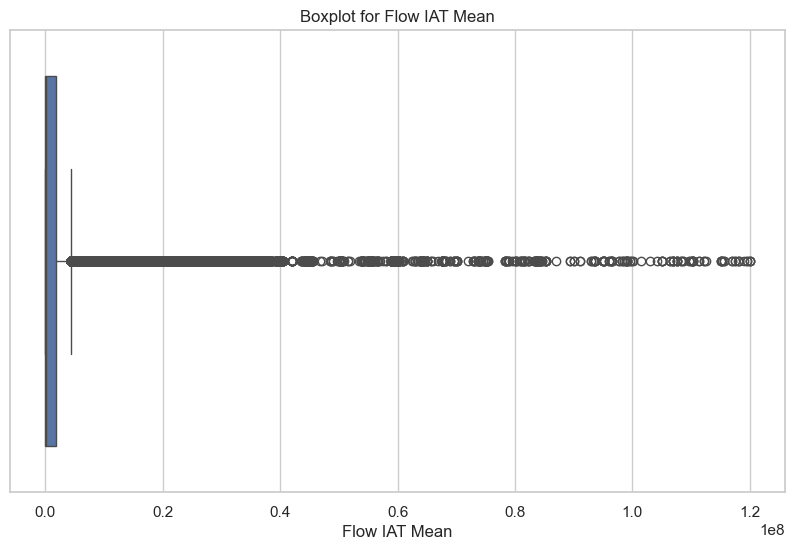

Number of outliers in Flow IAT Mean: 3154


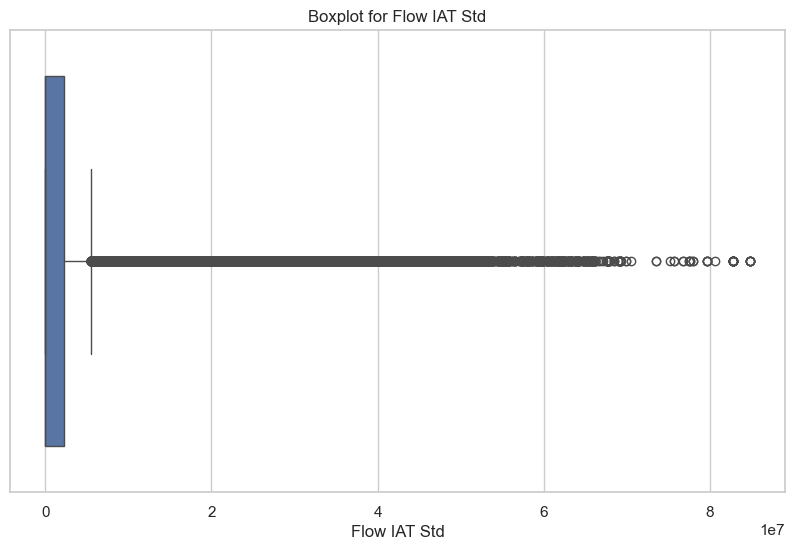

Number of outliers in Flow IAT Std: 3341


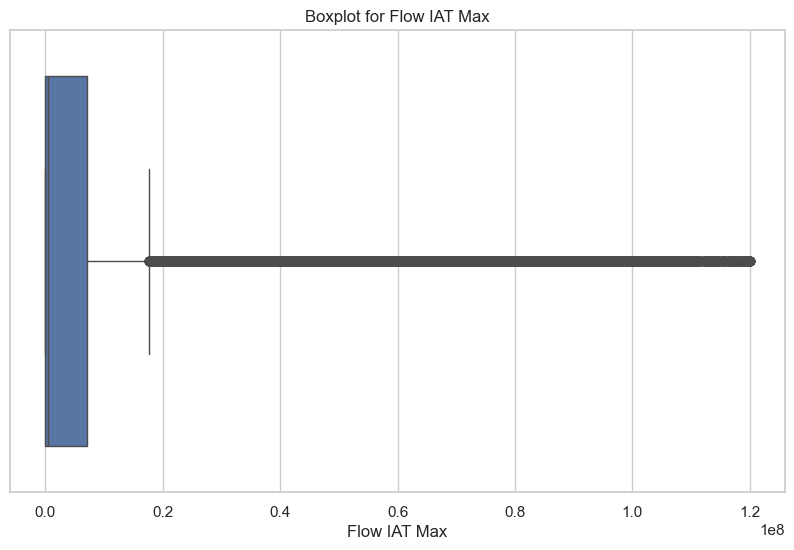

Number of outliers in Flow IAT Max: 2956


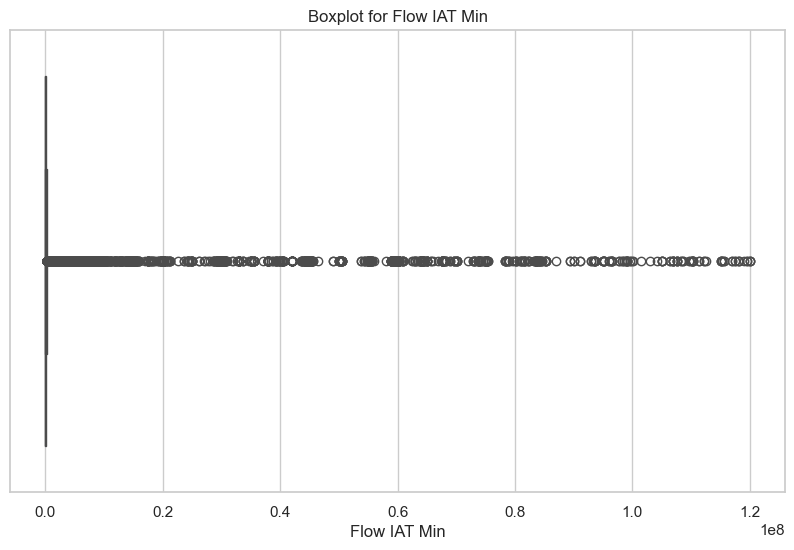

Number of outliers in Flow IAT Min: 1940


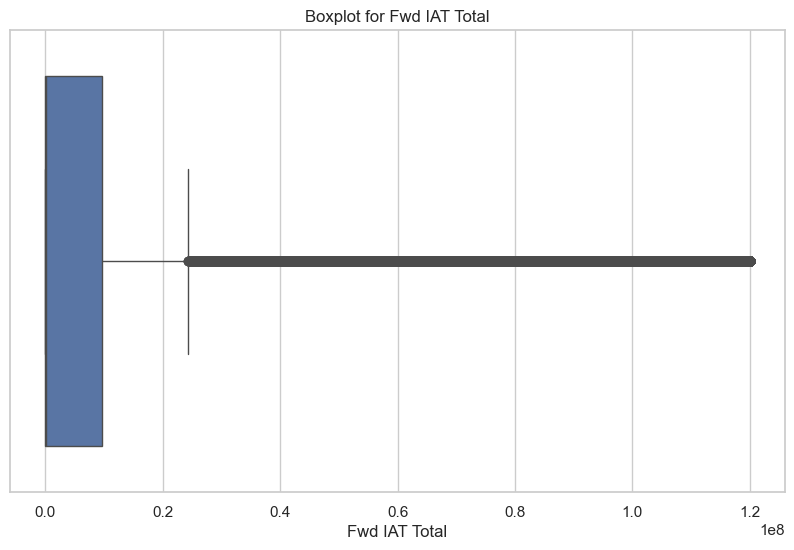

Number of outliers in Fwd IAT Total: 0


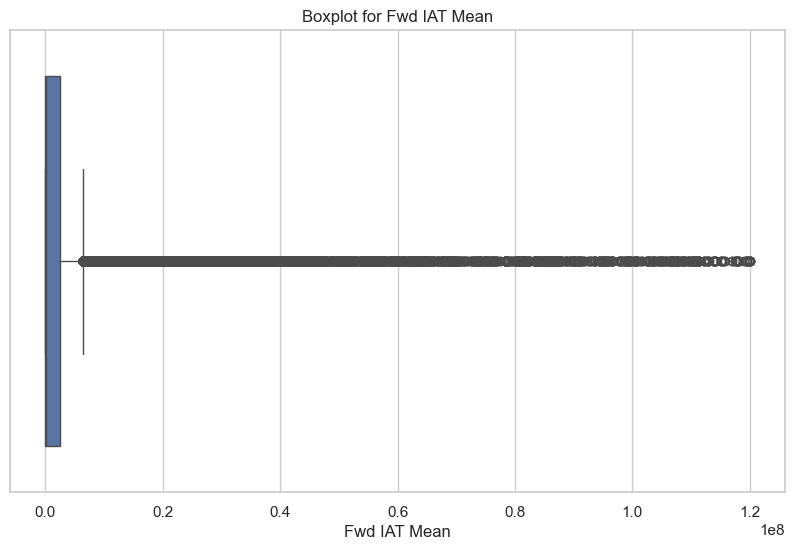

Number of outliers in Fwd IAT Mean: 5123


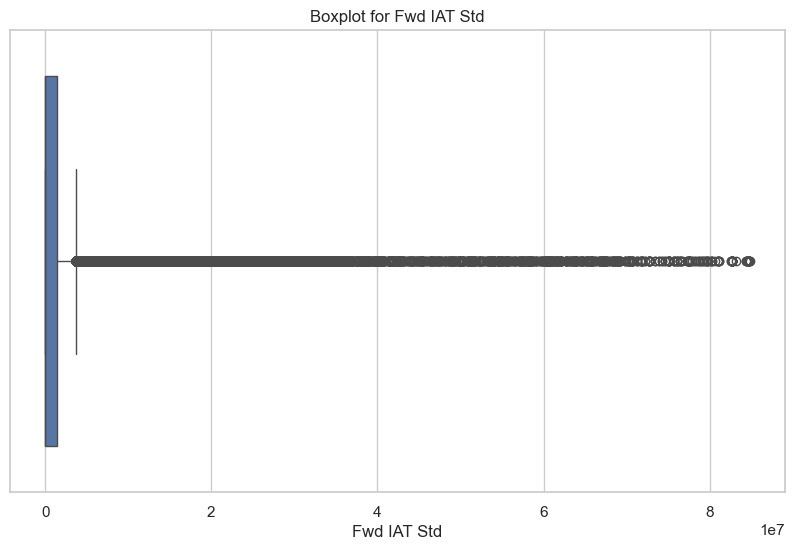

Number of outliers in Fwd IAT Std: 4019


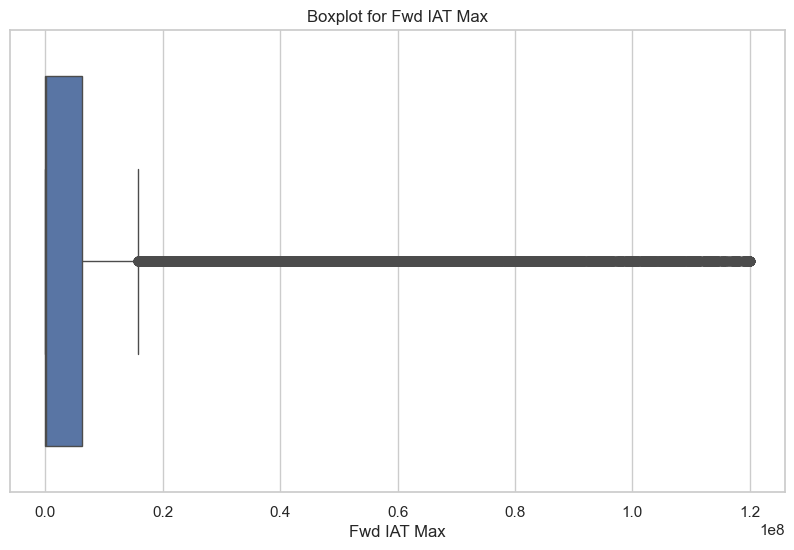

Number of outliers in Fwd IAT Max: 2991


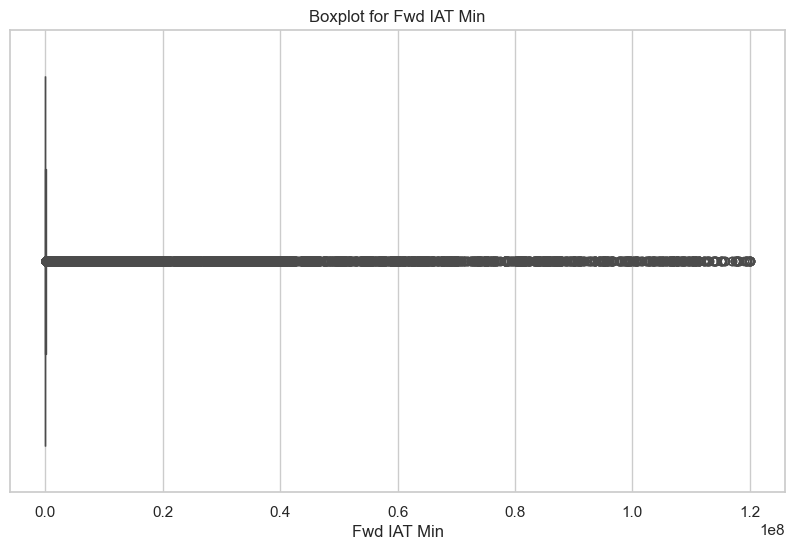

Number of outliers in Fwd IAT Min: 4536


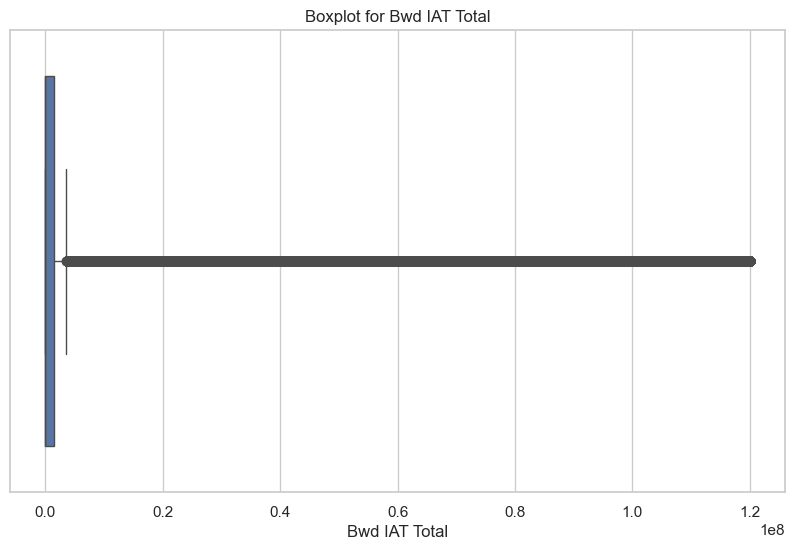

Number of outliers in Bwd IAT Total: 0


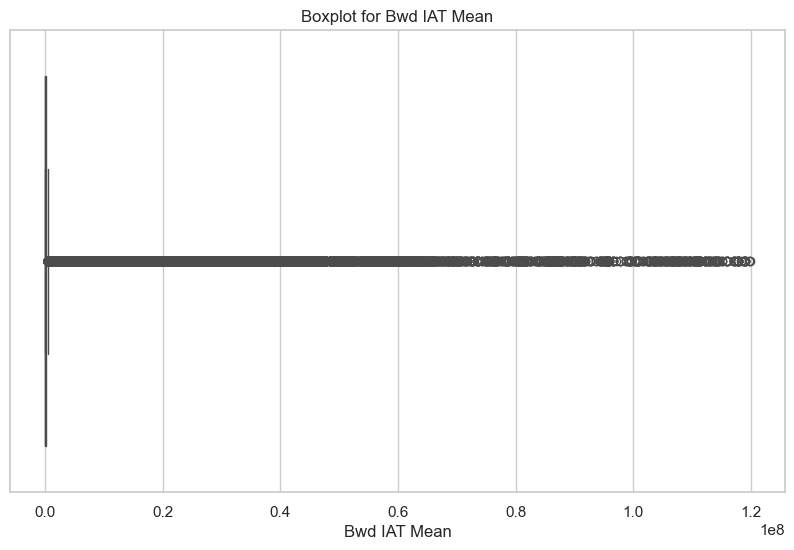

Number of outliers in Bwd IAT Mean: 4423


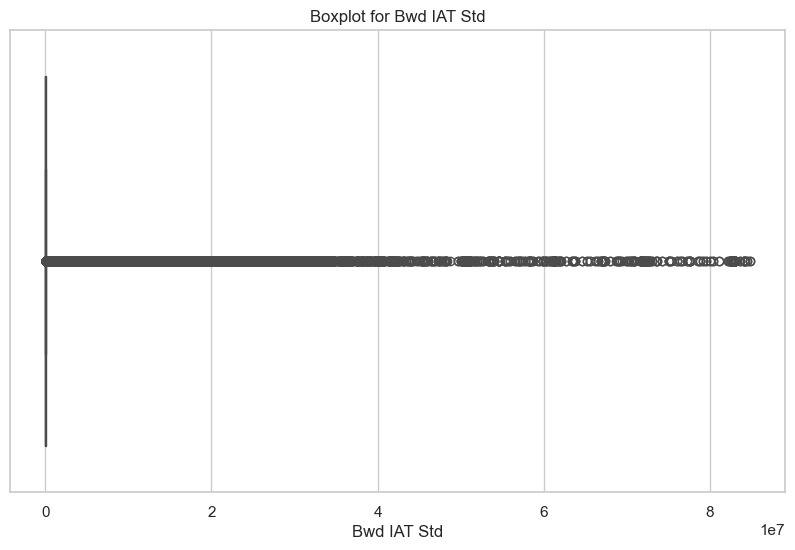

Number of outliers in Bwd IAT Std: 4421


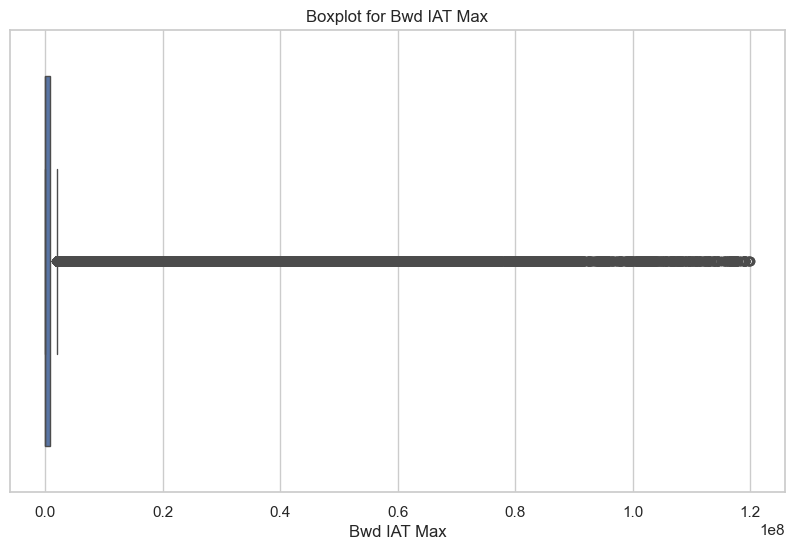

Number of outliers in Bwd IAT Max: 3329


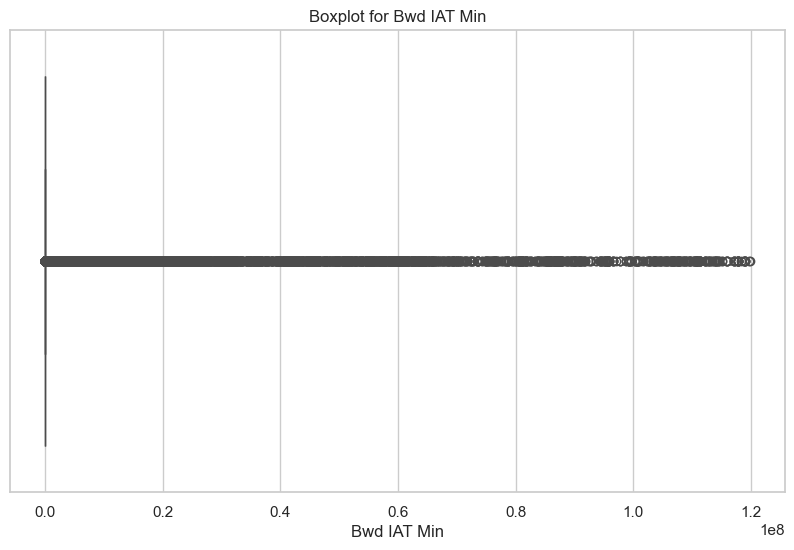

Number of outliers in Bwd IAT Min: 3537


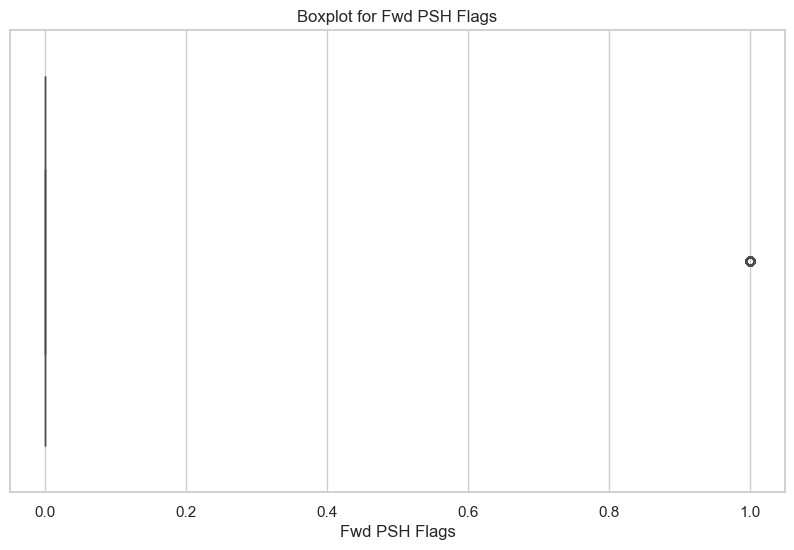

Number of outliers in Fwd PSH Flags: 15084


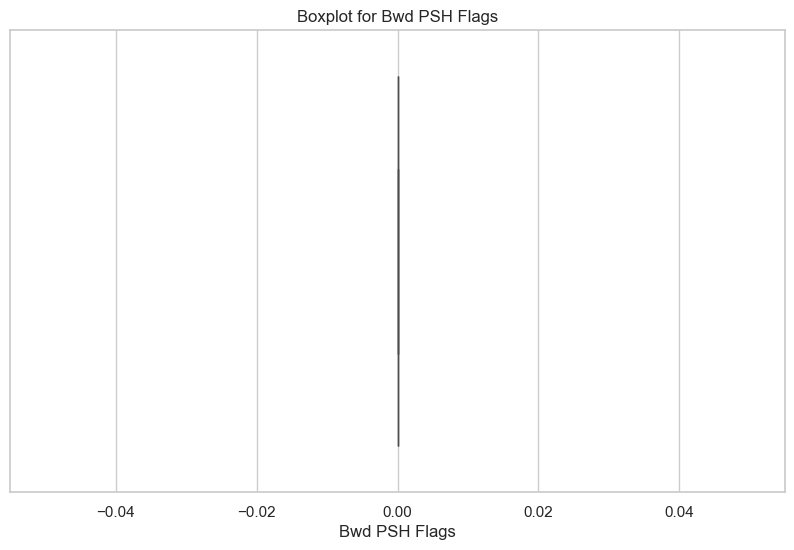

Number of outliers in Bwd PSH Flags: 0


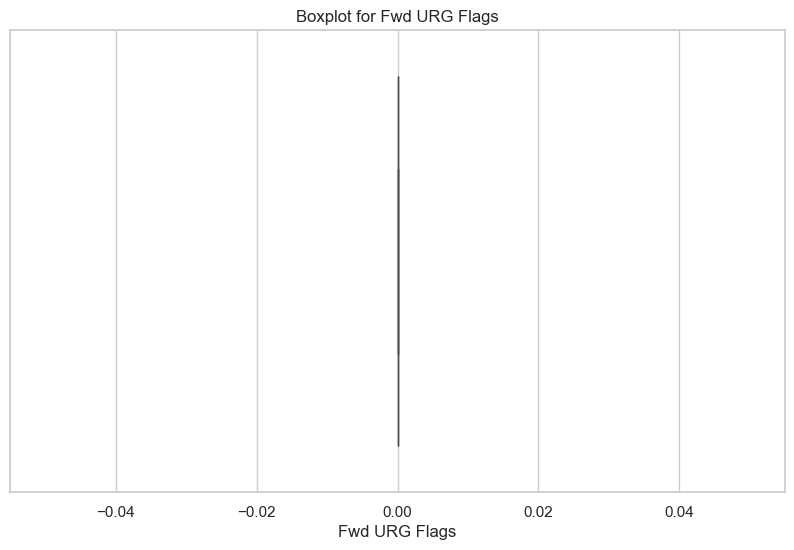

Number of outliers in Fwd URG Flags: 0


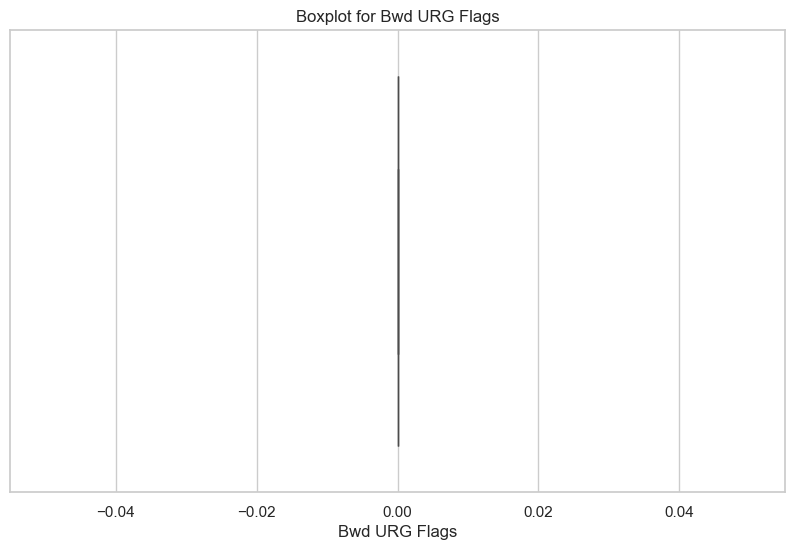

Number of outliers in Bwd URG Flags: 0


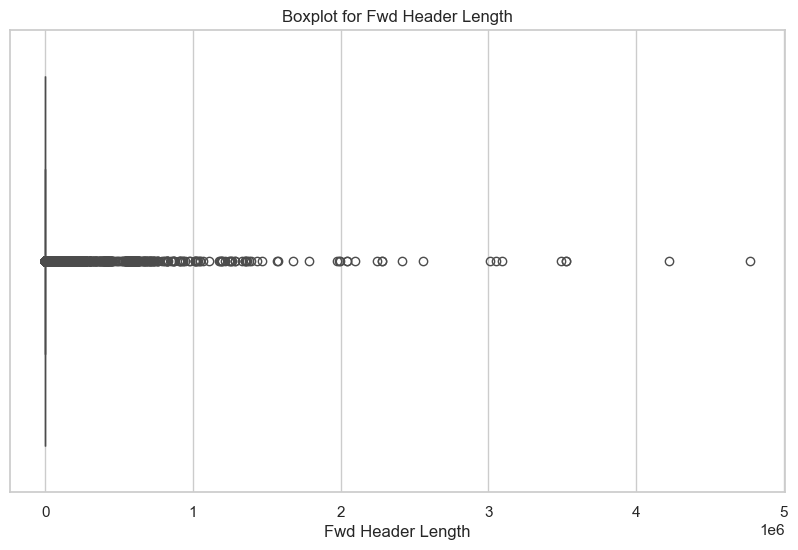

Number of outliers in Fwd Header Length: 542


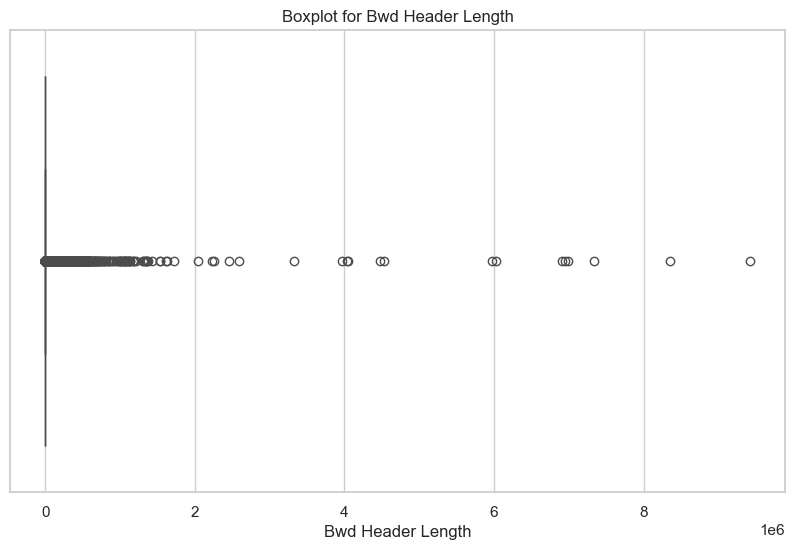

Number of outliers in Bwd Header Length: 467


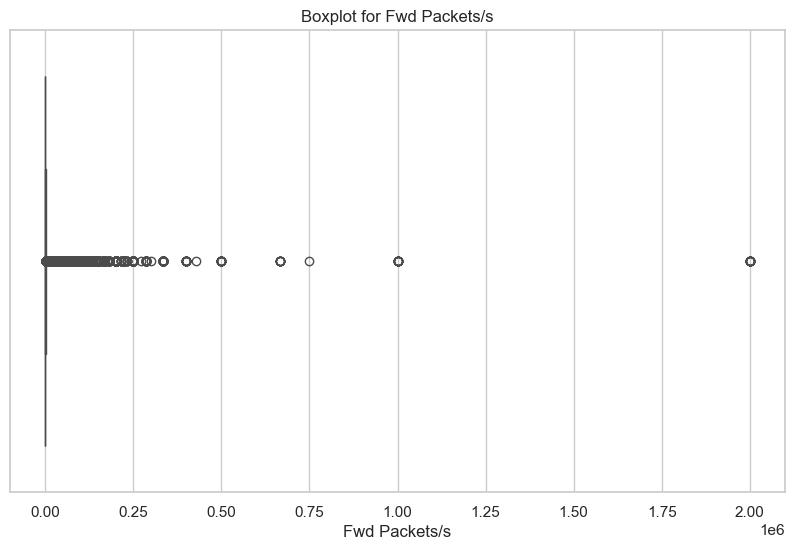

Number of outliers in Fwd Packets/s: 1838


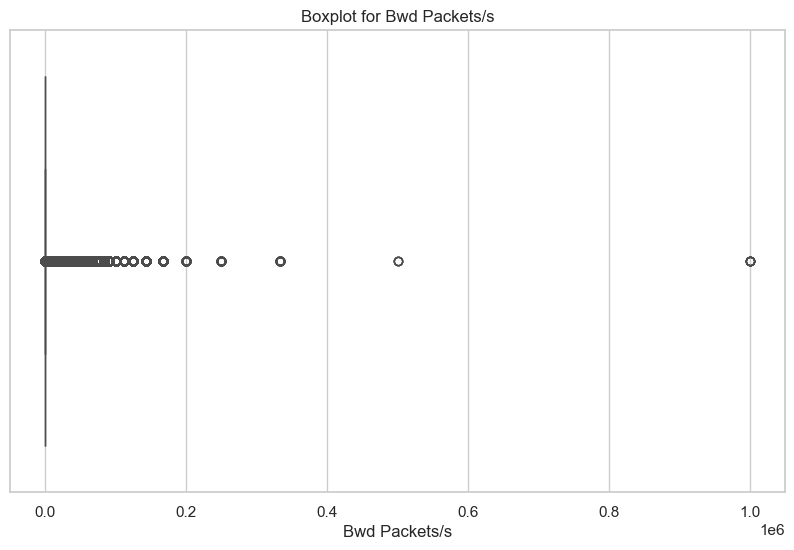

Number of outliers in Bwd Packets/s: 3974


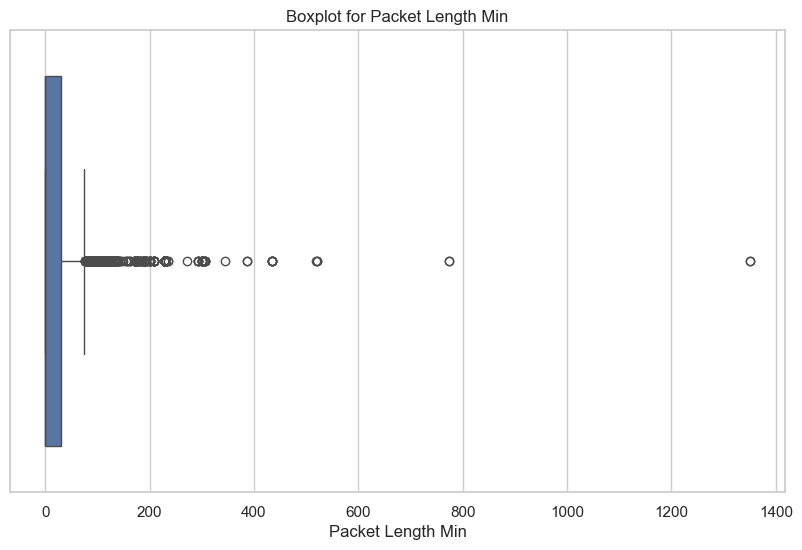

Number of outliers in Packet Length Min: 2378


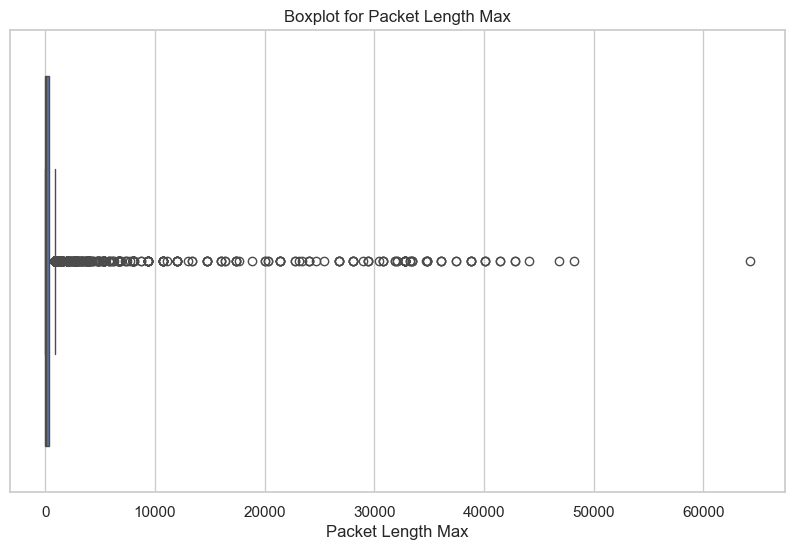

Number of outliers in Packet Length Max: 268


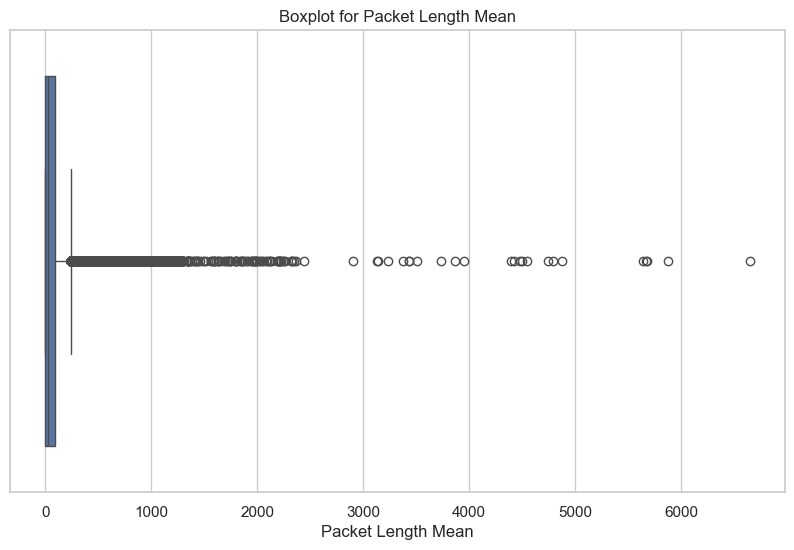

Number of outliers in Packet Length Mean: 4088


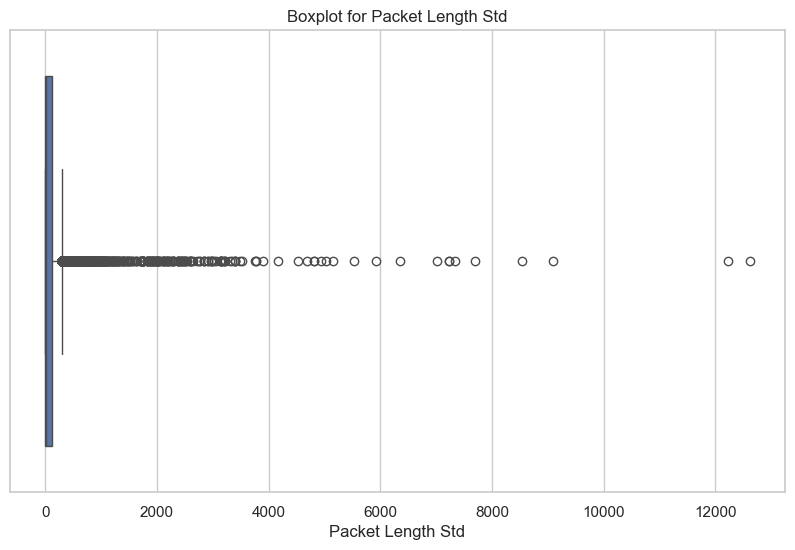

Number of outliers in Packet Length Std: 269


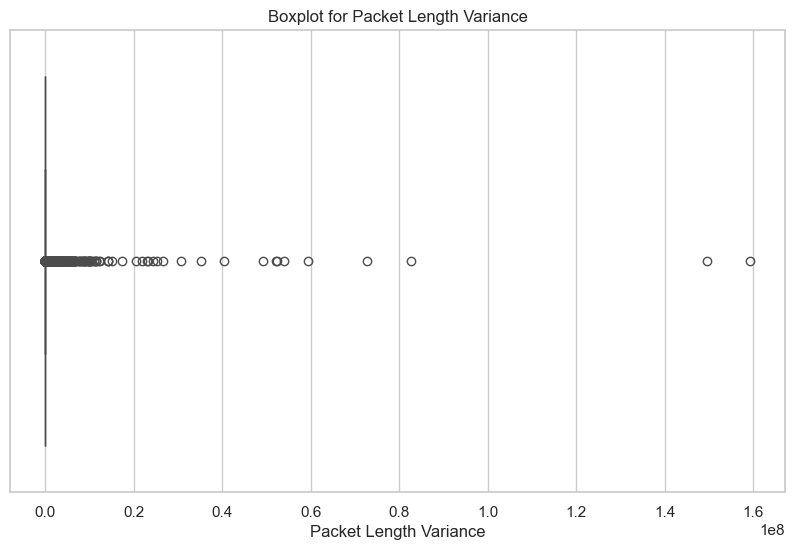

Number of outliers in Packet Length Variance: 144


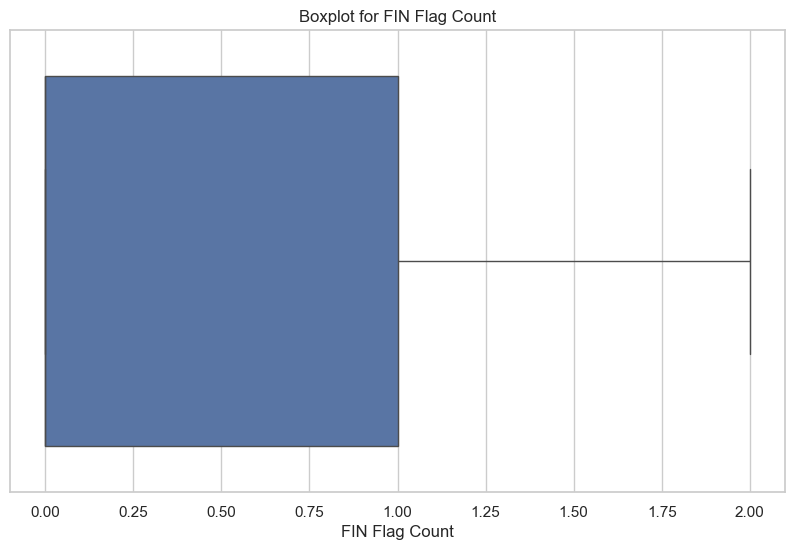

Number of outliers in FIN Flag Count: 0


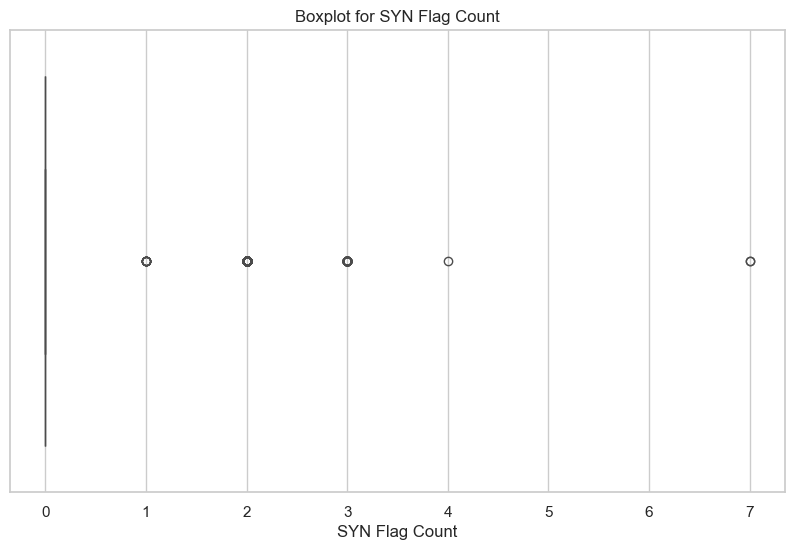

Number of outliers in SYN Flag Count: 3


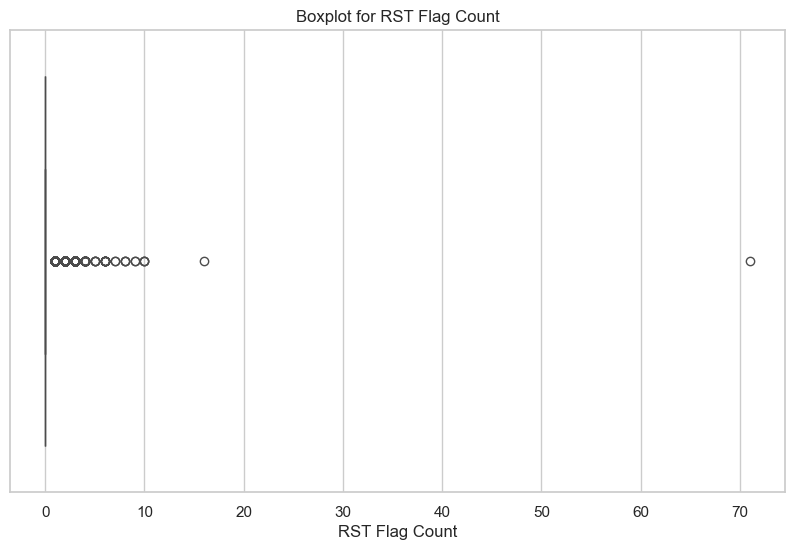

Number of outliers in RST Flag Count: 1517


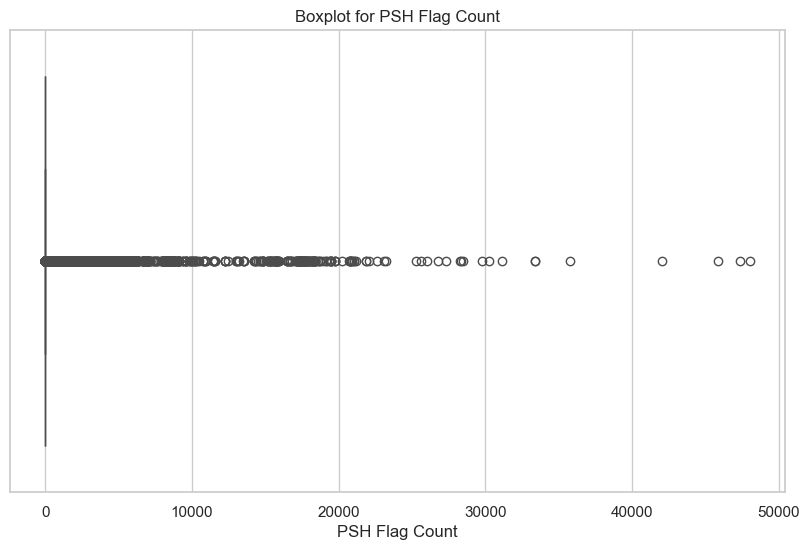

Number of outliers in PSH Flag Count: 969


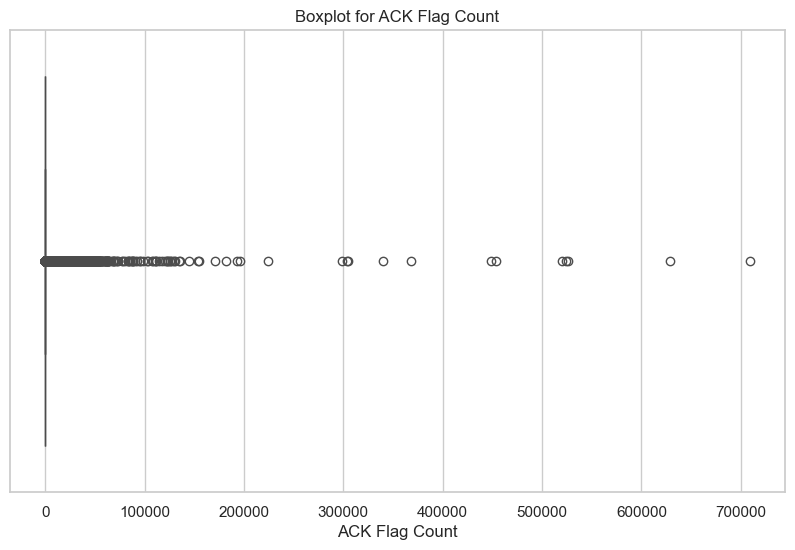

Number of outliers in ACK Flag Count: 542


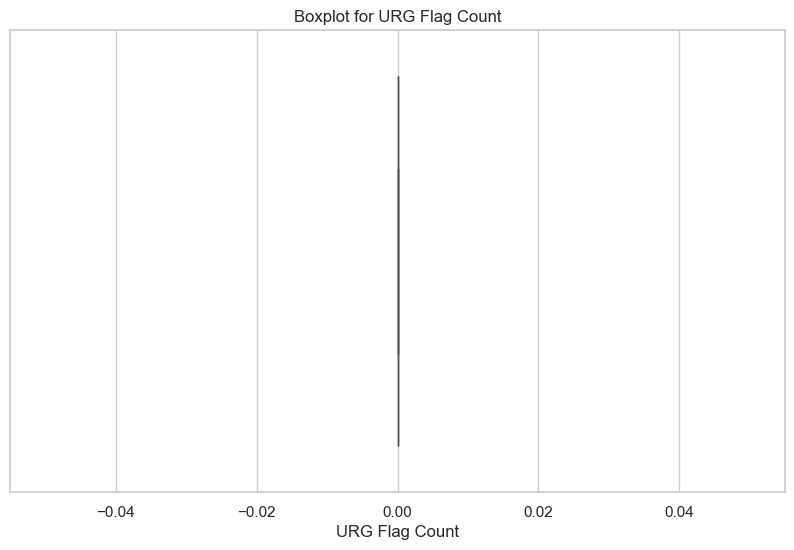

Number of outliers in URG Flag Count: 0


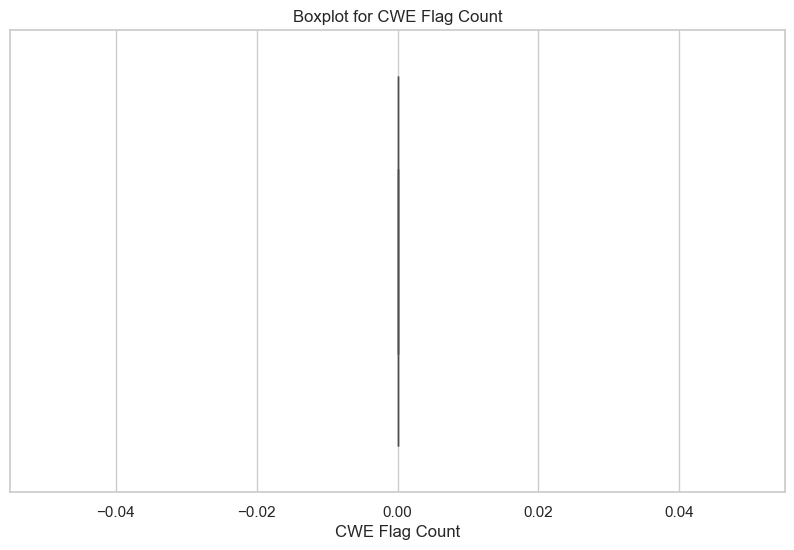

Number of outliers in CWE Flag Count: 0


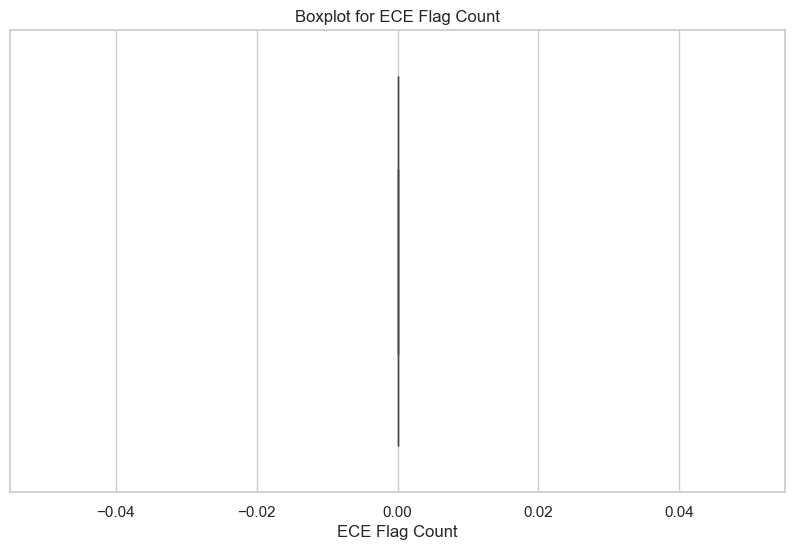

Number of outliers in ECE Flag Count: 0


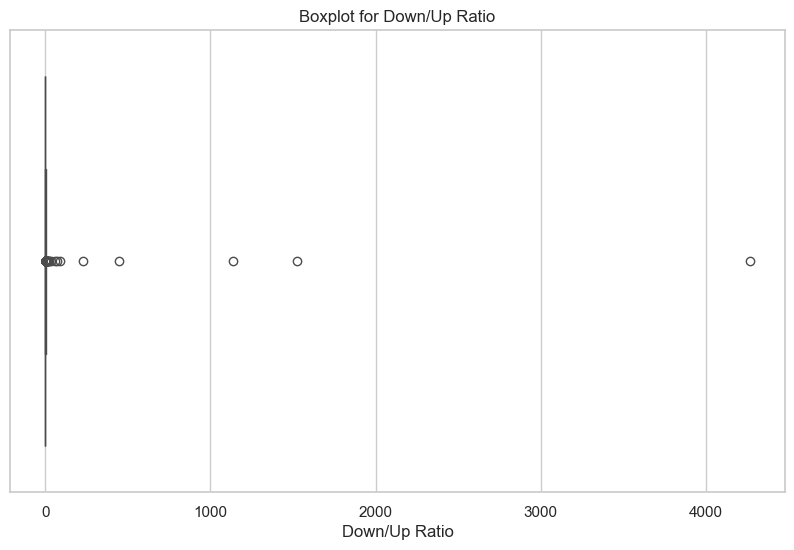

Number of outliers in Down/Up Ratio: 8


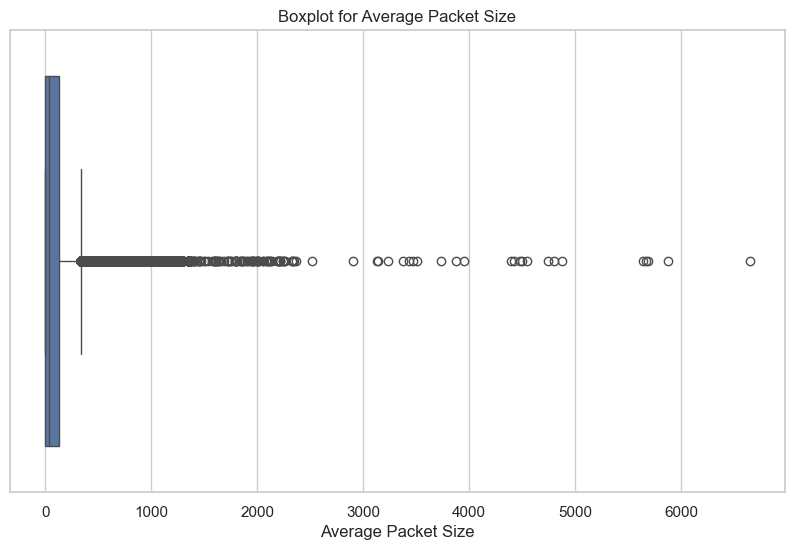

Number of outliers in Average Packet Size: 3771


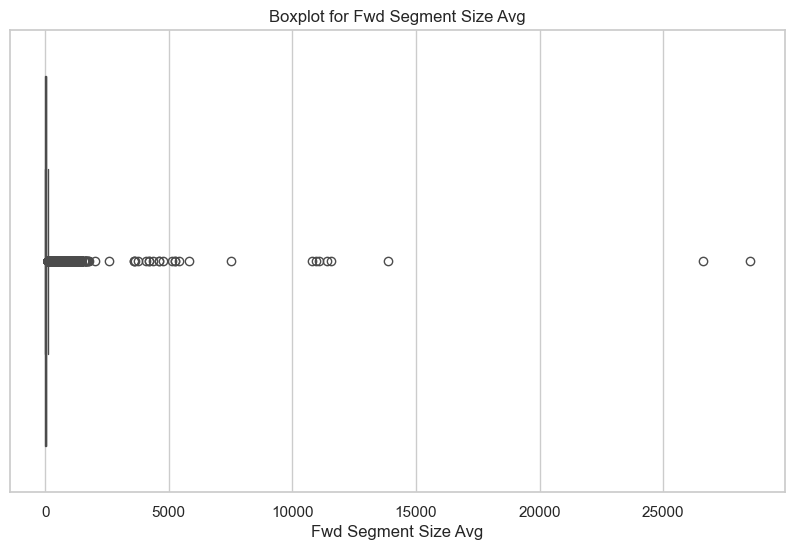

Number of outliers in Fwd Segment Size Avg: 2228


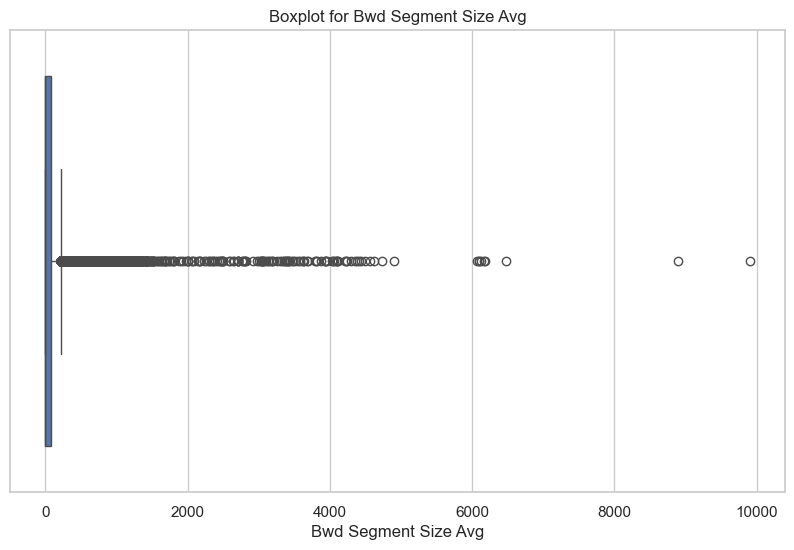

Number of outliers in Bwd Segment Size Avg: 4954


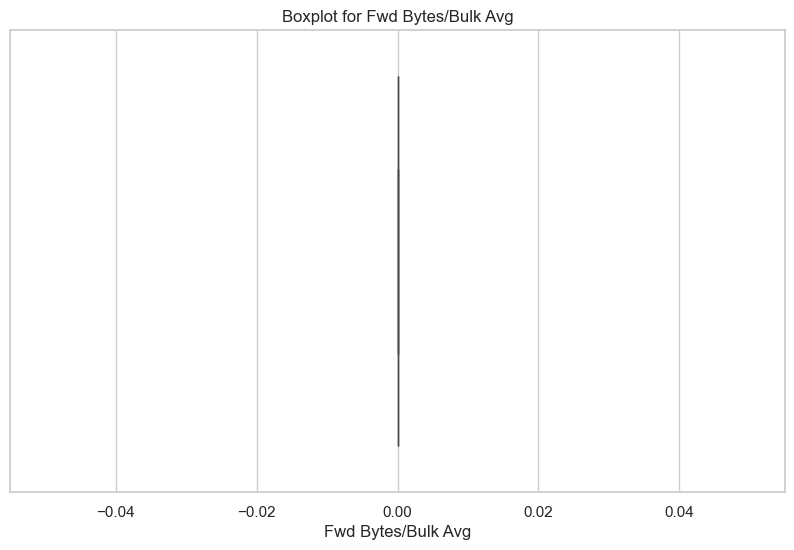

Number of outliers in Fwd Bytes/Bulk Avg: 0


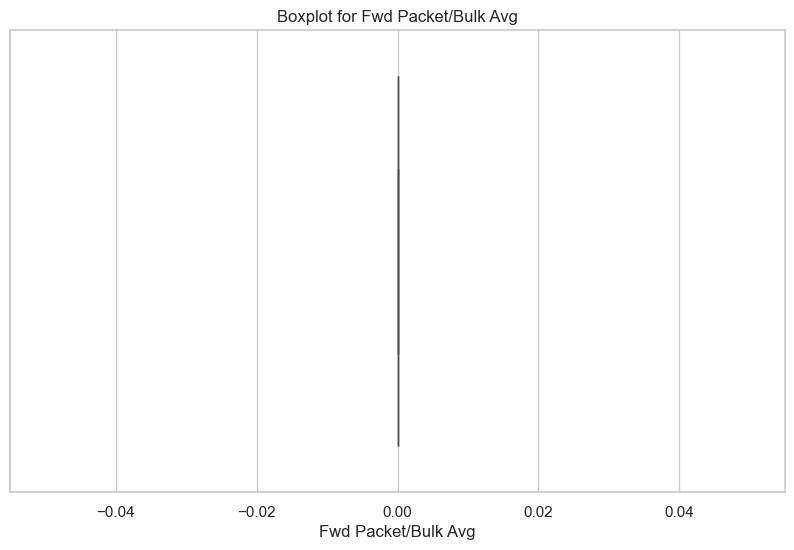

Number of outliers in Fwd Packet/Bulk Avg: 0


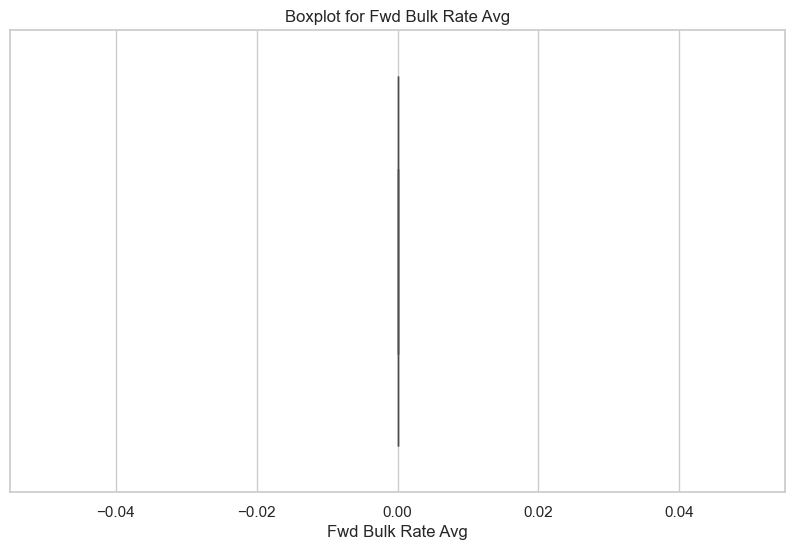

Number of outliers in Fwd Bulk Rate Avg: 0


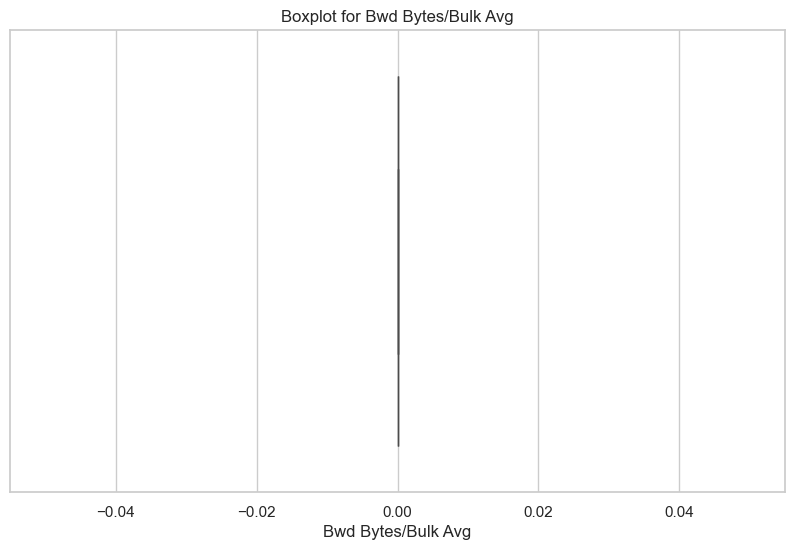

Number of outliers in Bwd Bytes/Bulk Avg: 0


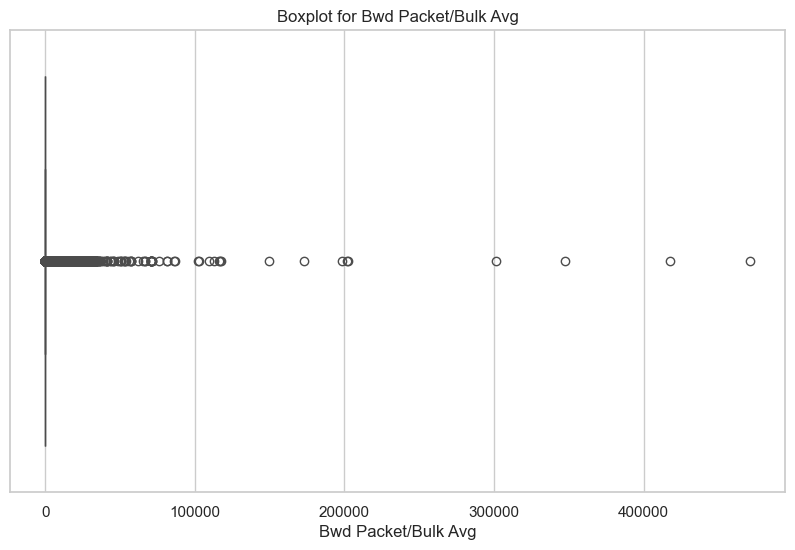

Number of outliers in Bwd Packet/Bulk Avg: 722


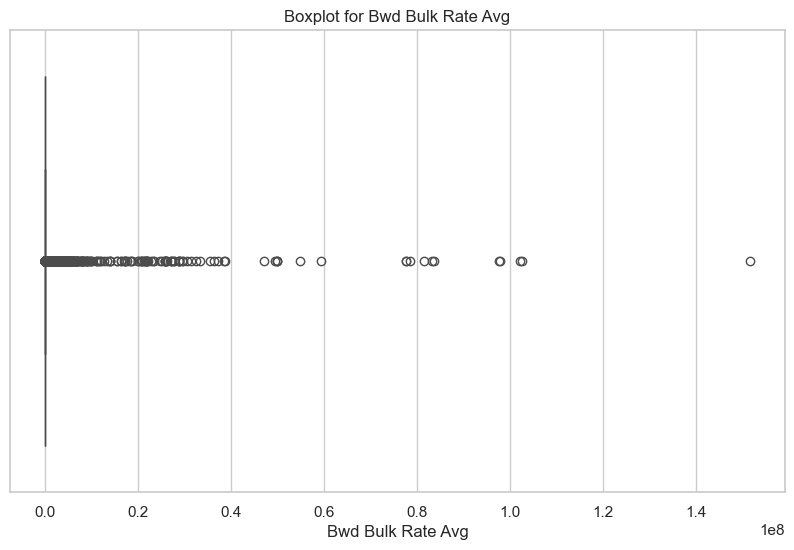

Number of outliers in Bwd Bulk Rate Avg: 287


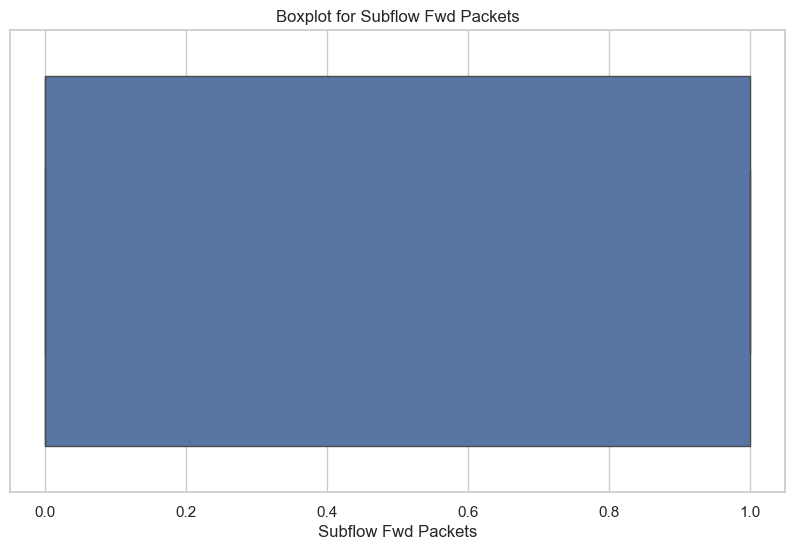

Number of outliers in Subflow Fwd Packets: 0


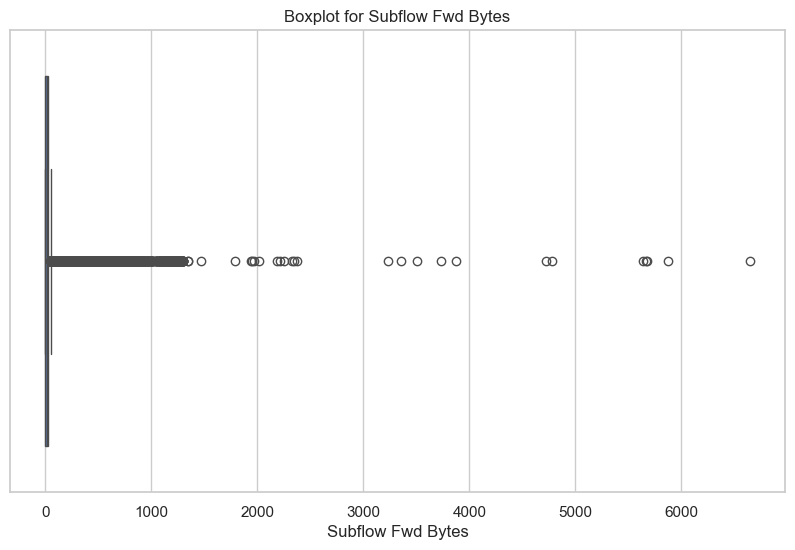

Number of outliers in Subflow Fwd Bytes: 2130


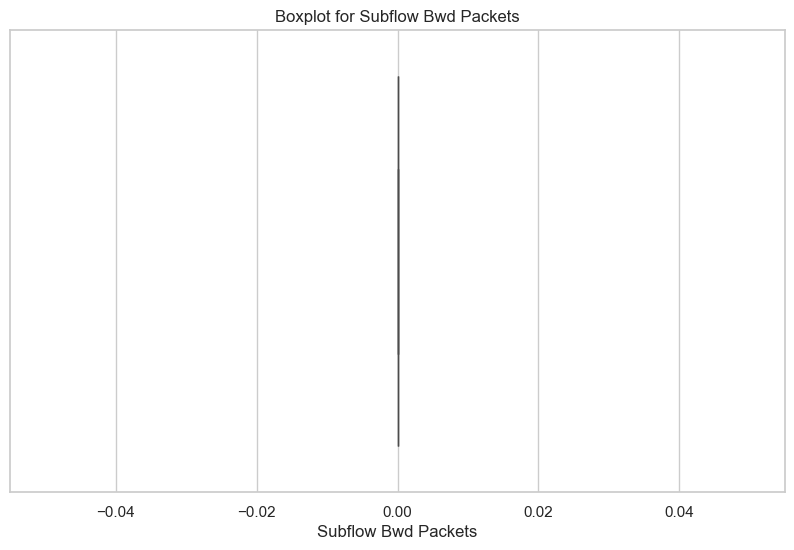

Number of outliers in Subflow Bwd Packets: 0


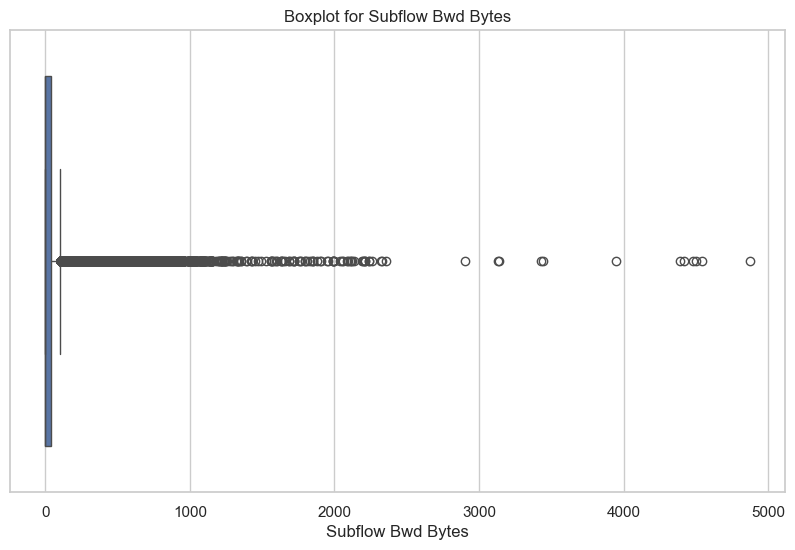

Number of outliers in Subflow Bwd Bytes: 4578


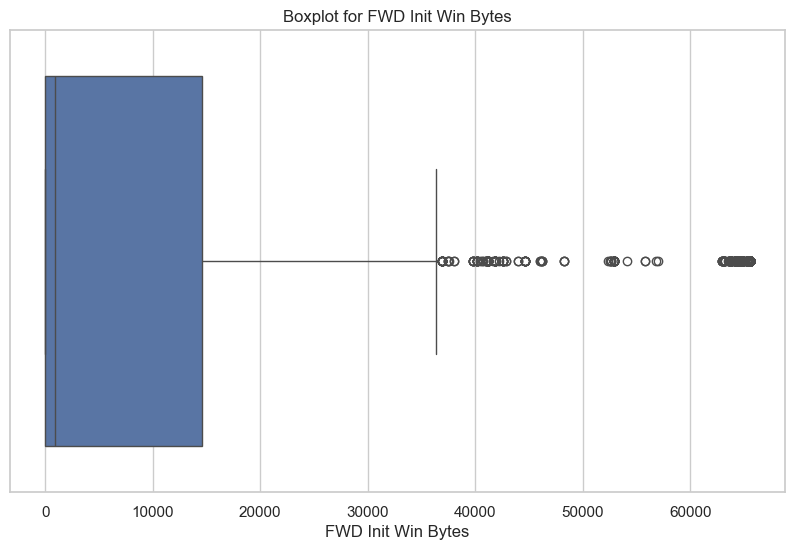

Number of outliers in FWD Init Win Bytes: 2044


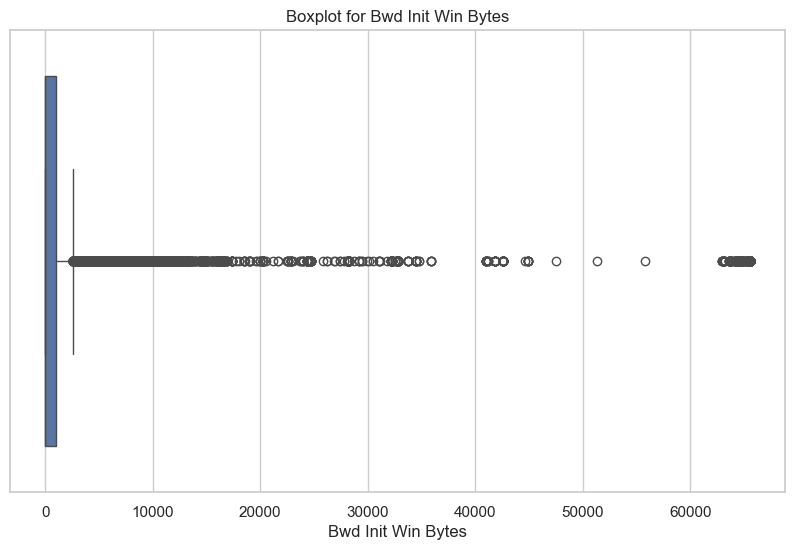

Number of outliers in Bwd Init Win Bytes: 2011


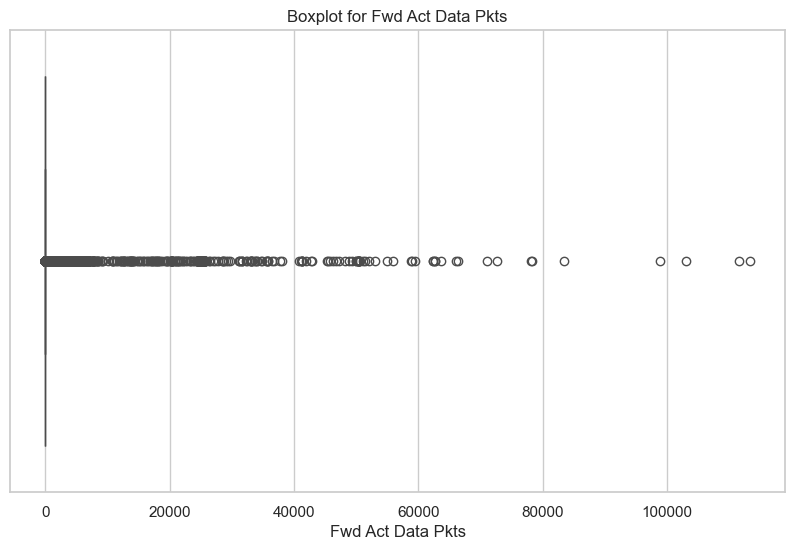

Number of outliers in Fwd Act Data Pkts: 689


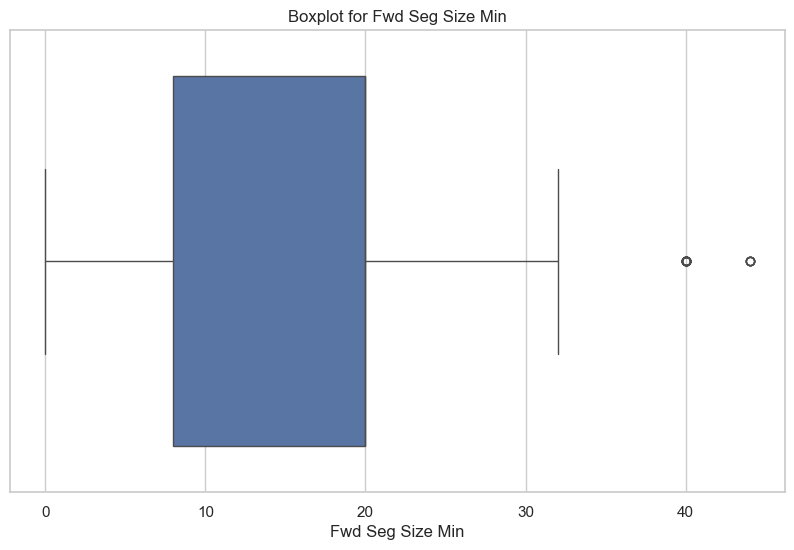

Number of outliers in Fwd Seg Size Min: 34


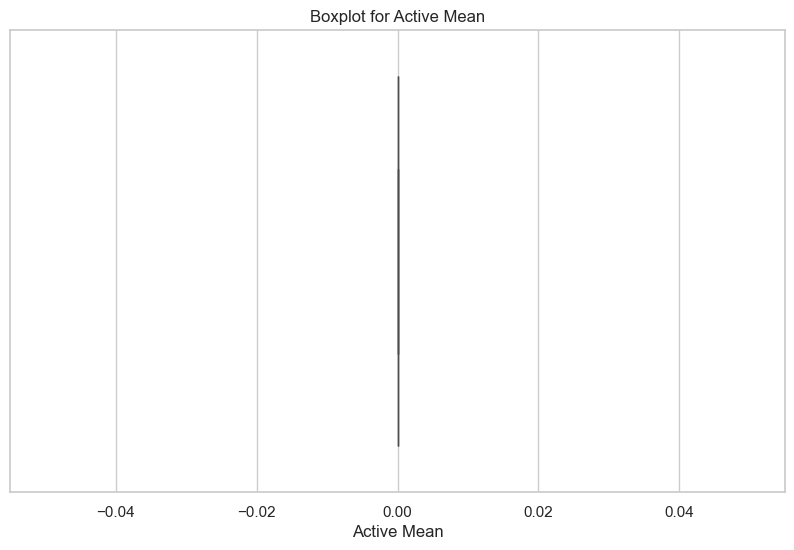

Number of outliers in Active Mean: 0


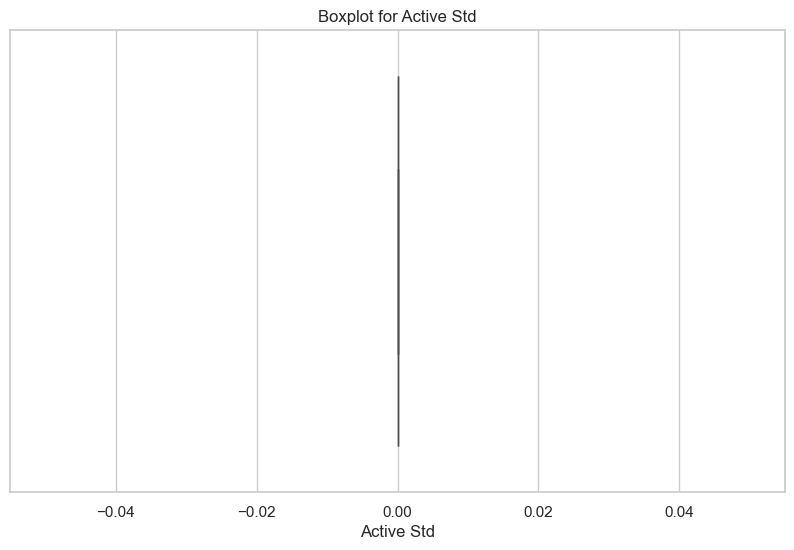

Number of outliers in Active Std: 0


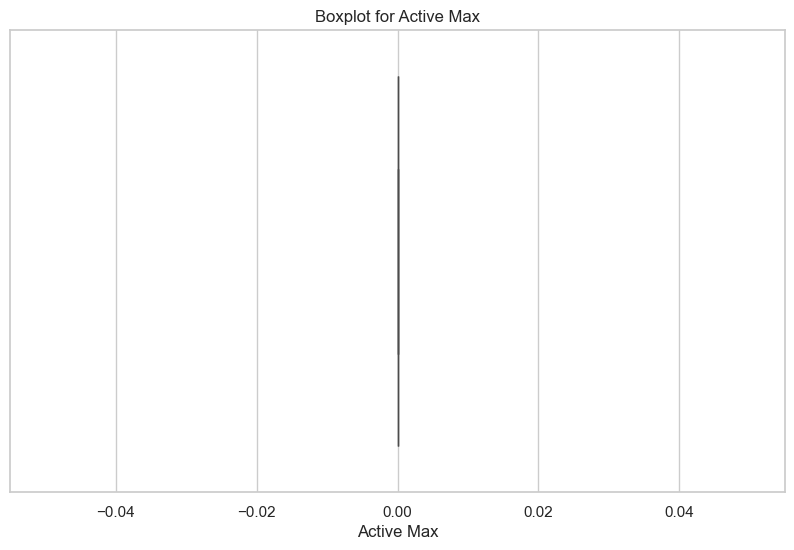

Number of outliers in Active Max: 0


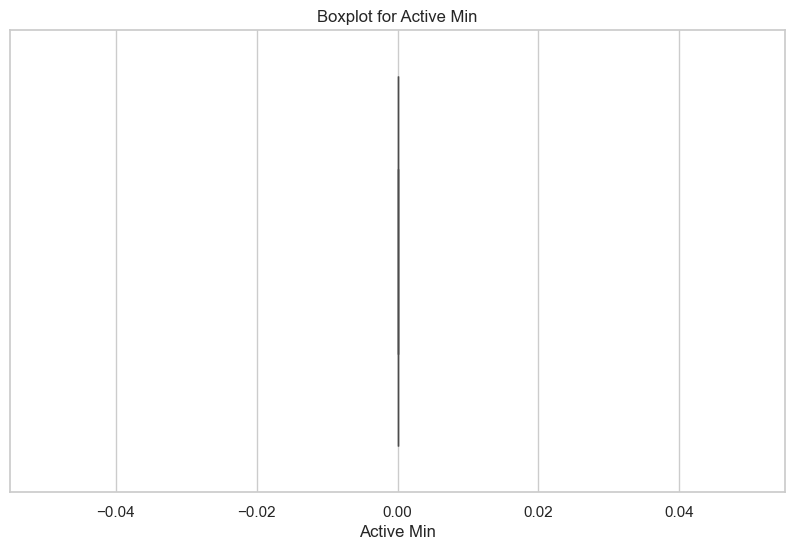

Number of outliers in Active Min: 0


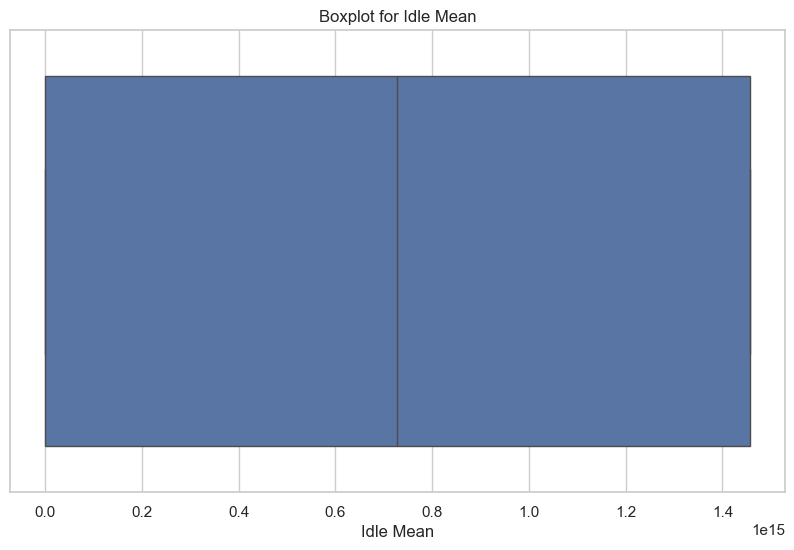

Number of outliers in Idle Mean: 0


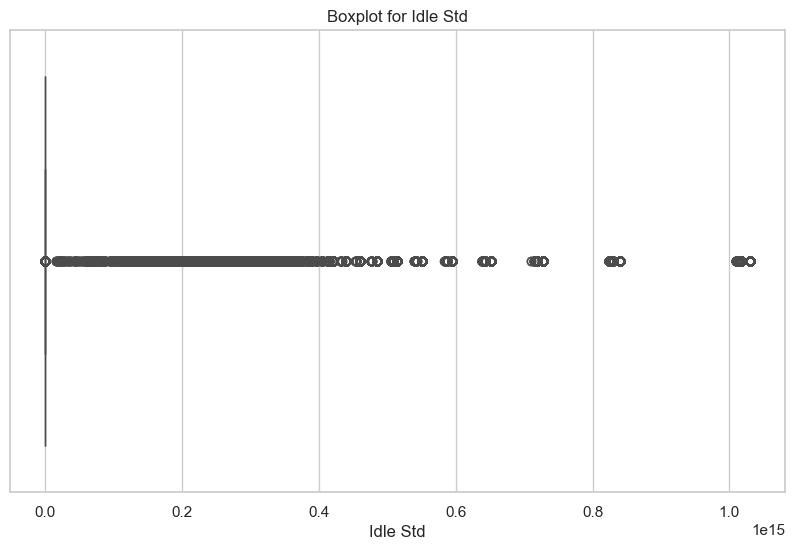

Number of outliers in Idle Std: 6546


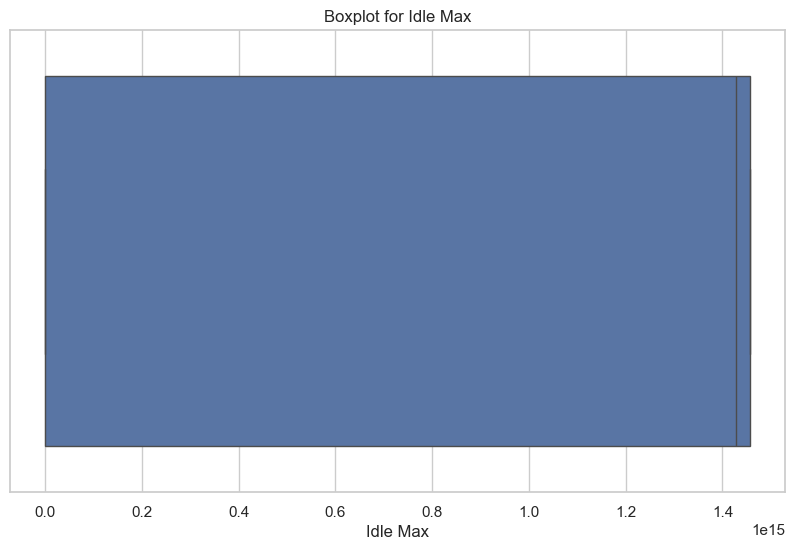

Number of outliers in Idle Max: 0


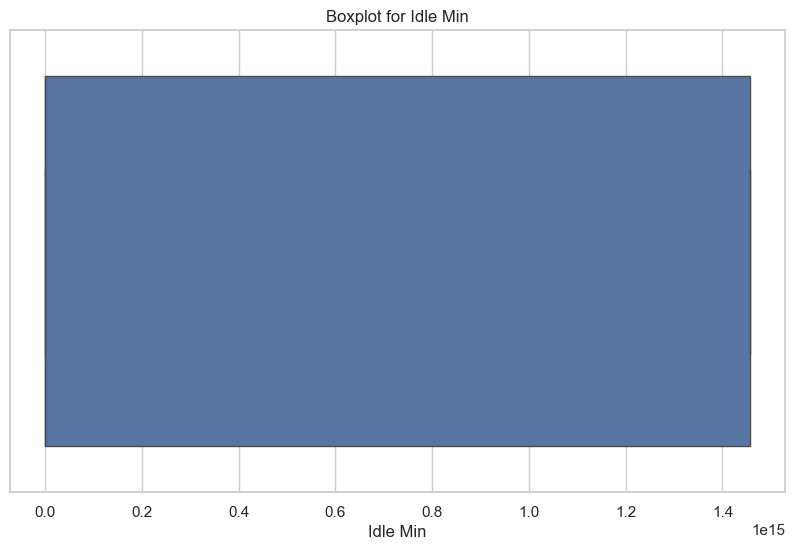

Number of outliers in Idle Min: 0


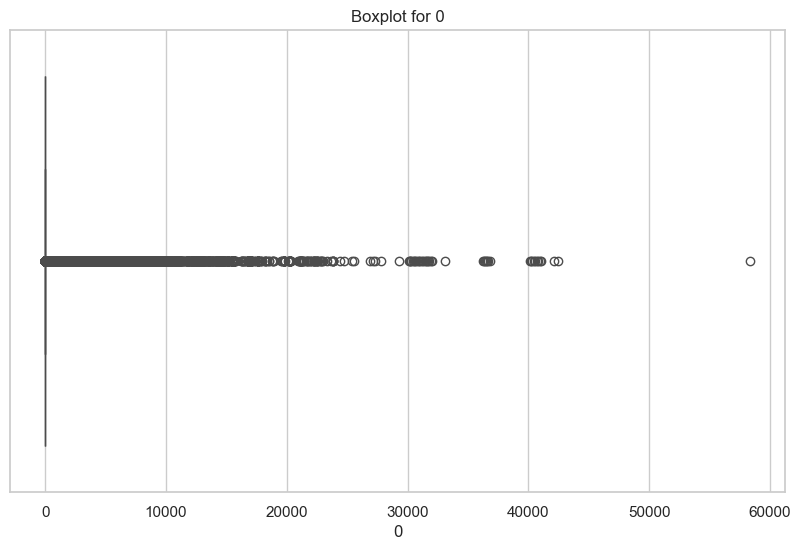

Number of outliers in 0: 3853


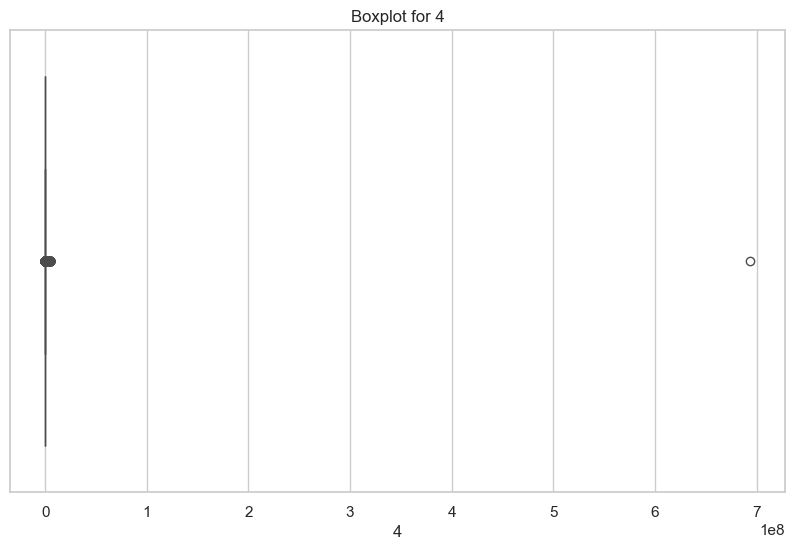

Number of outliers in 4: 60


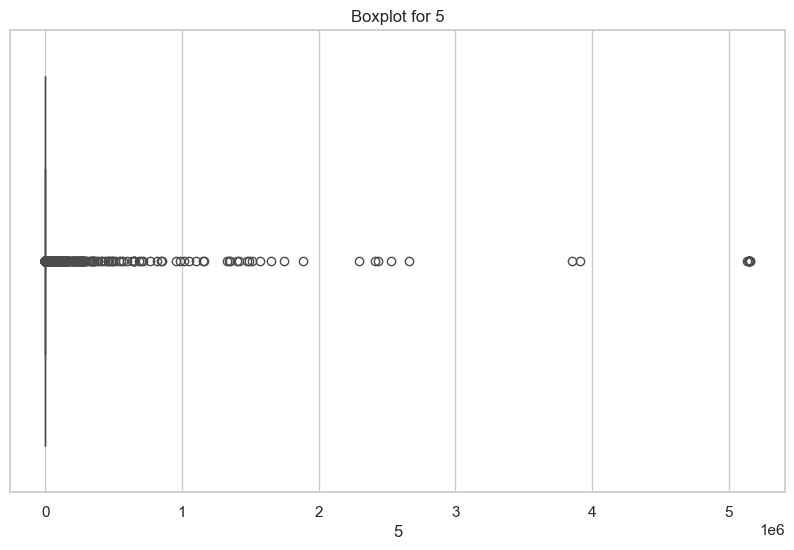

Number of outliers in 5: 178


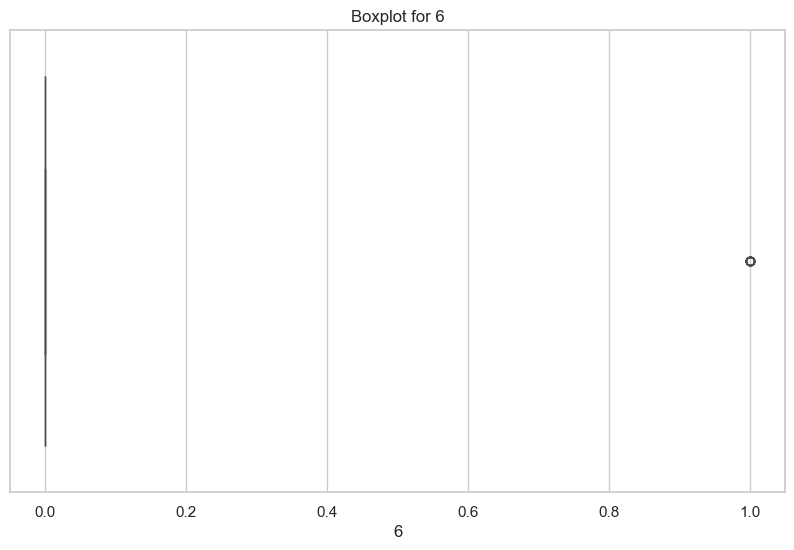

Number of outliers in 6: 22


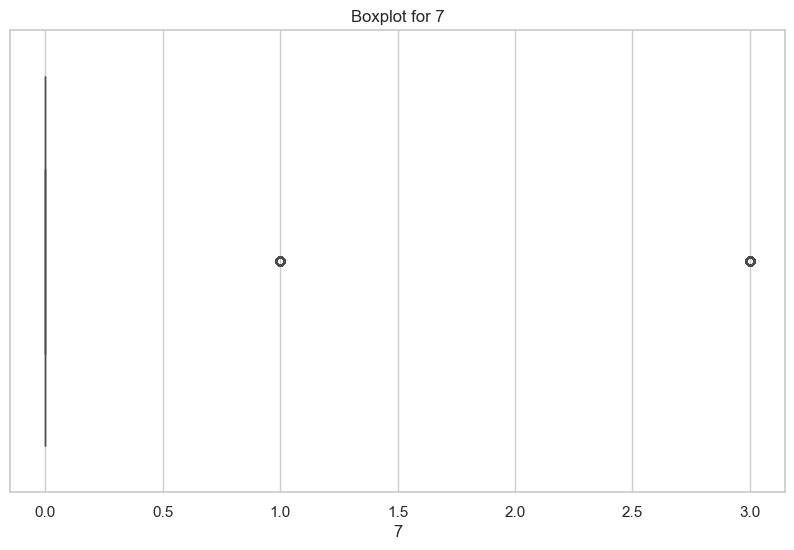

Number of outliers in 7: 1238


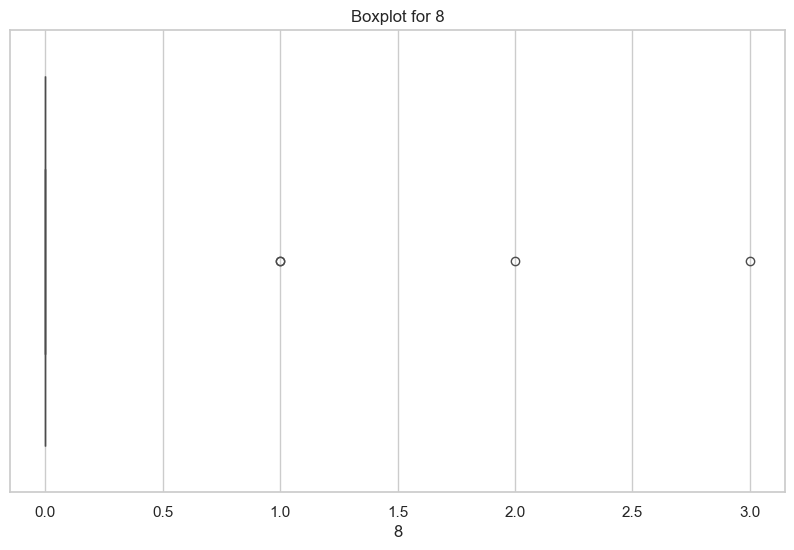

Number of outliers in 8: 4


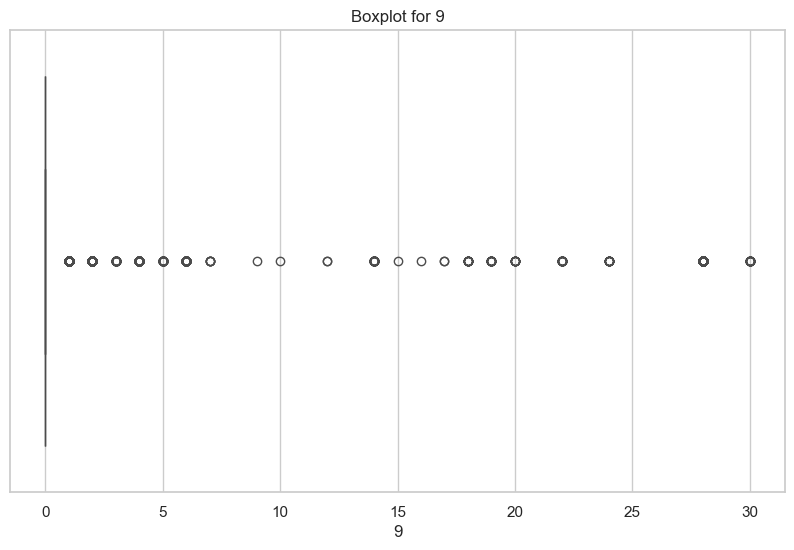

Number of outliers in 9: 744


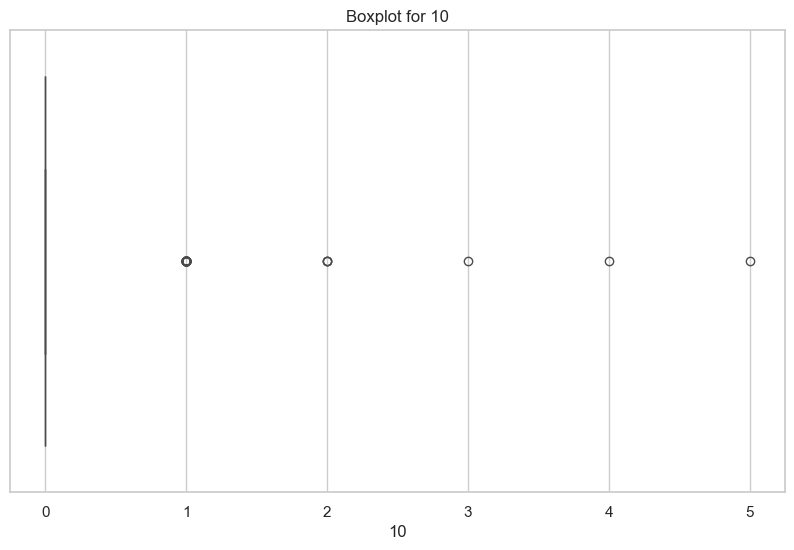

Number of outliers in 10: 63


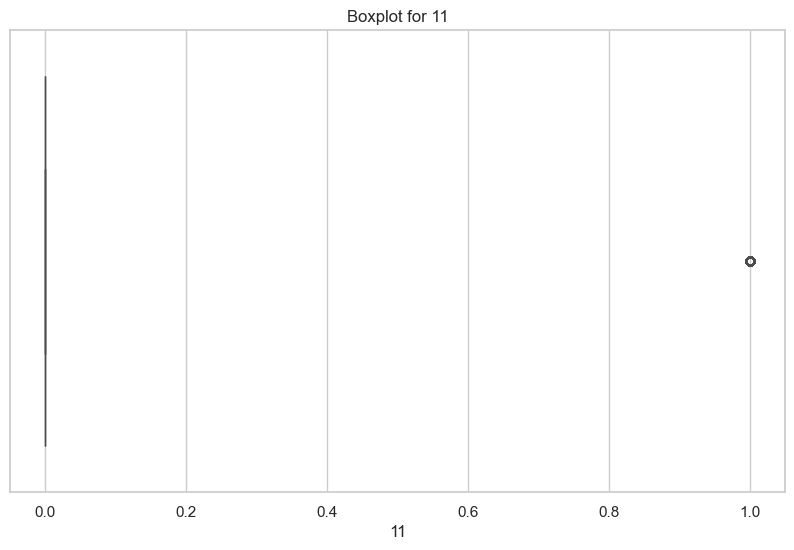

Number of outliers in 11: 0


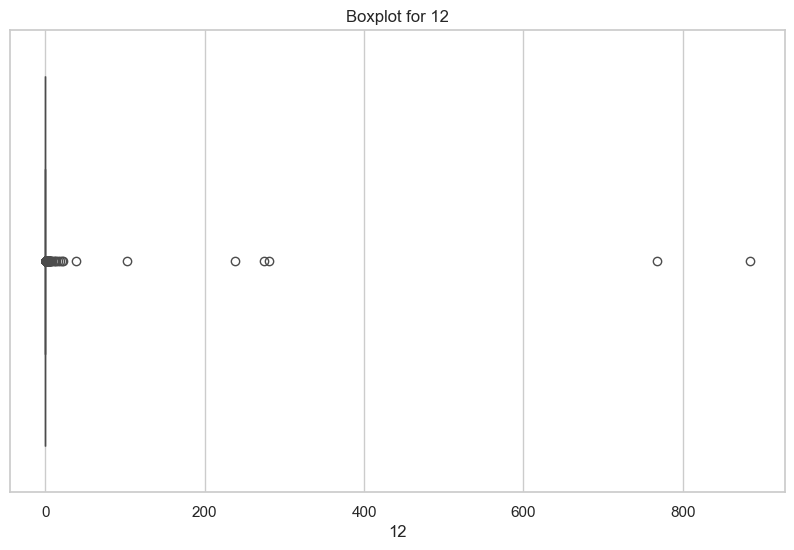

Number of outliers in 12: 20


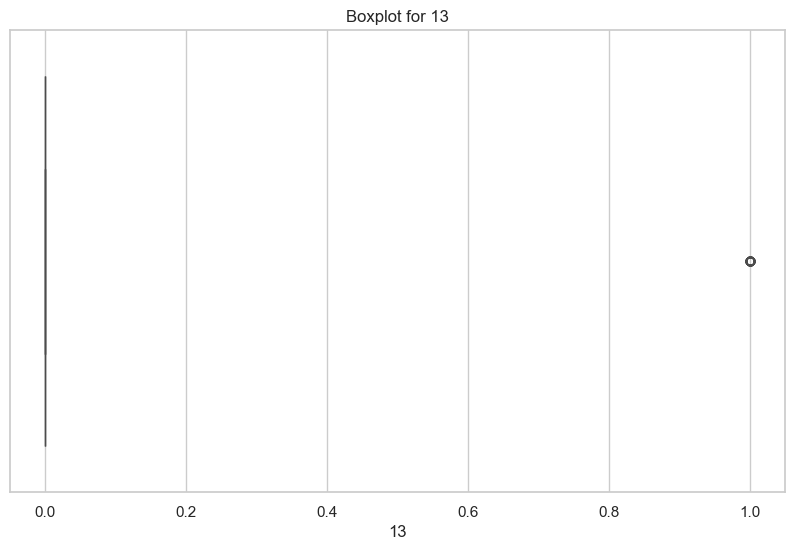

Number of outliers in 13: 55


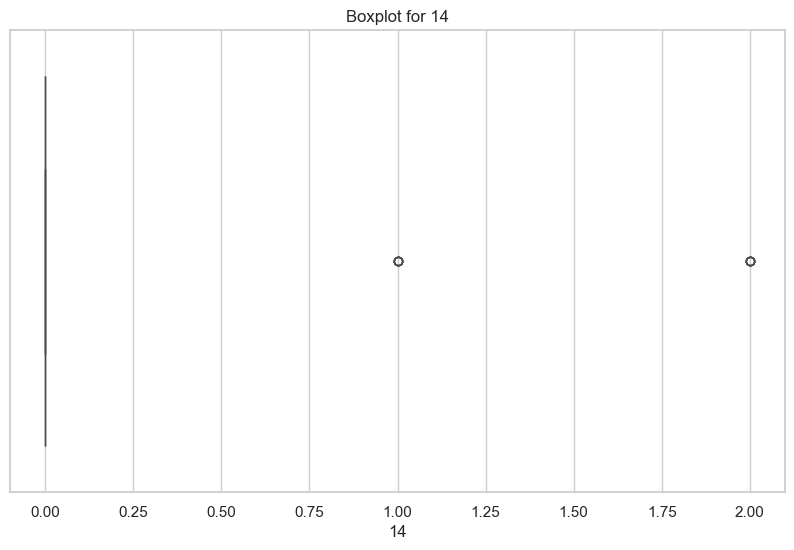

Number of outliers in 14: 12


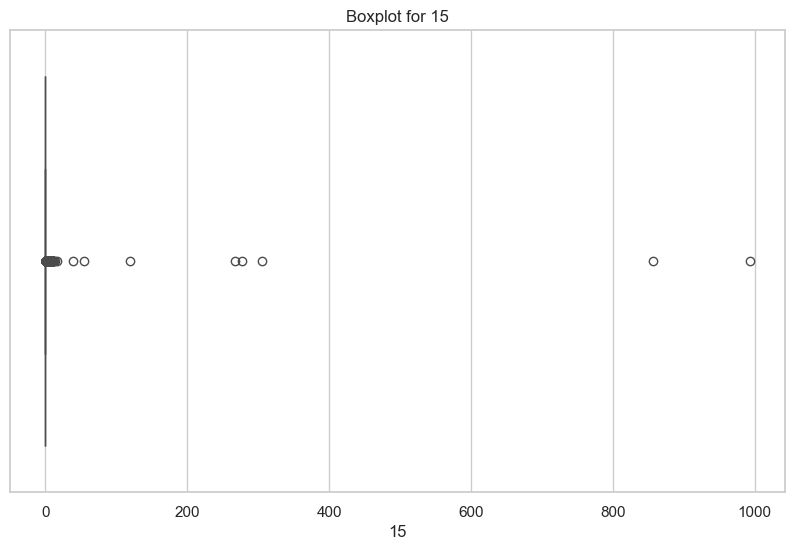

Number of outliers in 15: 179


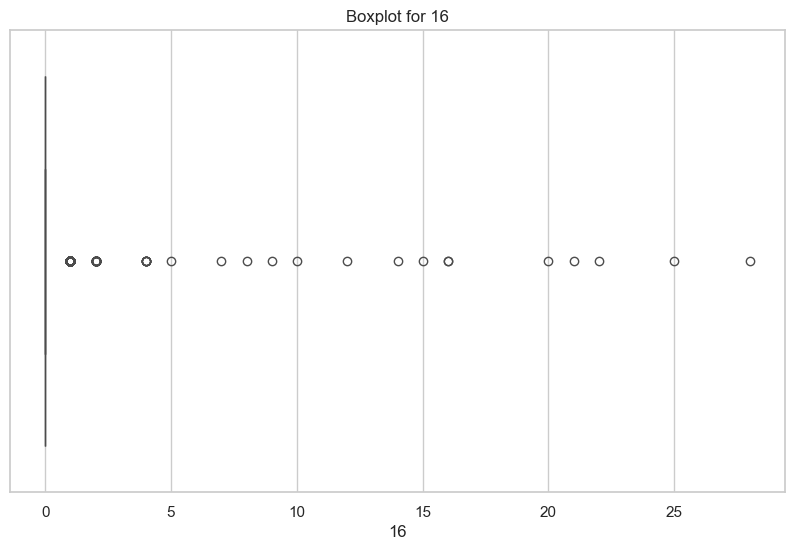

Number of outliers in 16: 265


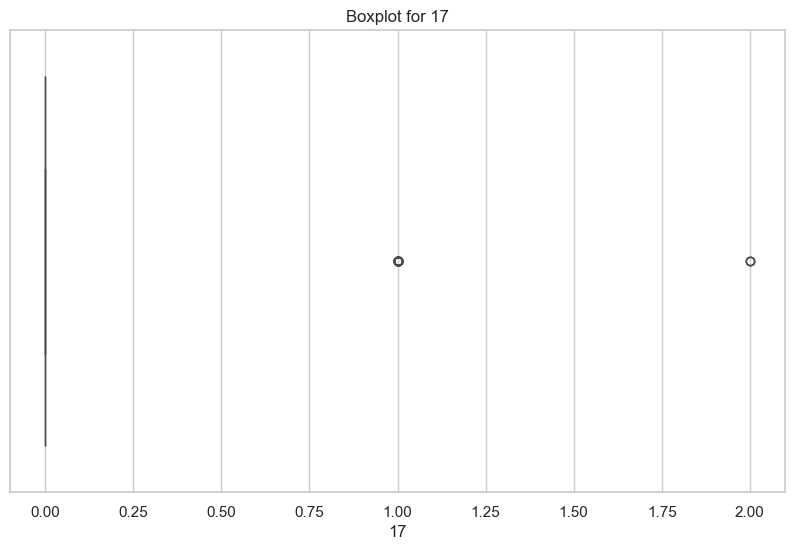

Number of outliers in 17: 51


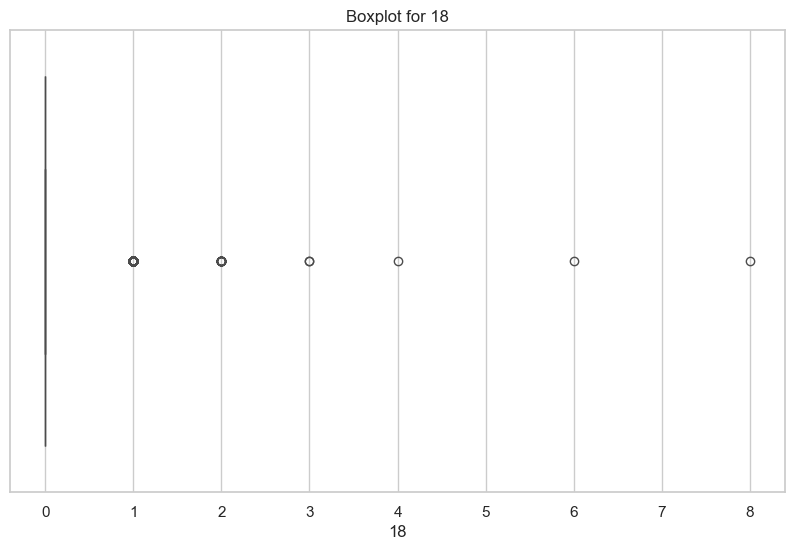

Number of outliers in 18: 454


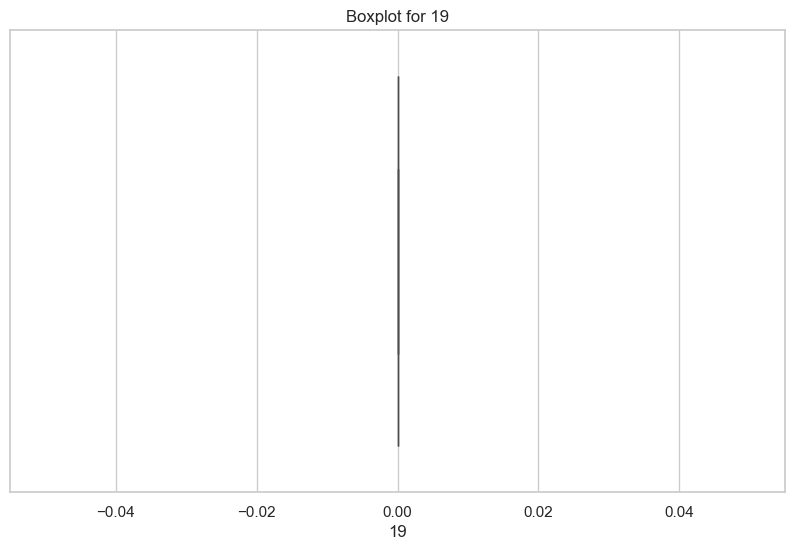

Number of outliers in 19: 0


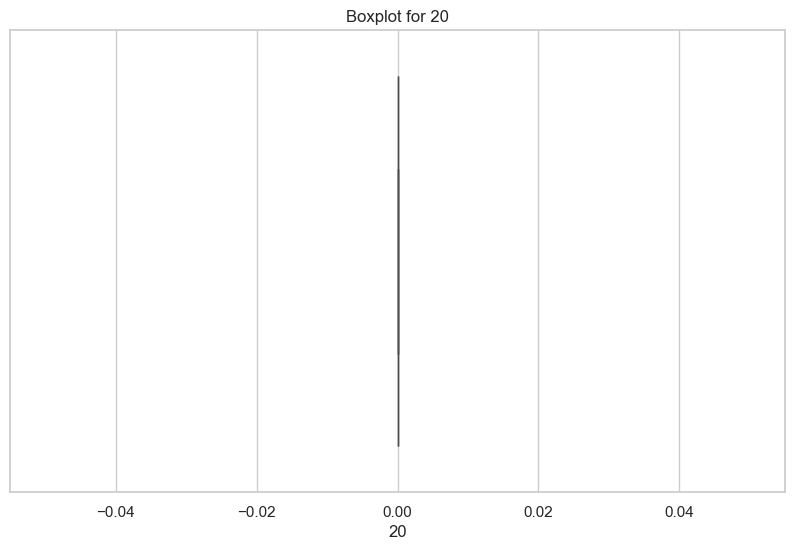

Number of outliers in 20: 0


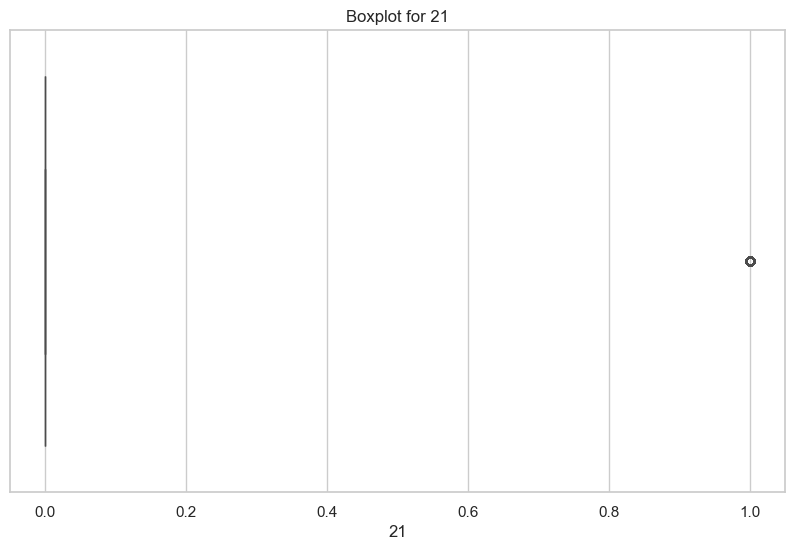

Number of outliers in 21: 685


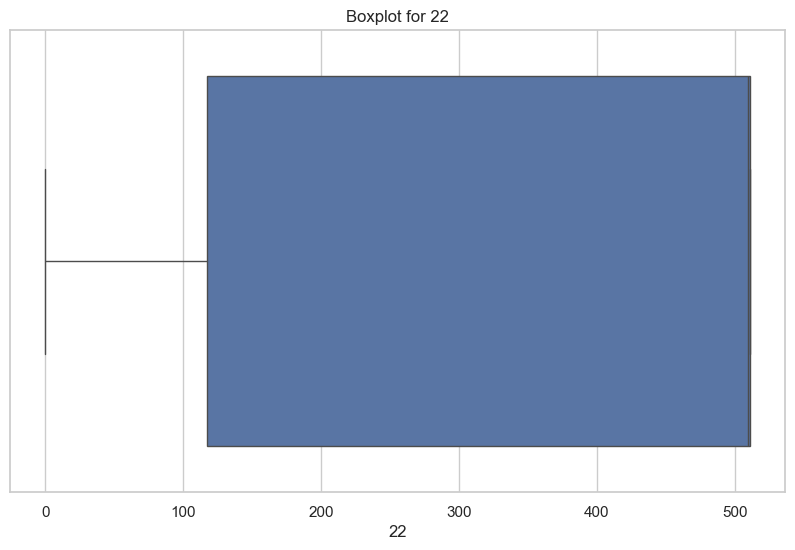

Number of outliers in 22: 0


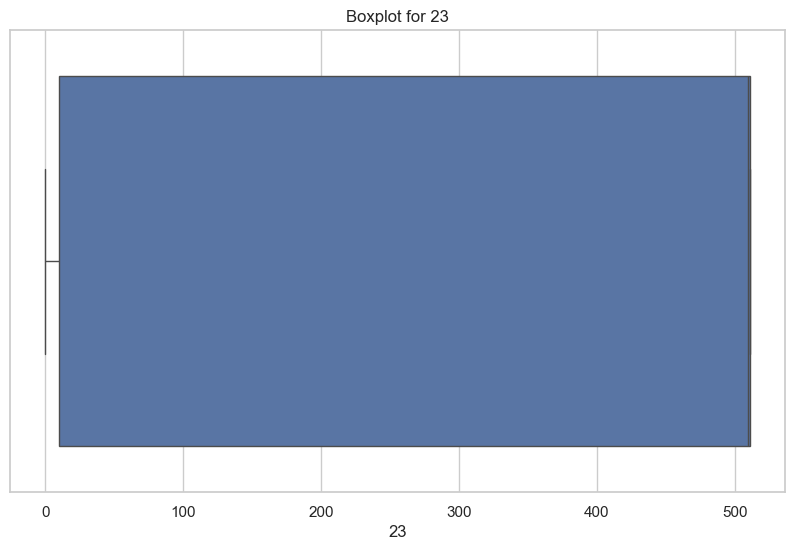

Number of outliers in 23: 0


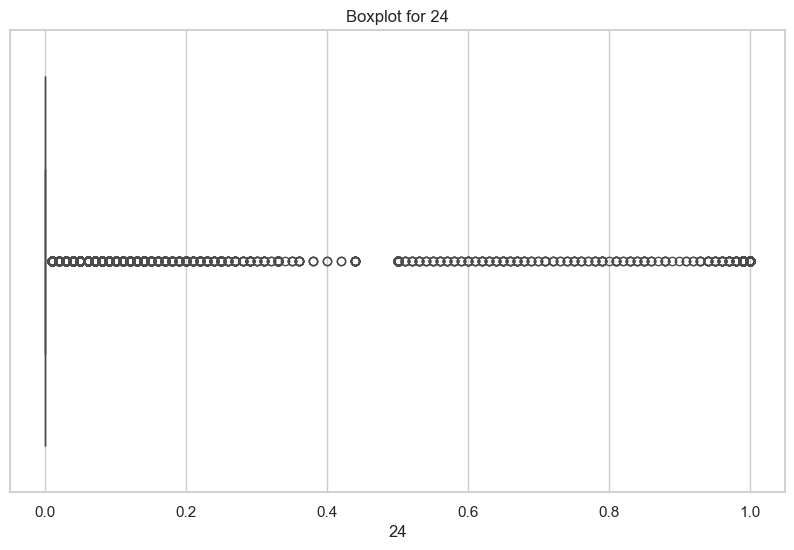

Number of outliers in 24: 0


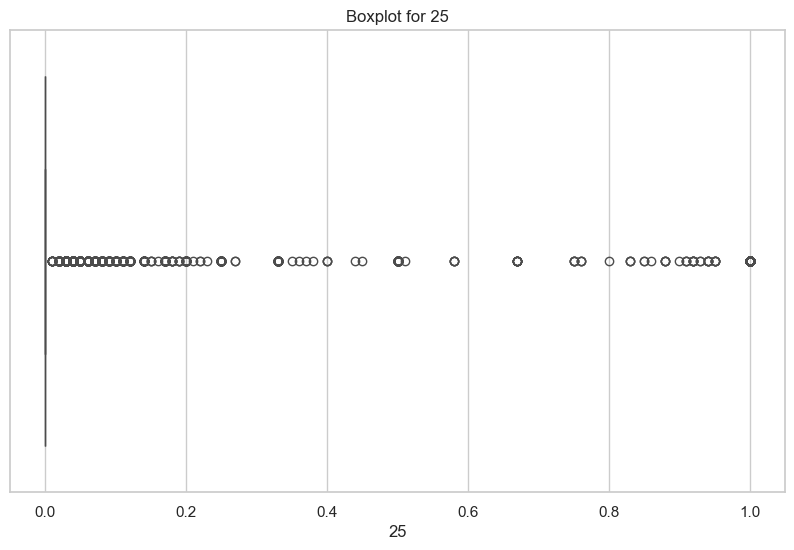

Number of outliers in 25: 0


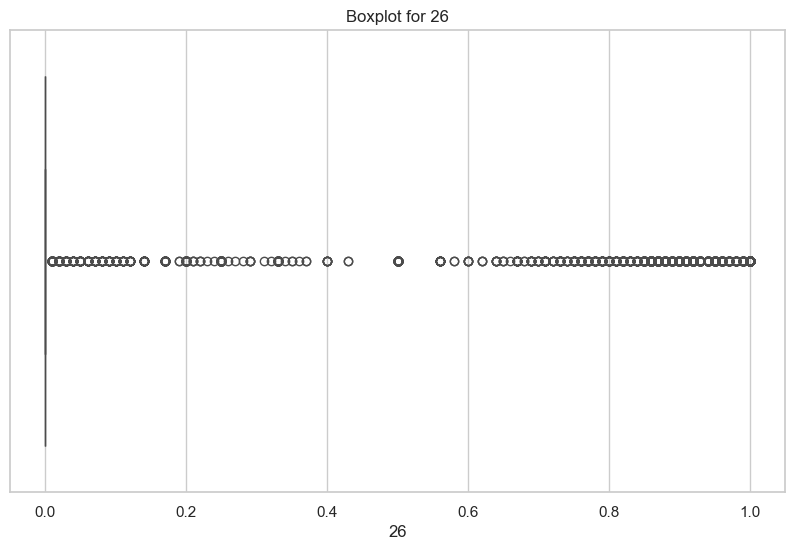

Number of outliers in 26: 28293


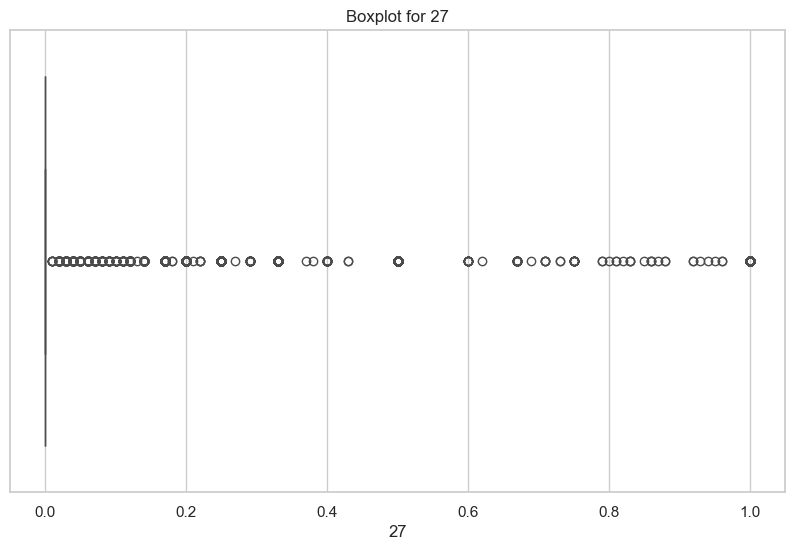

Number of outliers in 27: 28139


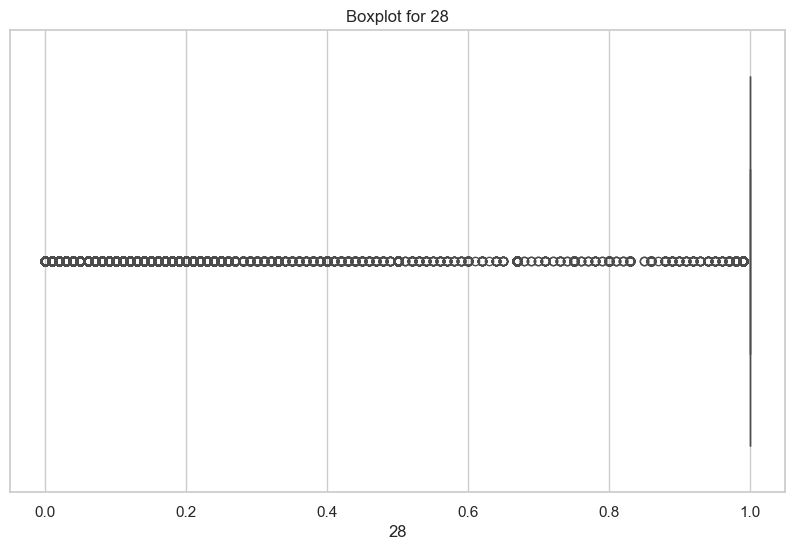

Number of outliers in 28: 0


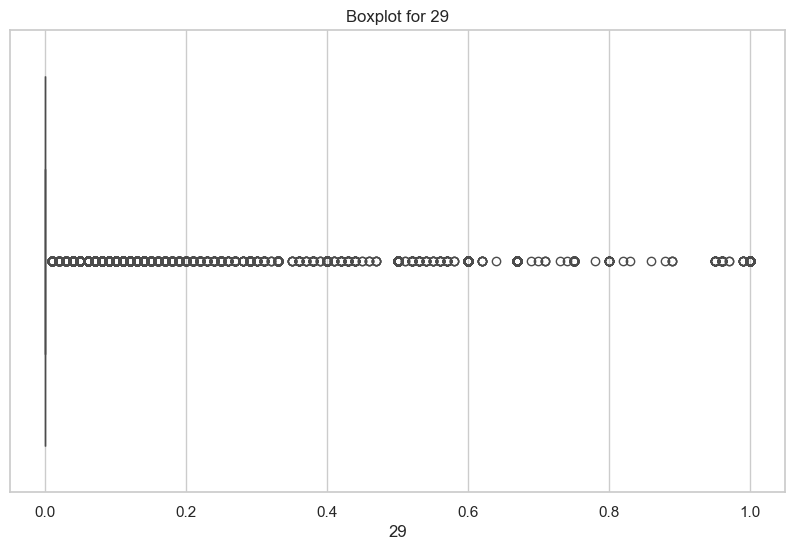

Number of outliers in 29: 4679


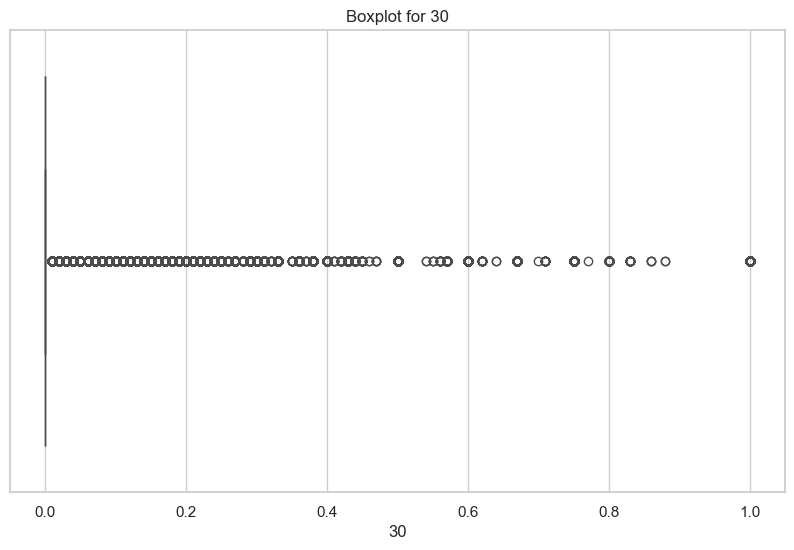

Number of outliers in 30: 11796


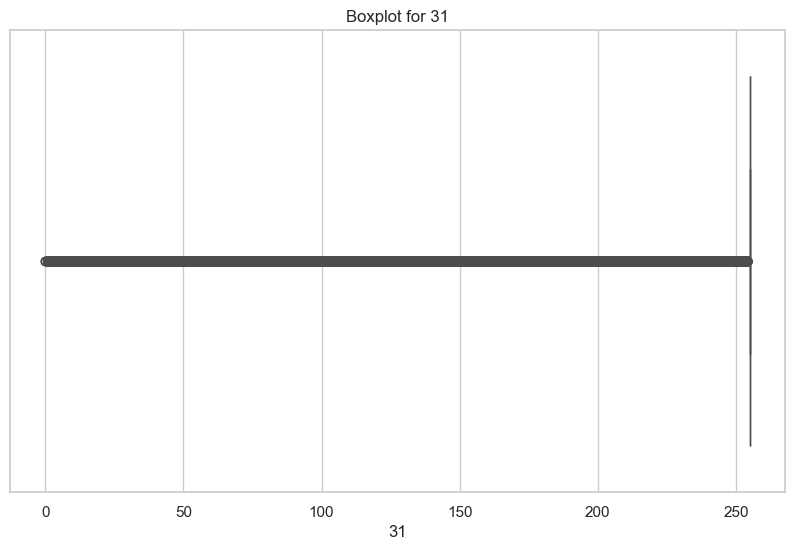

Number of outliers in 31: 26977


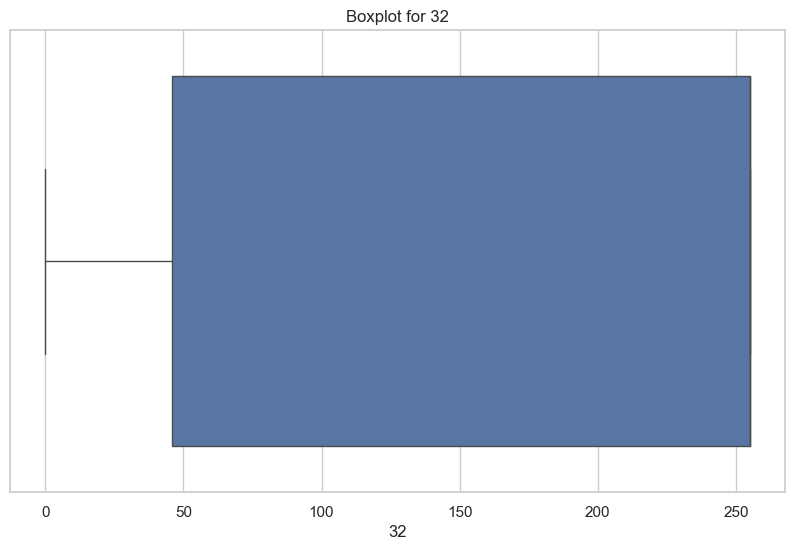

Number of outliers in 32: 0


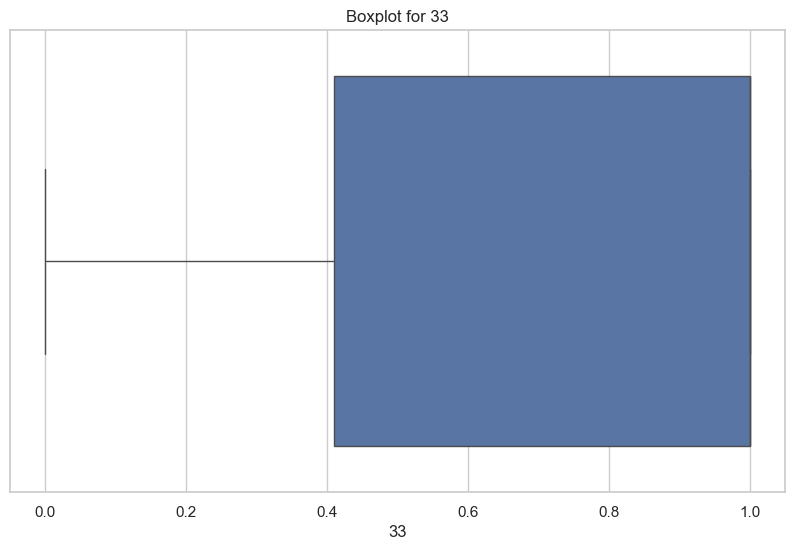

Number of outliers in 33: 0


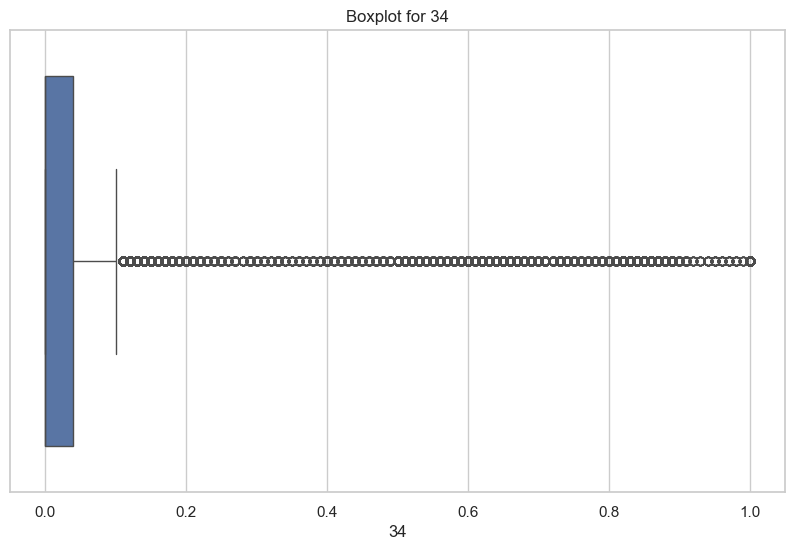

Number of outliers in 34: 8976


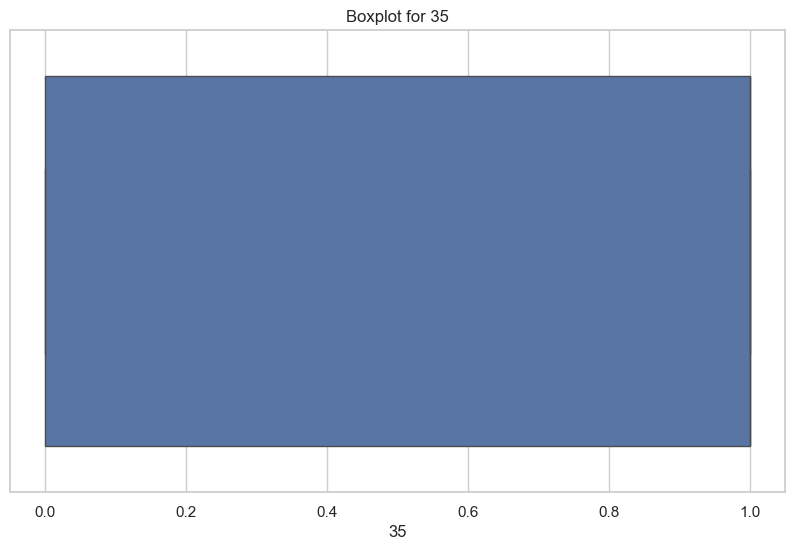

Number of outliers in 35: 0


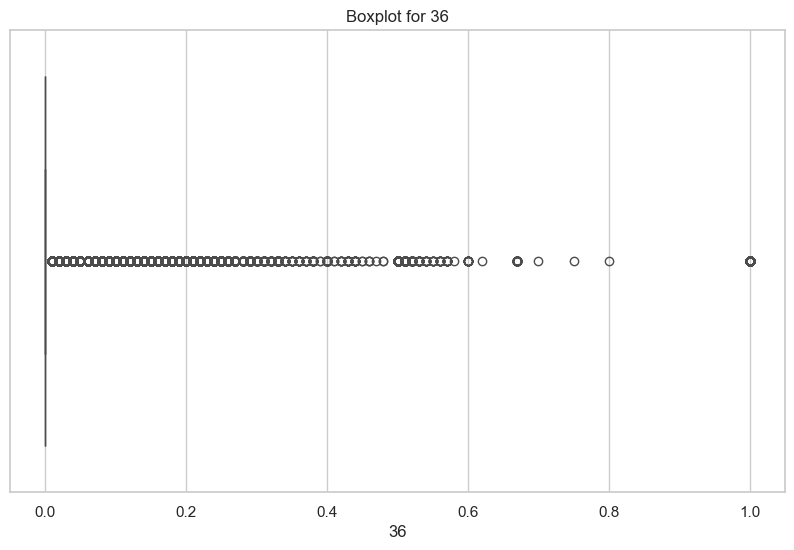

Number of outliers in 36: 5567


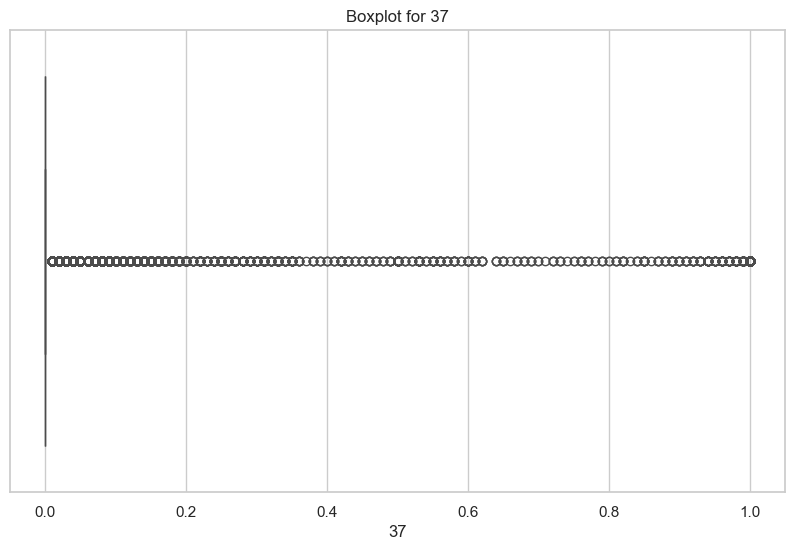

Number of outliers in 37: 0


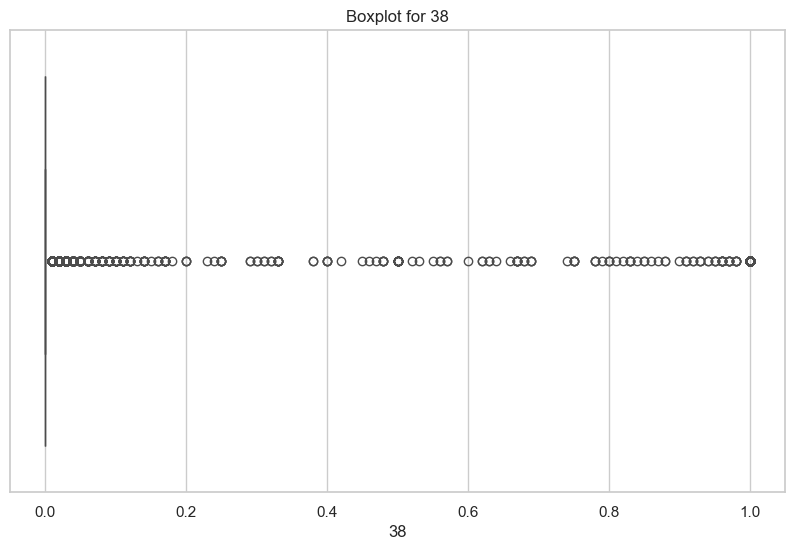

Number of outliers in 38: 0


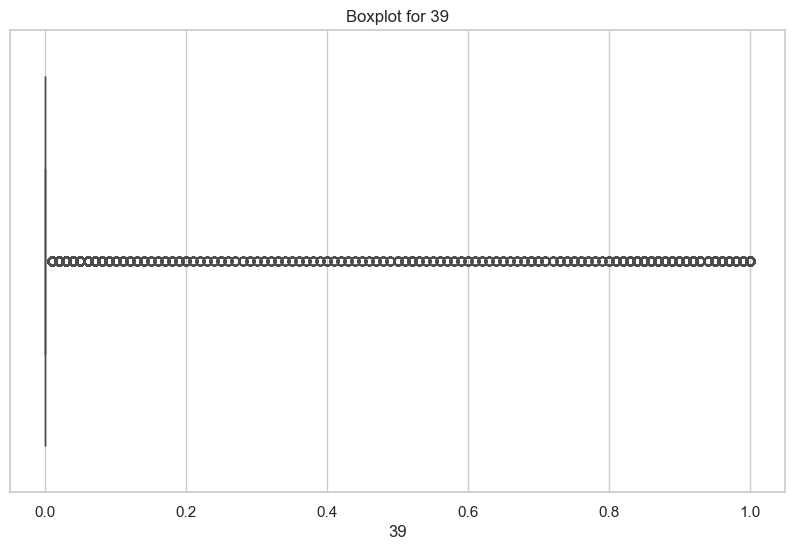

Number of outliers in 39: 27880


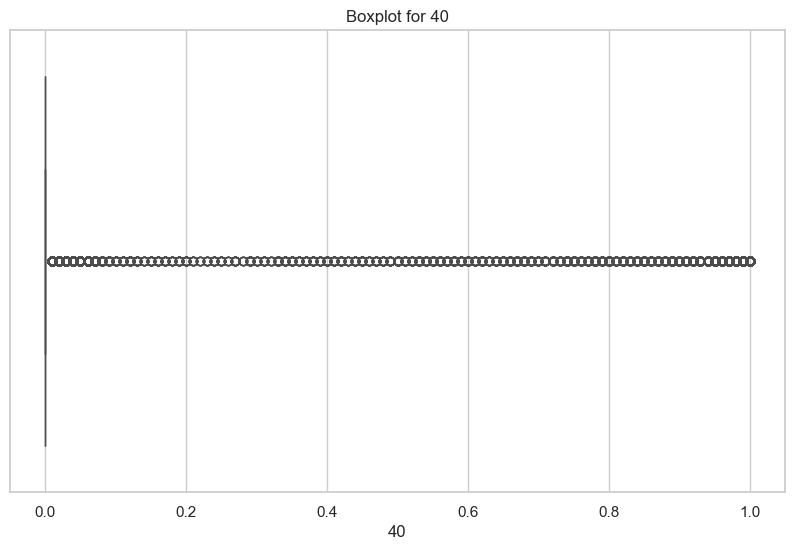

Number of outliers in 40: 27764


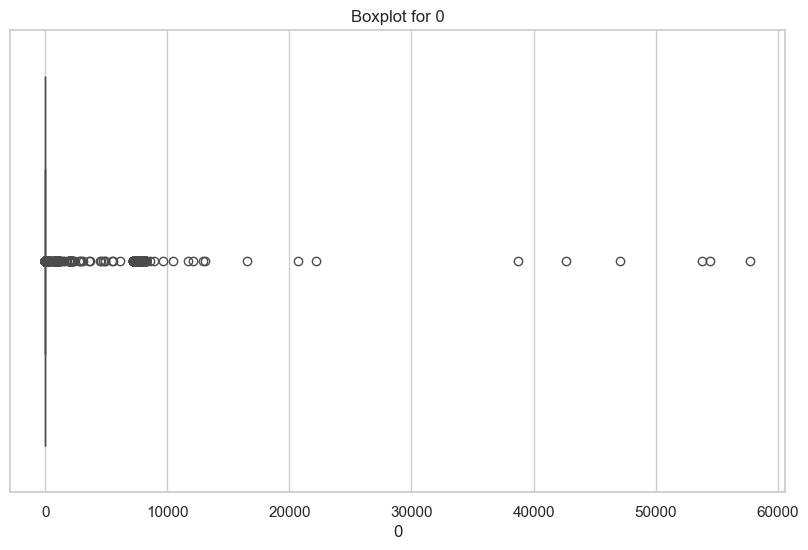

Number of outliers in 0: 494


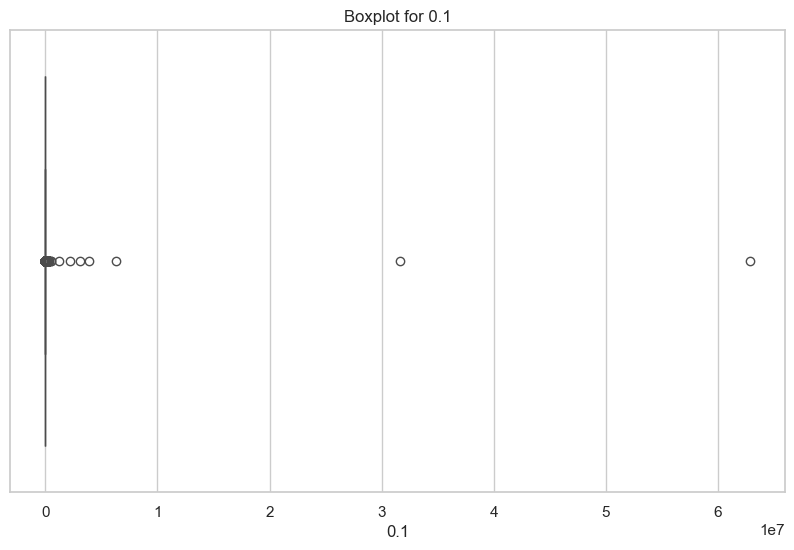

Number of outliers in 0.1: 6


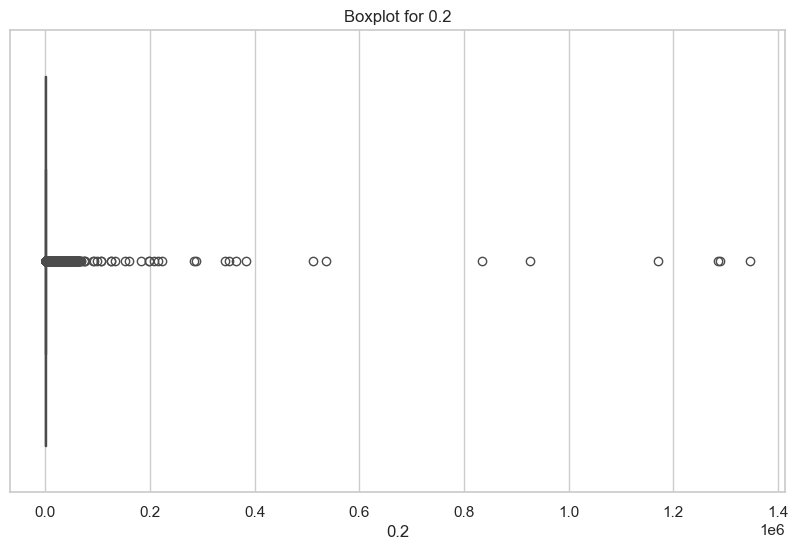

Number of outliers in 0.2: 36


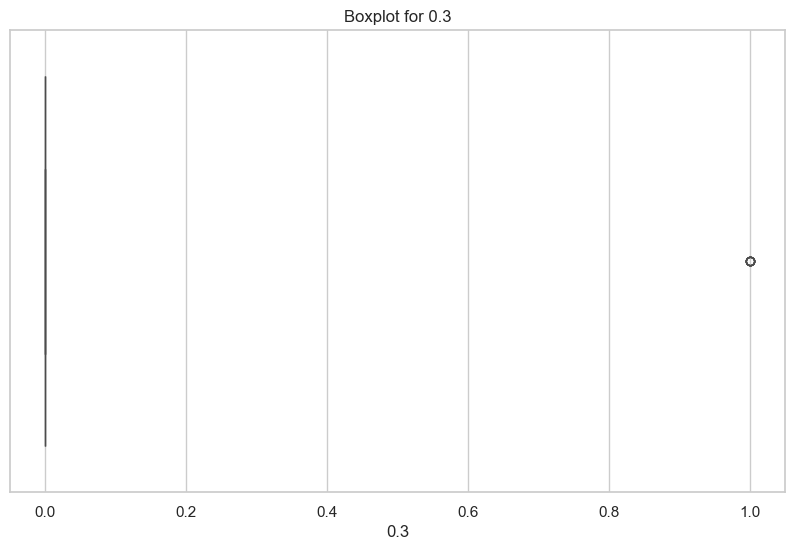

Number of outliers in 0.3: 7


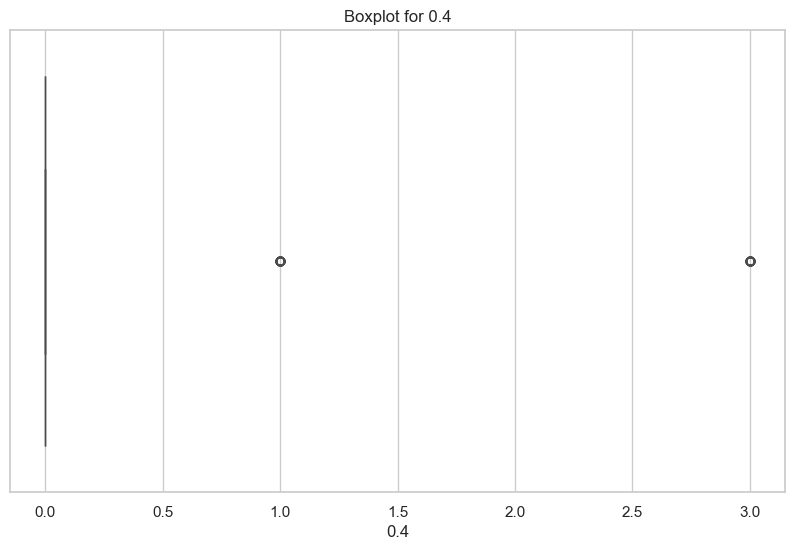

Number of outliers in 0.4: 100


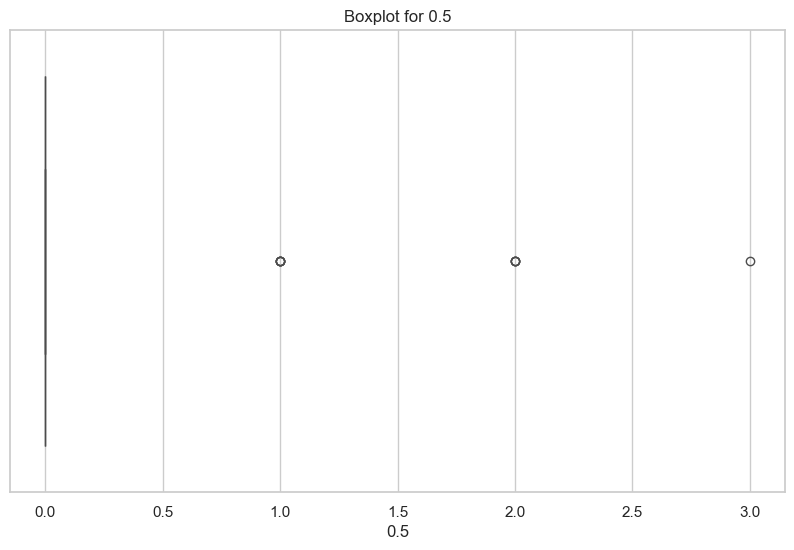

Number of outliers in 0.5: 10


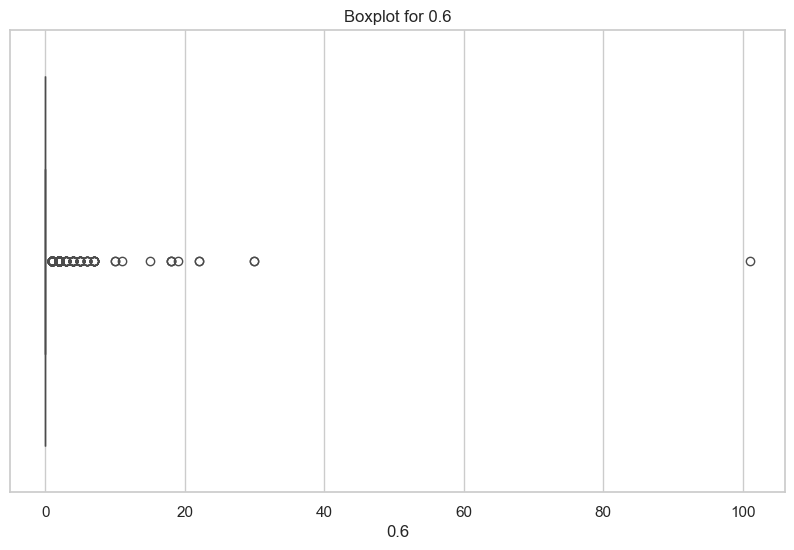

Number of outliers in 0.6: 71


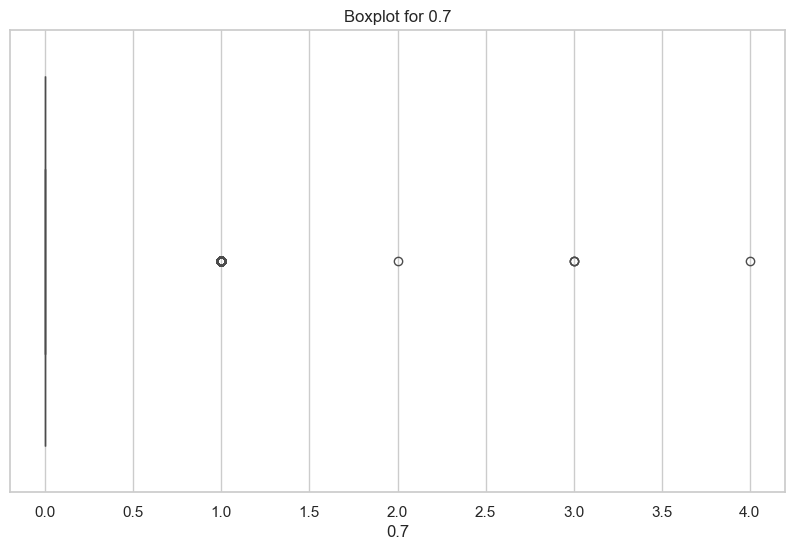

Number of outliers in 0.7: 478


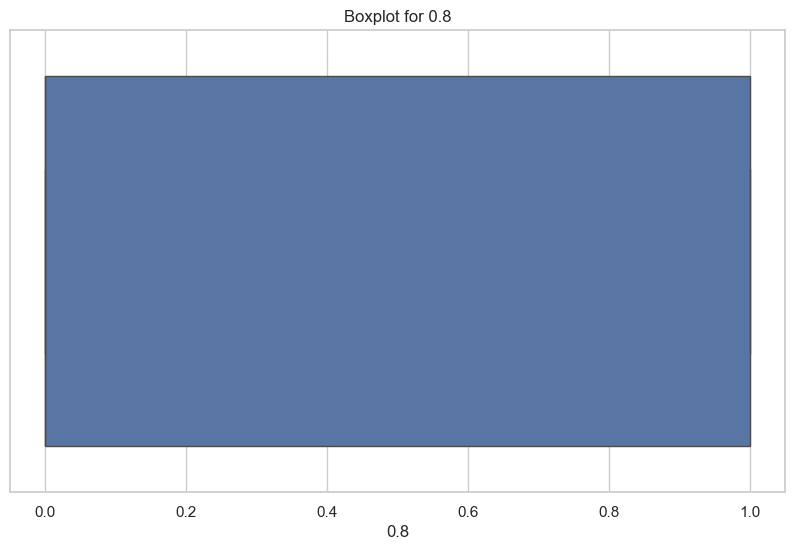

Number of outliers in 0.8: 0


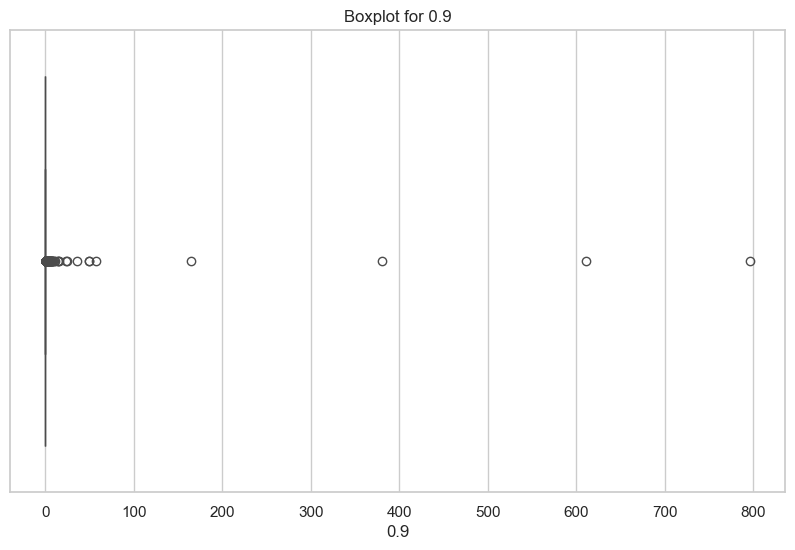

Number of outliers in 0.9: 10


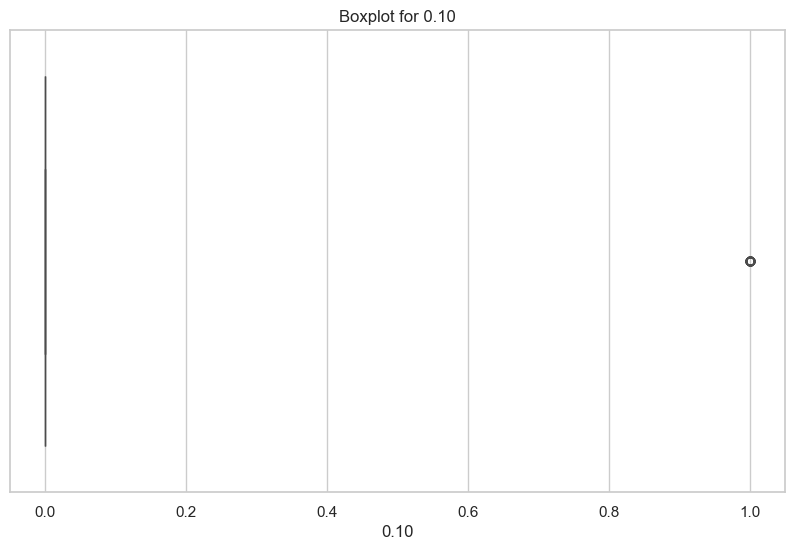

Number of outliers in 0.10: 55


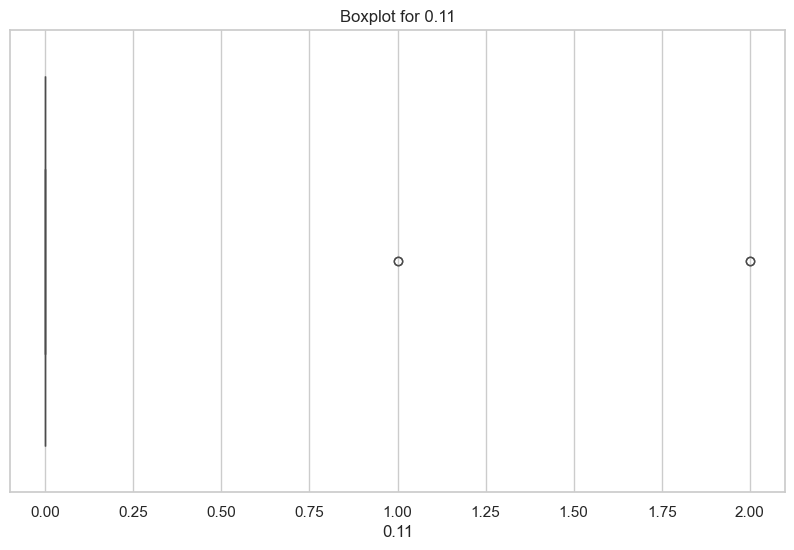

Number of outliers in 0.11: 4


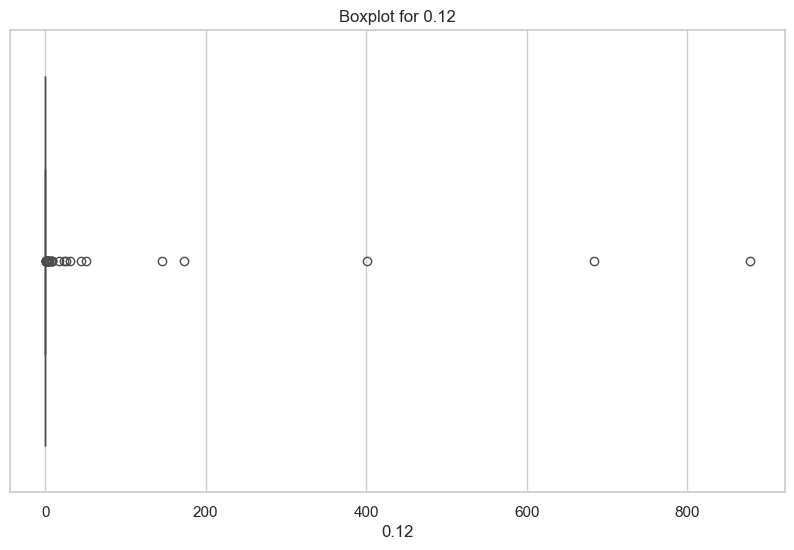

Number of outliers in 0.12: 9


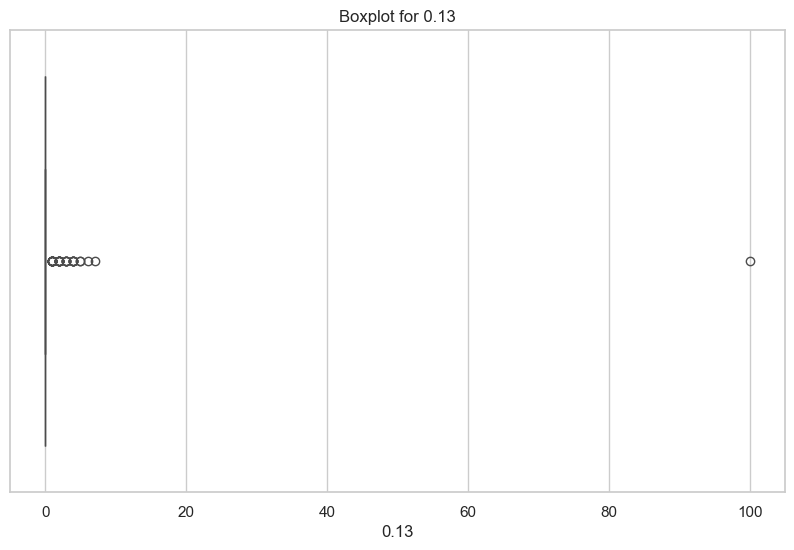

Number of outliers in 0.13: 16


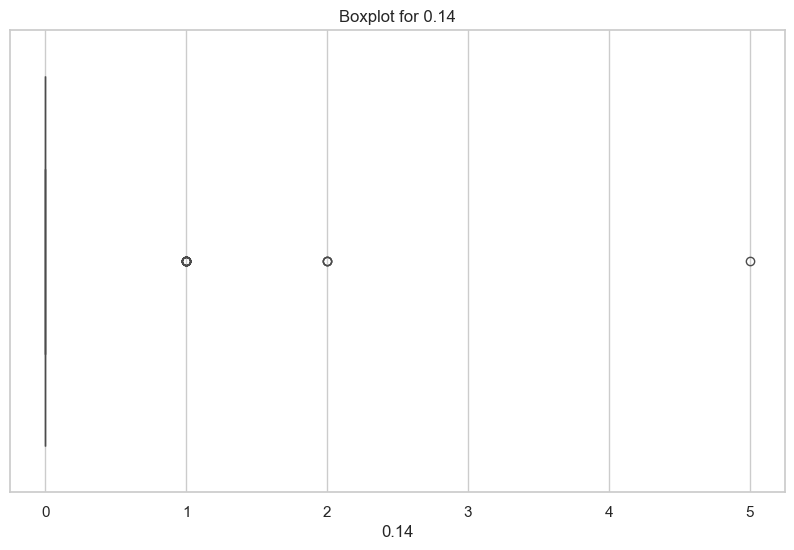

Number of outliers in 0.14: 19


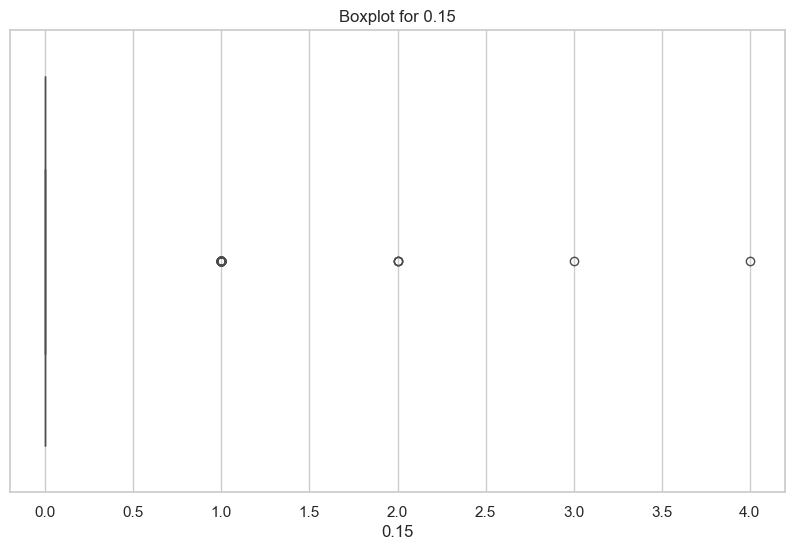

Number of outliers in 0.15: 72


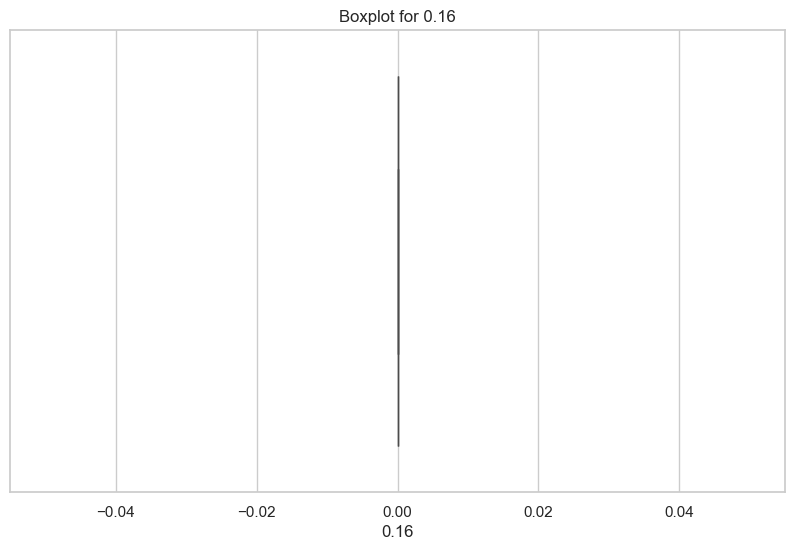

Number of outliers in 0.16: 0


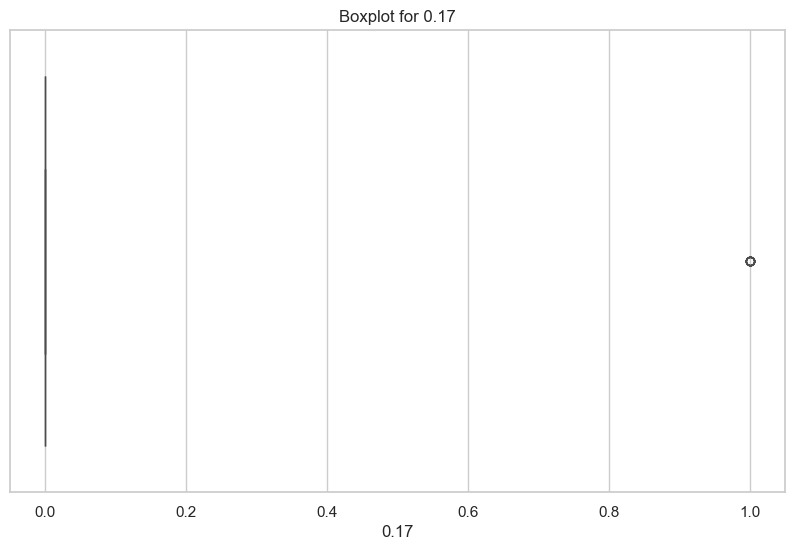

Number of outliers in 0.17: 11


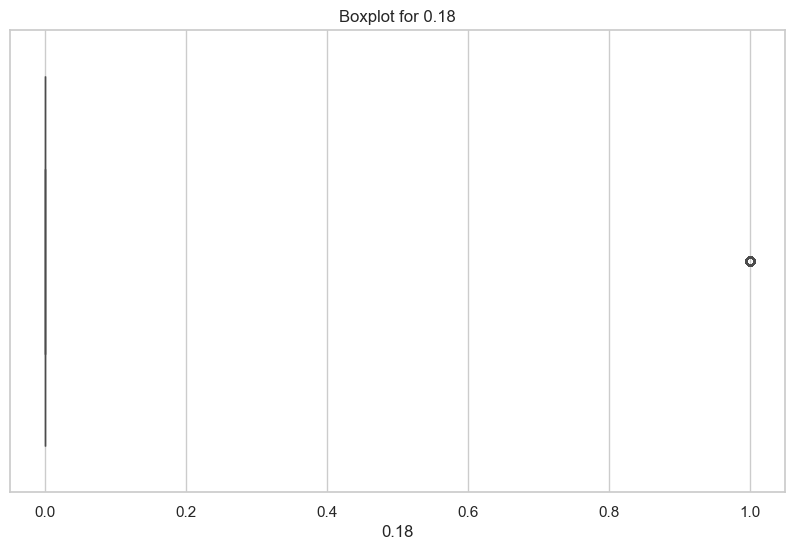

Number of outliers in 0.18: 641


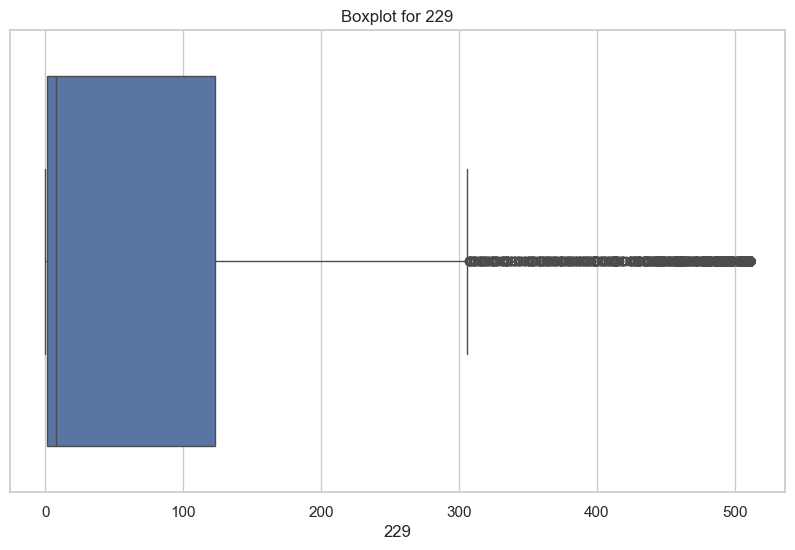

Number of outliers in 229: 876


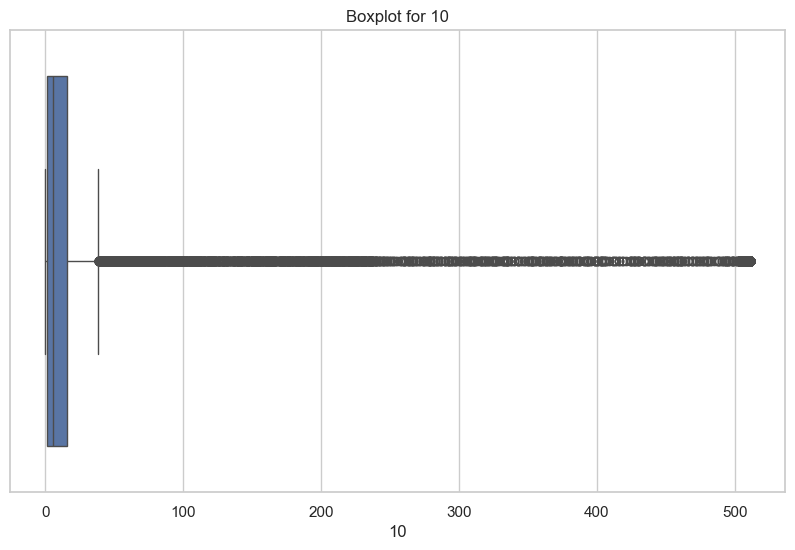

Number of outliers in 10: 738


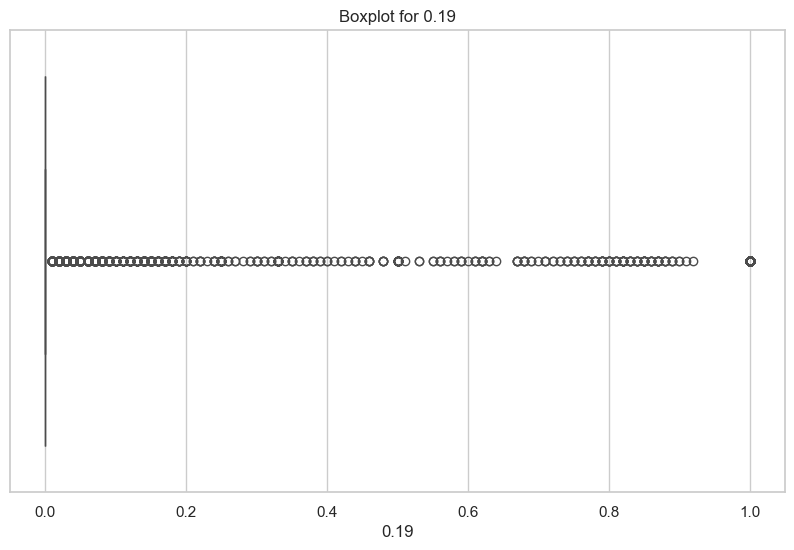

Number of outliers in 0.19: 2104


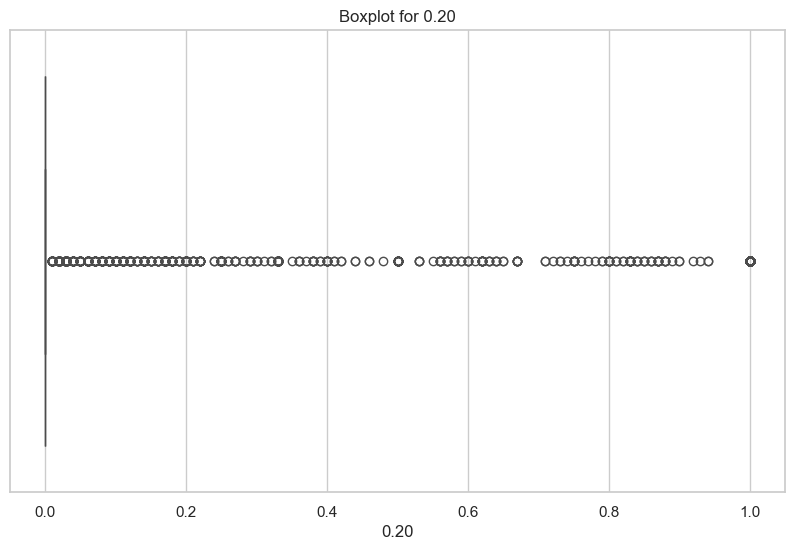

Number of outliers in 0.20: 2165


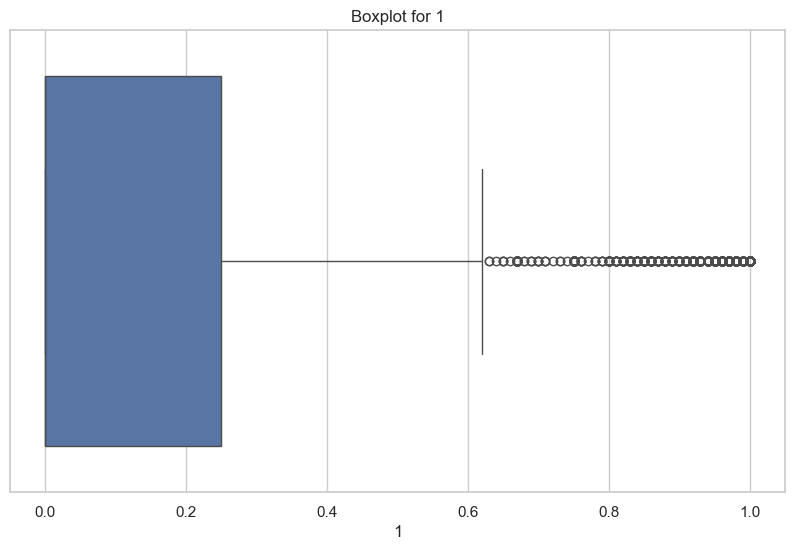

Number of outliers in 1: 0


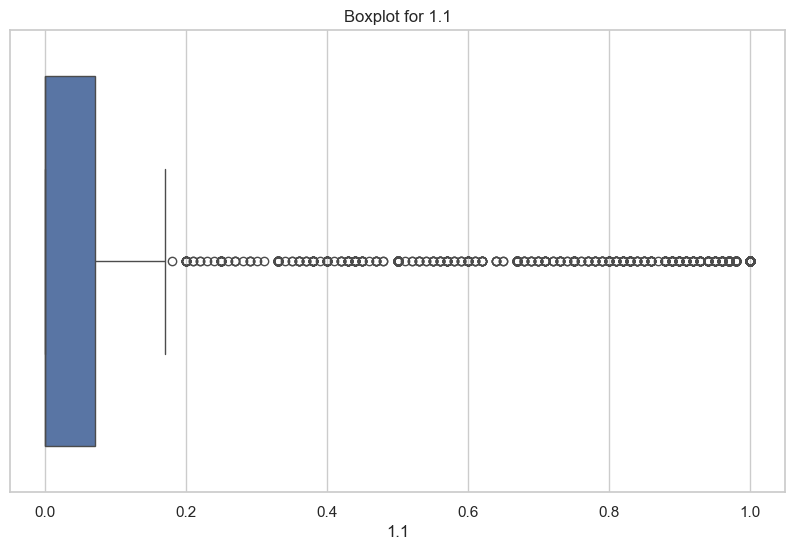

Number of outliers in 1.1: 0


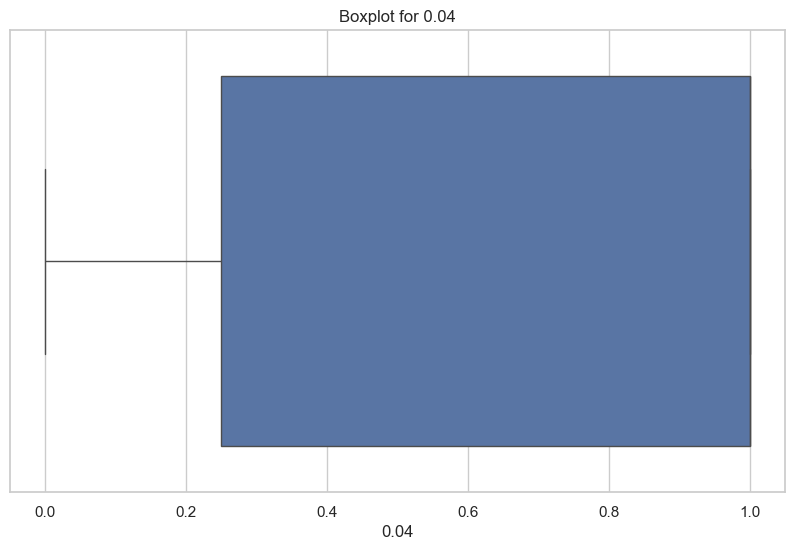

Number of outliers in 0.04: 0


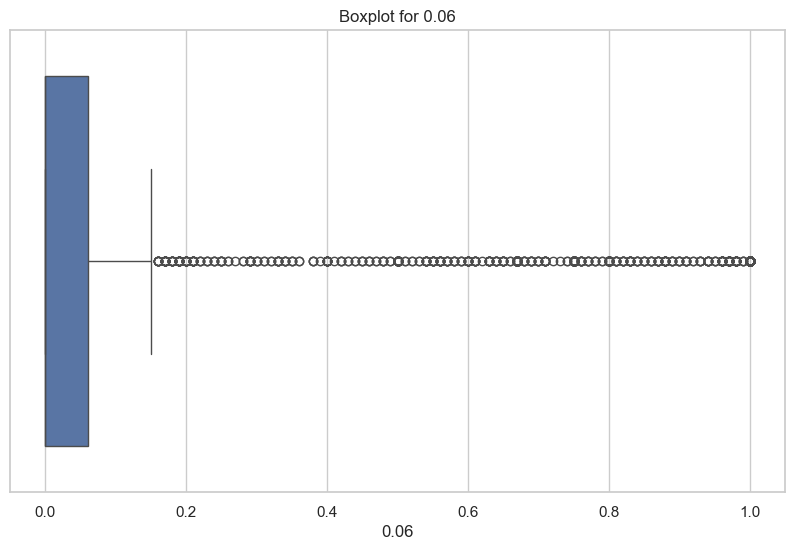

Number of outliers in 0.06: 1481


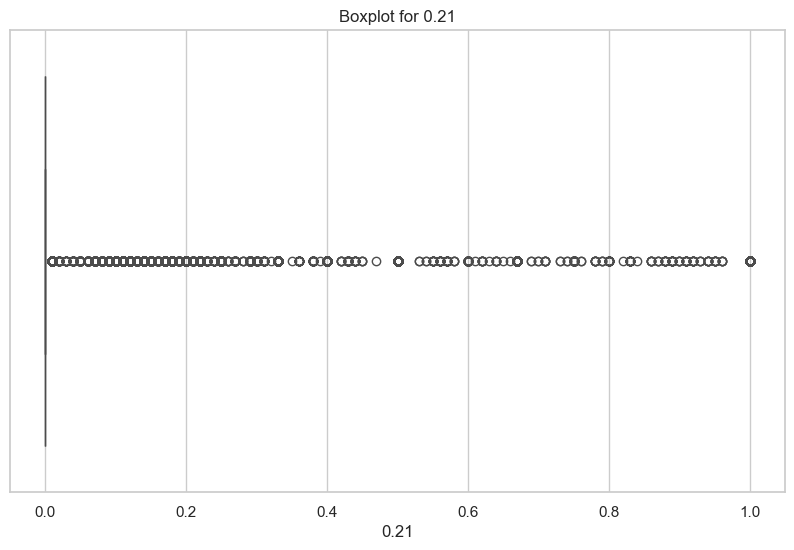

Number of outliers in 0.21: 1292


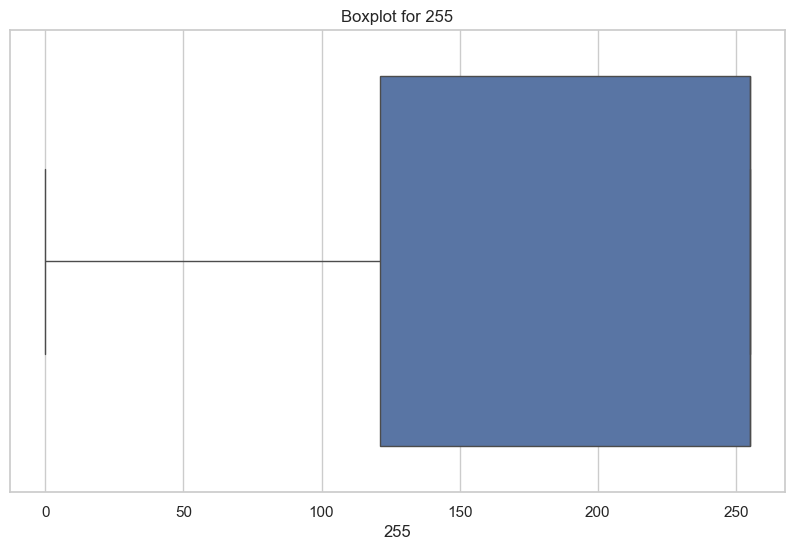

Number of outliers in 255: 0


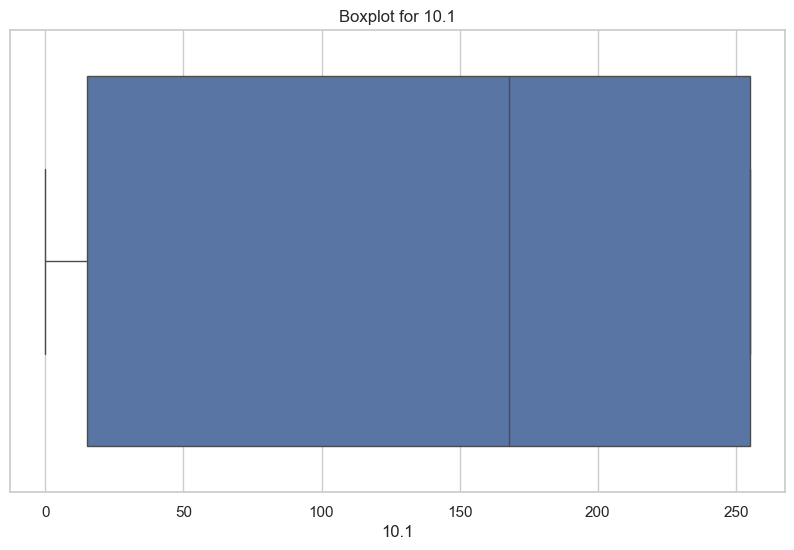

Number of outliers in 10.1: 0


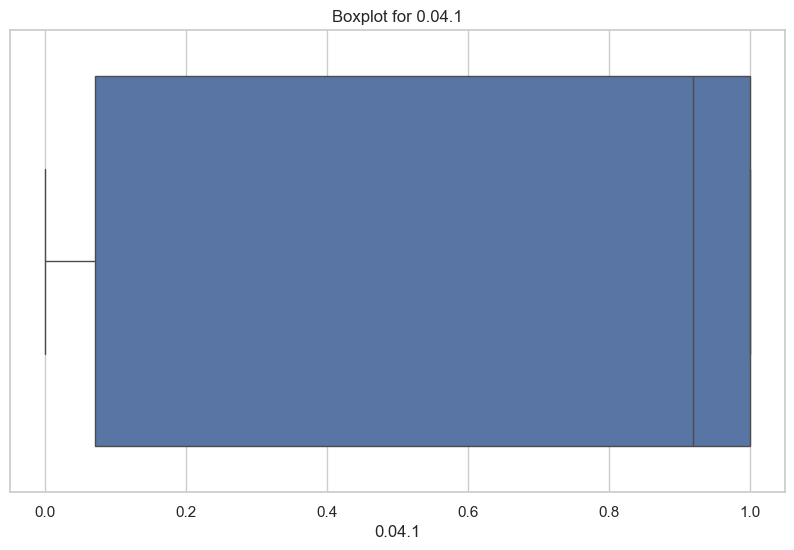

Number of outliers in 0.04.1: 0


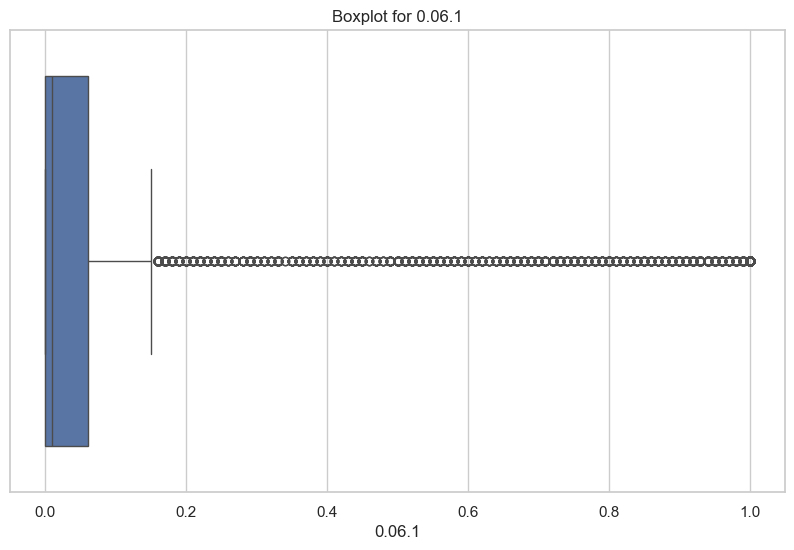

Number of outliers in 0.06.1: 1106


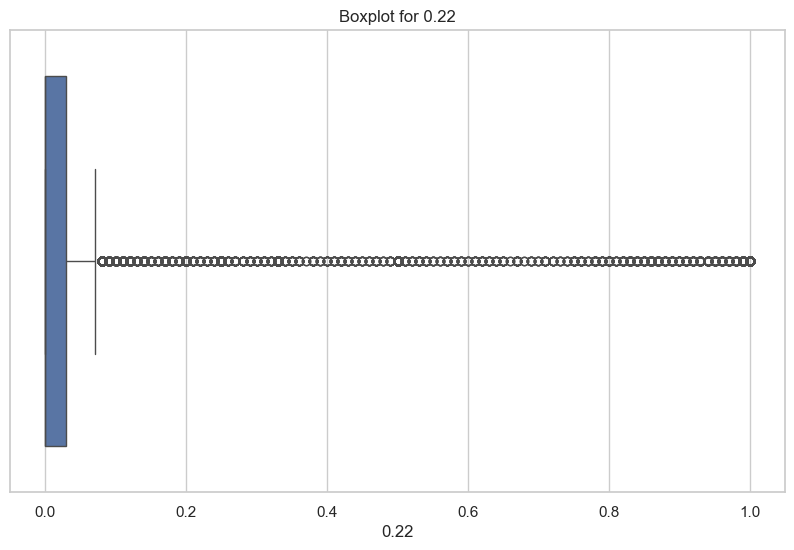

Number of outliers in 0.22: 0


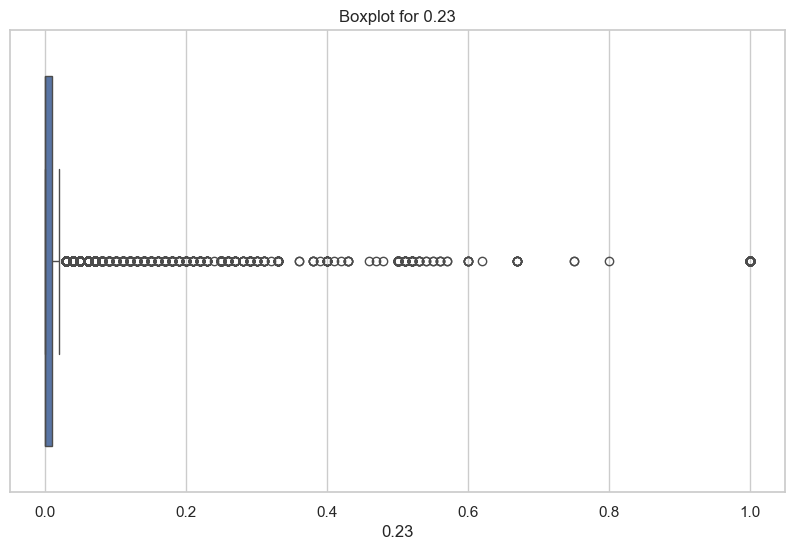

Number of outliers in 0.23: 313


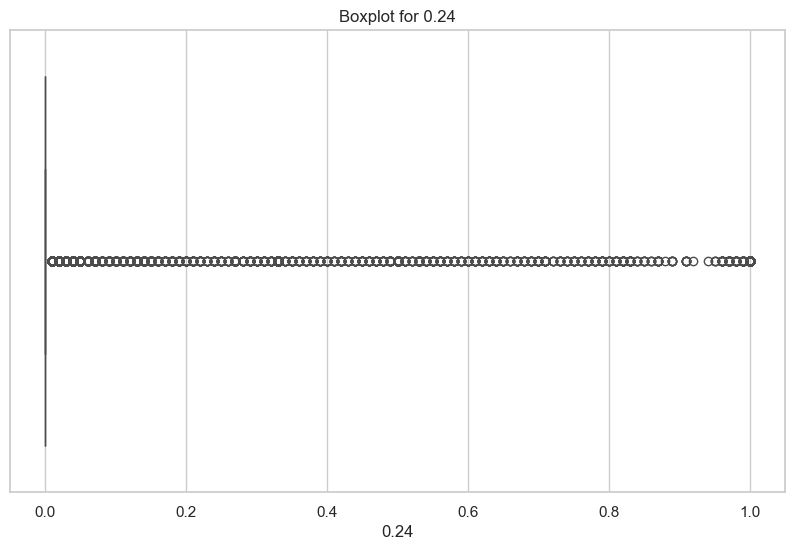

Number of outliers in 0.24: 1630


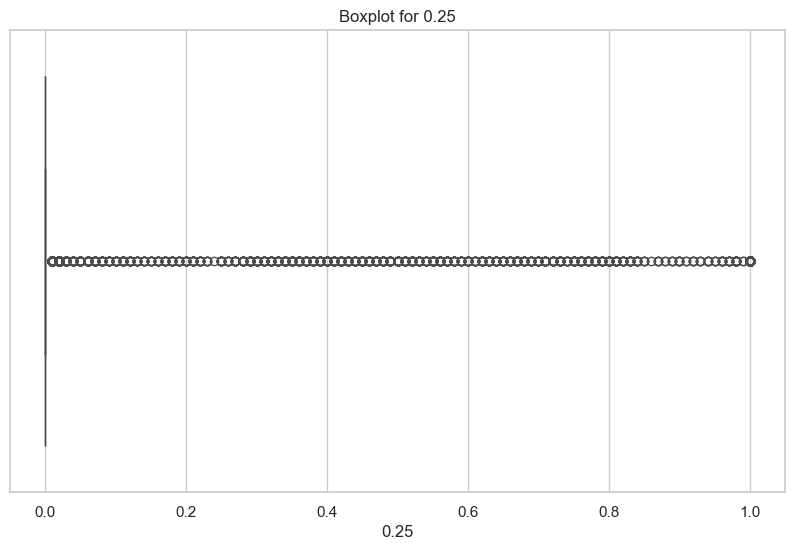

Number of outliers in 0.25: 1728


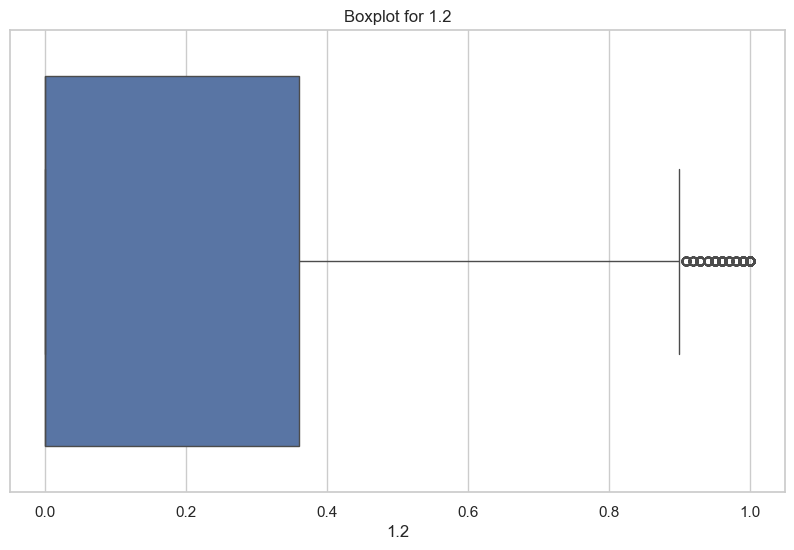

Number of outliers in 1.2: 0


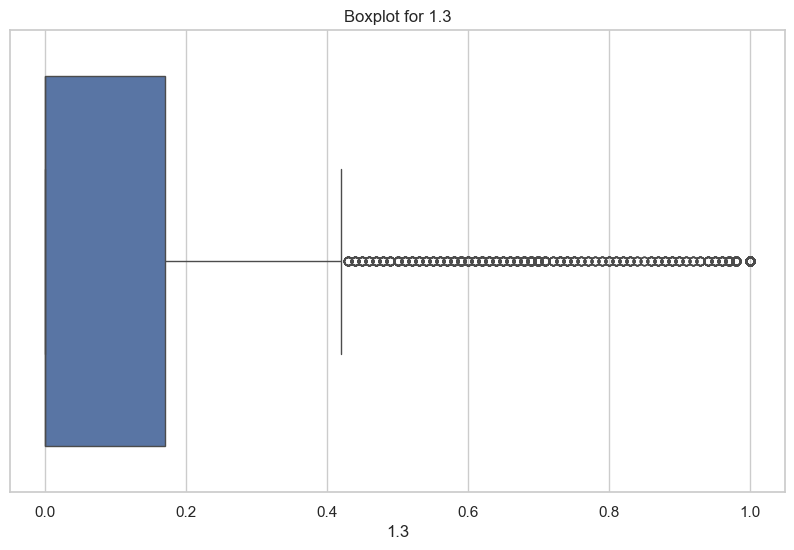

Number of outliers in 1.3: 0


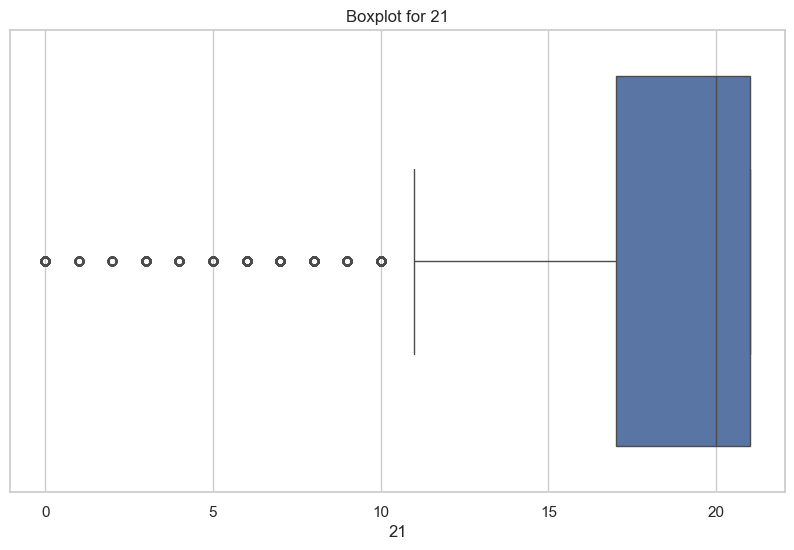

Number of outliers in 21: 585


In [21]:


# Function to detect and visualize outliers
def detect_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
    
    # Z-score method to detect outliers
    from scipy import stats
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers = np.where(z_scores > 3)[0]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers

# Detect outliers in numerical columns
print("\nDetecting Outliers:")

for column in cicids_data.select_dtypes(include=[np.number]).columns:
    detect_outliers(cicids_data, column)

for column in kddcup_data.select_dtypes(include=[np.number]).columns:
    detect_outliers(kddcup_data, column)

for column in nsl_kdd_data.select_dtypes(include=[np.number]).columns:
    detect_outliers(nsl_kdd_data, column)


### **5.4 Summary of Data Cleaning**


# Summary of Data Cleaning

In this comprehensive data cleaning process, we have:

1. **Loaded** and inspected the datasets.
2. **Conducted Detailed Missing Value Analysis** to identify and address missing data.
3. **Performed Advanced Outlier Detection** using various methods to identify anomalies.
4. **Handled Missing Values and Outliers** by appropriate methods including imputation, capping, and removal.
5. **Standardized Column Names** for consistency.
6. **Removed Duplicate Rows** to ensure the uniqueness of the dataset.

The cleaned datasets have been saved to the `E:\\Hackatone Project\\NetTrafficGuard\\data\\processed\\` directory. These datasets are now ready for the next stages of exploratory data analysis (EDA) and model development. Ensuring data quality through these steps enhances the reliability and validity of our analysis and model performance.
